# PROJECT: AIR POLLUTION 

## Compiled by: Mashele G.P

### Description:
You may have seen recent news articles stating that air quality has improved due to COVID-19. This is true for some locations, but as always the truth is a little more complicated. In parts of many African cities, air quality seems to be getting worse as more people stay at home. For this challenge we’ll be digging deeper into the data, finding ways to track air quality and how it is changing, even in places without ground-based sensors. This information will be especially useful in the face of the current crisis, since poor air quality makes a respiratory disease like COVID-19 more dangerous.

We’ve collected weather data and daily observations from the Sentinel 5P satellite tracking various pollutants in the atmosphere. The goal is to use this information to predict PM2.5 particulate matter concentration (a common measure of air quality that normally requires ground-based sensors to measure) every day for each city. The data covers the last three months, spanning hundreds of cities across the globe.

### Objective:
To predict air quality in cities around the world using satellite data.

### Import the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# Library to help with statistical analysis
import scipy.stats as stats 
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor,BaggingRegressor,)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBRegressor
# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Now lets read the train and test  dataset
train_data = pd.read_csv("Air_pollution_training.csv")
test_data = pd.read_csv("Air_pollution_testing.csv")

In [3]:
# Print the first five rows of the  train dataset
train_data.head()  

Place_ID X Date        Date Place_ID  target  target_min  target_max  \
0  010Q650 X 2020-01-02  2020-01-02  010Q650  38.000      23.000      53.000   
1  010Q650 X 2020-01-03  2020-01-03  010Q650  39.000      25.000      63.000   
2  010Q650 X 2020-01-04  2020-01-04  010Q650  24.000       8.000      56.000   
3  010Q650 X 2020-01-05  2020-01-05  010Q650  49.000      10.000      55.000   
4  010Q650 X 2020-01-06  2020-01-06  010Q650  21.000       9.000      52.000   

   target_variance  target_count  precipitable_water_entire_atmosphere  \
0          769.500            92                                11.000   
1         1319.850            91                                14.600   
2         1181.960            96                                16.400   
3         1113.670            96                                 6.912   
4         1164.820            95                                13.900   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                             60.200                              0.008   
1                             48.800                              0.008   
2                             33.400                              0.007   
3                             21.300                              0.004   
4                             44.700                              0.005   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                       18.517                                 1.996   
1                       22.547                                 3.330   
2                       27.031                                 5.066   
3                       23.972                                 3.004   
4                       16.816                                 2.622   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                -1.227                             0.000   
1                                -1.188                             0.000   
2                                 3.501                             0.000   
3                                 1.099                             0.000   
4                                 2.671                             0.000   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
0                                   0.000                          -1.231   
1                                   0.000                          -1.083   
2                                   0.000                          -1.001   
3                                   0.000                          -0.777   
4                                   0.000                           0.366   

   L3_NO2_cloud_fraction  L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0                  0.007              840209.875                       76.538   
1                  0.018              840772.942                      -14.708   
2                  0.016              841410.713                     -105.201   
3                  0.056              841103.242                     -104.334   
4                  0.029              840763.055                       58.850   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                      38.634                     -61.737   
1                      59.625                     -67.694   
2                      49.840                     -78.343   
3                      29.181                     -73.897   
4                       0.797                     -68.612   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.358                                           0.000   
1                     28.615                                           0.000   
2                     34.297                                           0.000   
3                     30.545                                           0.000   
4                 

In [4]:
# Print the last five rows of the dataset
train_data.tail()

Place_ID X Date        Date Place_ID  target  target_min  \
30552  YWSFY6Q X 2020-03-15  2020-03-15  YWSFY6Q  22.000      14.000   
30553  YWSFY6Q X 2020-03-16  2020-03-16  YWSFY6Q  53.000      30.000   
30554  YWSFY6Q X 2020-03-17  2020-03-17  YWSFY6Q  85.000      52.000   
30555  YWSFY6Q X 2020-03-18  2020-03-18  YWSFY6Q 103.000      33.000   
30556  YWSFY6Q X 2020-03-19  2020-03-19  YWSFY6Q  89.000      46.000   

       target_max  target_variance  target_count  \
30552      83.000         3848.860            72   
30553     146.000         9823.870            72   
30554     153.000         8900.850            72   
30555     149.000        13963.900            72   
30556     132.000         9393.640            72   

       precipitable_water_entire_atmosphere  \
30552                                 6.700   
30553                                 6.300   
30554                                 7.100   
30555                                19.100   
30556                                11.600   

       relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
30552                             68.300                              0.004   
30553                             77.700                              0.003   
30554                             68.500                              0.004   
30555                             66.300                              0.005   
30556                             68.400                              0.005   

       temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
30552                        4.257                                -4.811   
30553                        2.067                                -2.346   
30554                        4.439                                 0.096   
30555                       10.573                                 0.435   
30556                        9.002                                -0.710   

       v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
30552                                -4.195                             0.000   
30553                                 0.749                             0.000   
30554                                 0.142                             0.000   
30555                                -1.440                             0.000   
30556                                 0.888                             0.000   

       L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
30552                                   0.000                          -1.413   
30553                                   0.000                          -1.450   
30554                                   0.000                          -1.722   
30555                                   0.000                          -2.065   
30556                                   0.000                          -1.556   

       L3_NO2_cloud_fraction  L3_NO2_sensor_altitude  \
30552                  0.001              833637.576   
30553                  0.005              833603.016   
30554                  0.026              833286.230   
30555                  0.144              833480.934   
30556                  0.031              833419.300   

       L3_NO2_sensor_azimuth_angle  L3_NO2_sensor_zenith_angle  \
30552                      -16.857                      54.303   
30553                      -52.308                      43.180   
30554                     -103.670                       8.955   
30555                       71.097                      17.972   
30556                          NaN                         NaN   

       L3_NO2_solar_azimuth_angle  L3_NO2_solar_zenith_angle  \
30552                      12.312                     49.872   
30553                     -59.101                     49.361   
30554                    -162.856                     48.459   
30555                    -168.906                     47.293   
30556                  

In [5]:
train_data.shape

(30557, 82)

In [6]:
print(f" The air pollution training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The air pollution training dataset consist of 30557 rows and 82 columns


In [7]:
test_data.head()

Place_ID X Date        Date Place_ID  \
0  0OS9LVX X 2020-01-02  2020-01-02  0OS9LVX   
1  0OS9LVX X 2020-01-03  2020-01-03  0OS9LVX   
2  0OS9LVX X 2020-01-04  2020-01-04  0OS9LVX   
3  0OS9LVX X 2020-01-05  2020-01-05  0OS9LVX   
4  0OS9LVX X 2020-01-06  2020-01-06  0OS9LVX   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                11.600                             30.200   
1                                18.300                             42.900   
2                                17.600                             41.300   
3                                15.012                             53.100   
4                                 9.700                             71.600   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.004                       14.657   
1                              0.006                       15.027   
2                              0.006                       15.511   
3                              0.007                       14.442   
4                              0.008                       11.896   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 3.956                                 0.713   
1                                 4.230                                 0.662   
2                                 5.246                                 1.641   
3                                 5.454                                -0.191   
4                                 3.512                                -0.279   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                             0.000                                   0.000   
1                             0.000                                   0.000   
2                             0.000                                   0.000   
3                             0.000                                   0.000   
4                             0.000                                   0.000   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                           0.466                  0.011   
1                          -0.214                  0.028   
2                          -0.254                  0.010   
3                          -0.268                  0.089   
4                           0.461                  0.041   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0              835670.493                       68.099   
1              835281.883                       75.937   
2              834839.051                       75.552   
3              836269.834                     -102.285   
4              836043.111                     -102.134   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                       1.446                     -95.985   
1                      34.639                     -95.018   
2                      55.872                     -94.015   
3                      59.175                     -97.248   
4                      40.926                     -96.057   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.942                                           0.000   
1                     18.540                                           0.000   
2                     14.141                                           0.000   
3                     32.731                                           0.000   
4                     28.321                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    7311.869                                          0.000   
2                    6156.074                                          0.00

In [8]:
test_data.shape

(16136, 77)

In [9]:
test_data.head()

Place_ID X Date        Date Place_ID  \
0  0OS9LVX X 2020-01-02  2020-01-02  0OS9LVX   
1  0OS9LVX X 2020-01-03  2020-01-03  0OS9LVX   
2  0OS9LVX X 2020-01-04  2020-01-04  0OS9LVX   
3  0OS9LVX X 2020-01-05  2020-01-05  0OS9LVX   
4  0OS9LVX X 2020-01-06  2020-01-06  0OS9LVX   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                11.600                             30.200   
1                                18.300                             42.900   
2                                17.600                             41.300   
3                                15.012                             53.100   
4                                 9.700                             71.600   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.004                       14.657   
1                              0.006                       15.027   
2                              0.006                       15.511   
3                              0.007                       14.442   
4                              0.008                       11.896   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 3.956                                 0.713   
1                                 4.230                                 0.662   
2                                 5.246                                 1.641   
3                                 5.454                                -0.191   
4                                 3.512                                -0.279   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                             0.000                                   0.000   
1                             0.000                                   0.000   
2                             0.000                                   0.000   
3                             0.000                                   0.000   
4                             0.000                                   0.000   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                           0.466                  0.011   
1                          -0.214                  0.028   
2                          -0.254                  0.010   
3                          -0.268                  0.089   
4                           0.461                  0.041   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0              835670.493                       68.099   
1              835281.883                       75.937   
2              834839.051                       75.552   
3              836269.834                     -102.285   
4              836043.111                     -102.134   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                       1.446                     -95.985   
1                      34.639                     -95.018   
2                      55.872                     -94.015   
3                      59.175                     -97.248   
4                      40.926                     -96.057   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.942                                           0.000   
1                     18.540                                           0.000   
2                     14.141                                           0.000   
3                     32.731                                           0.000   
4                     28.321                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    7311.869                                          0.000   
2                    6156.074                                          0.00

In [10]:
print(f" The air pollution  testing dataset consist of {test_data.shape[0]} rows and {test_data.shape[1]} columns")

 The air pollution  testing dataset consist of 16136 rows and 77 columns


In [11]:
# Code to display the dataset data types
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30557 entries, 0 to 30556
Data columns (total 82 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Place_ID X Date                                      30557 non-null  object 
 1   Date                                                 30557 non-null  object 
 2   Place_ID                                             30557 non-null  object 
 3   target                                               30557 non-null  float64
 4   target_min                                           30557 non-null  float64
 5   target_max                                           30557 non-null  float64
 6   target_variance                                      30557 non-null  float64
 7   target_count                                         30557 non-null  int64  
 8   precipitable_water_entire_atmosphere                 30557 non-nul

### Observation:
* The financial sector training dataset consist of 23524 rows and 13 columns. <br>
* 3 of those columns are integer data types. <br>
* 10(ten) are object data types. <br>
*  memory usage is 2.3 MB(Megabytes).

In [12]:
### Convert  date  object format to datetime format
train_data["Date"] = pd.to_datetime(train_data["Date"])
test_data["Date"] = pd.to_datetime(test_data["Date"])

In [13]:
### Make a copy from the original training dataset
data = train_data.copy()

In [14]:
## Drop the unneccessary columns
data= data.drop(columns=["Place_ID X Date","Place_ID"],axis=1)

In [15]:
# Now lets recheck the dimensions of the train dataset
data.head()

Date  target  target_min  target_max  target_variance  target_count  \
0 2020-01-02  38.000      23.000      53.000          769.500            92   
1 2020-01-03  39.000      25.000      63.000         1319.850            91   
2 2020-01-04  24.000       8.000      56.000         1181.960            96   
3 2020-01-05  49.000      10.000      55.000         1113.670            96   
4 2020-01-06  21.000       9.000      52.000         1164.820            95   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                11.000                             60.200   
1                                14.600                             48.800   
2                                16.400                             33.400   
3                                 6.912                             21.300   
4                                13.900                             44.700   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.008                       18.517   
1                              0.008                       22.547   
2                              0.007                       27.031   
3                              0.004                       23.972   
4                              0.005                       16.816   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 1.996                                -1.227   
1                                 3.330                                -1.188   
2                                 5.066                                 3.501   
3                                 3.004                                 1.099   
4                                 2.622                                 2.671   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                             0.000                                   0.000   
1                             0.000                                   0.000   
2                             0.000                                   0.000   
3                             0.000                                   0.000   
4                             0.000                                   0.000   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                          -1.231                  0.007   
1                          -1.083                  0.018   
2                          -1.001                  0.016   
3                          -0.777                  0.056   
4                           0.366                  0.029   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0              840209.875                       76.538   
1              840772.942                      -14.708   
2              841410.713                     -105.201   
3              841103.242                     -104.334   
4              840763.055                       58.850   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                      38.634                     -61.737   
1                      59.625                     -67.694   
2                      49.840                     -78.343   
3                      29.181                     -73.897   
4                       0.797                     -68.612   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.358                                           0.000   
1                     28.615                                           0.000   
2                     34.297                                           0.000   
3                     30.545                                           0.000   
4                     26.900                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                    

In [16]:
### Compute the correlation between the target and target min
data["target"].corr(data["target_min"])

0.8188029851996066

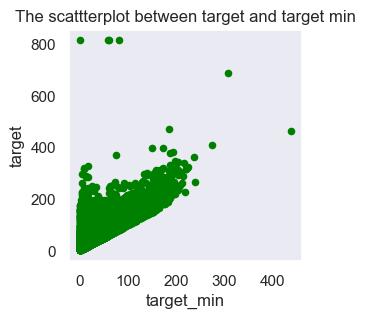

In [17]:
data.plot(kind="scatter",x="target_min",y="target",color="green",grid=False,title="The scattterplot between target and target min",figsize=(3,3));

### Observation
There is a strong positive correlation between the target and target minimun

In [18]:
### Compute the correlation between the target and target max
data["target"].corr(data["target_max"])

0.6308010534607585

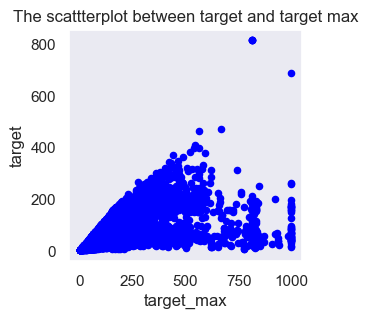

In [19]:
data.plot(kind="scatter",x="target_max",y="target",grid=False,color="blue",title="The scattterplot between target and target max" ,figsize=(3,3));

In [20]:
### Compute the correlation between the target and target variance
data["target"].corr(data["target_variance"])

0.184818408645503

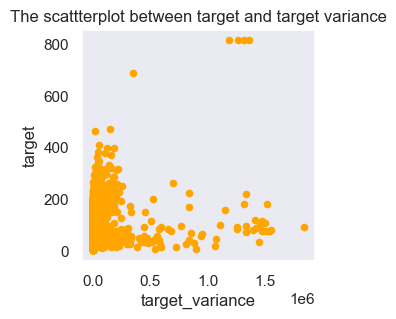

In [21]:
data.plot(kind="scatter",x="target_variance",y="target",grid=False,color="orange",figsize=(3,3),title="The scattterplot between target and target variance");

### Observation
The scatterplot exhibit a very weak positive correlation between the target and target variance.

In [22]:
### Compute the correlation between the target and target count
data["target"].corr(data["target_count"])

0.09413539952669661

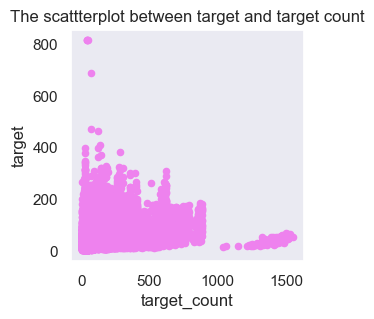

In [23]:
data.plot(kind="scatter",x="target_count",y="target",grid=False,color="violet",figsize=(3,3),title="The scattterplot between target and target count");

In [24]:
data= data.drop(columns=["target_min","target_max","target_variance","target_count"],axis=1)

In [25]:
 # Code to print the statistical summary of the numerical columns in a  dataset
data.describe().T  

count  \
Date                                                   30557   
target                                             30557.000   
precipitable_water_entire_atmosphere               30557.000   
relative_humidity_2m_above_ground                  30557.000   
specific_humidity_2m_above_ground                  30557.000   
temperature_2m_above_ground                        30557.000   
u_component_of_wind_10m_above_ground               30557.000   
v_component_of_wind_10m_above_ground               30557.000   
L3_NO2_NO2_column_number_density                   28368.000   
L3_NO2_NO2_slant_column_number_density             28368.000   
L3_NO2_absorbing_aerosol_index                     28368.000   
L3_NO2_cloud_fraction                              28368.000   
L3_NO2_sensor_altitude                             28368.000   
L3_NO2_sensor_azimuth_angle                        28367.000   
L3_NO2_sensor_zenith_angle                         28367.000   
L3_NO2_solar_azimuth_angle                         28367.000   
L3_NO2_solar_zenith_angle                          28367.000   
L3_NO2_stratospheric_NO2_column_number_density     28367.000   
L3_NO2_tropopause_pressure                         28367.000   
L3_NO2_tropospheric_NO2_column_number_density      21888.000   
L3_O3_O3_column_number_density                     30274.000   
L3_O3_O3_effective_temperature                     30274.000   
L3_O3_cloud_fraction                               30274.000   
L3_O3_sensor_azimuth_angle                         30274.000   
L3_O3_sensor_zenith_angle                          30274.000   
L3_O3_solar_azimuth_angle                          30274.000   
L3_O3_solar_zenith_angle                           30274.000   
L3_CO_CO_column_number_density                     25134.000   
L3_CO_H2O_column_number_density                    25134.000   
L3_CO_cloud_height                                 25134.000   
L3_CO_sensor_altitude                              25134.000   
L3_CO_sensor_azimuth_angle                         25134.000   
L3_CO_sensor_zenith_angle                          25134.000   
L3_CO_solar_azimuth_angle                          25134.000   
L3_CO_solar_zenith_angle                           25134.000   
L3_HCHO_HCHO_slant_column_number_density           23132.000   
L3_HCHO_cloud_fraction                             23132.000   
L3_HCHO_sensor_azimuth_angle                       23132.000   
L3_HCHO_sensor_zenith_angle                        23132.000   
L3_HCHO_solar_azimuth_angle                        23132.000   
L3_HCHO_solar_zenith_angle                         23132.000   
L3_HCHO_tropospheric_HCHO_column_number_density    23132.000   
L3_HCHO_tropospheric_HCHO_column_number_density... 23132.000   
L3_CLOUD_cloud_base_height                         29035.000   
L3_CLOUD_cloud_base_pressure                       29035.000   
L3_CLOUD_cloud_fraction                            30183.000   
L3_CLOUD_cloud_optical_depth                       29035.000   
L3_CLOUD_cloud_top_height                          29035.000   
L3_CLOUD_cloud_top_pressure                        29035.000   
L3_CLOUD_sensor_azimuth_angle                      30183.000   
L3_CLOUD_sensor_zenith_angle                       30183.000   
L3_CLOUD_solar_azimuth_angle                       30183.000   
L3_CLOUD_solar_zenith_angle                        30183.000   
L3_CLOUD_surface_albedo                            29035.000   
L3_AER_AI_absorbing_aerosol_index                  30360.000   
L3_AER_AI_sensor_altitude                          30360.000   
L3_AER_AI_sensor_azimuth_angle                     30360.000   
L3_AER_AI_sensor_zenith_angle                      30360.000   
L3_AER_AI_solar_azimuth_angle                      30360.000   
L3_AER_AI_solar_zenith_angle                       30360.000   
L3_SO2_SO2_column_number_density                   23320.000   
L3_SO2_SO2_column_number_density_amf               23320.000   
L3_SO2_SO2_slant_column

### Observation:
* The age and size  dataset are skewed to the right with mean greater than the median.
* 75% of the household size is  5 and above.
* 25% of the household are aged from 26 years and above.
* The banking dataset has interviewee with age that range from a minimum of 16 to a maximum of 100 years.

In [26]:
# code to check for missing values in a dataset
data.isnull().sum().sum()

388262

In [27]:
test_data.isnull().sum().sum()

215137

In [28]:
test_data.shape

(16136, 77)

In [29]:
# Code to check for duplicates in the testing dataset
test_data.duplicated().sum()

0

###  Observation:
* There are no duplicates in a dataset

# Exploratory data analysis(EDA)

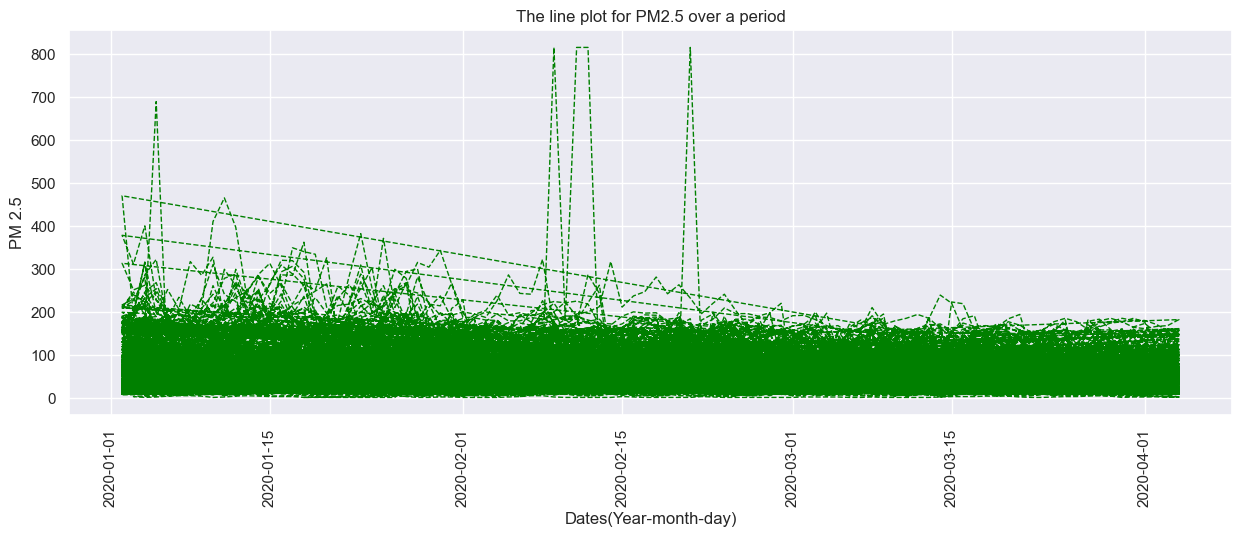

In [30]:
## Plot the target time series data a period
plt.figure(figsize=(15,5)) 
plt.plot(data["Date"],data["target"],color="green",linestyle="dashed",linewidth=1)
plt.title("The line plot for PM2.5 over a period")
plt.xlabel("Dates(Year-month-day)")
plt.ylabel("PM 2.5")
plt.xticks(rotation=90)
plt.show()

## Univariate data analysis

### Numerical data

In [31]:
# Select numerical colums from the dataset
numerical_columns =data.select_dtypes("number").columns

In [32]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Histogram for {item}")      # Give the graph a title
    plt.xlabel(item)  # change the label on the x-axis
    plt.ylabel("frequency")  # change the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))  # increase the size of the plot
    plt.title(f"Boxplot for {item}")          # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);  # Boxplot for numerical dataset
    plt.xlabel(item)                     # change the label on the x-axis
    plt.show()

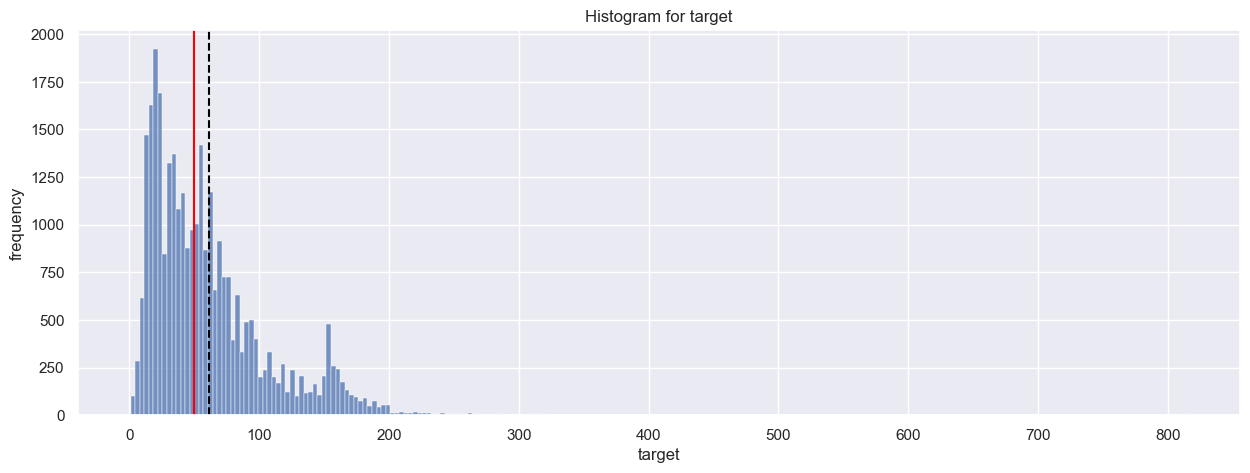

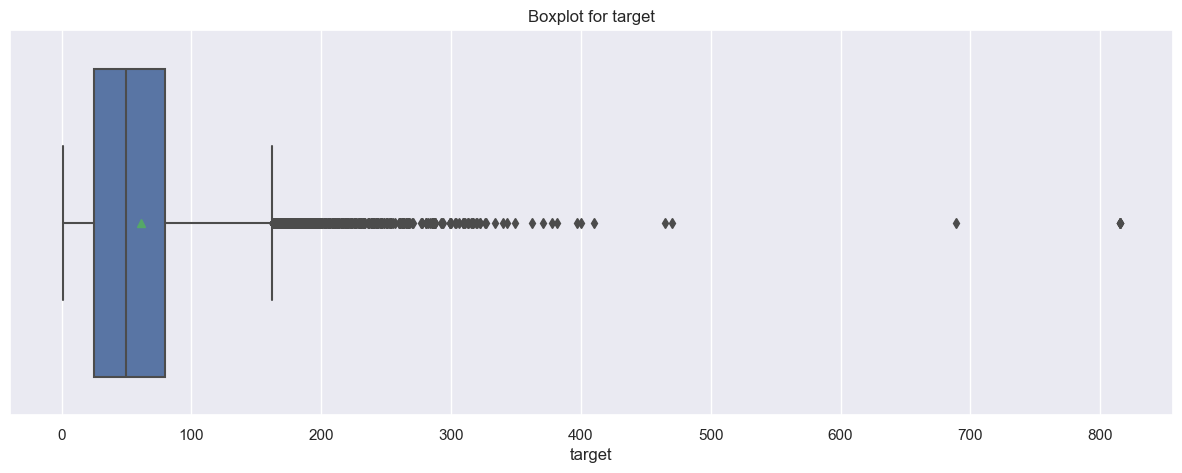

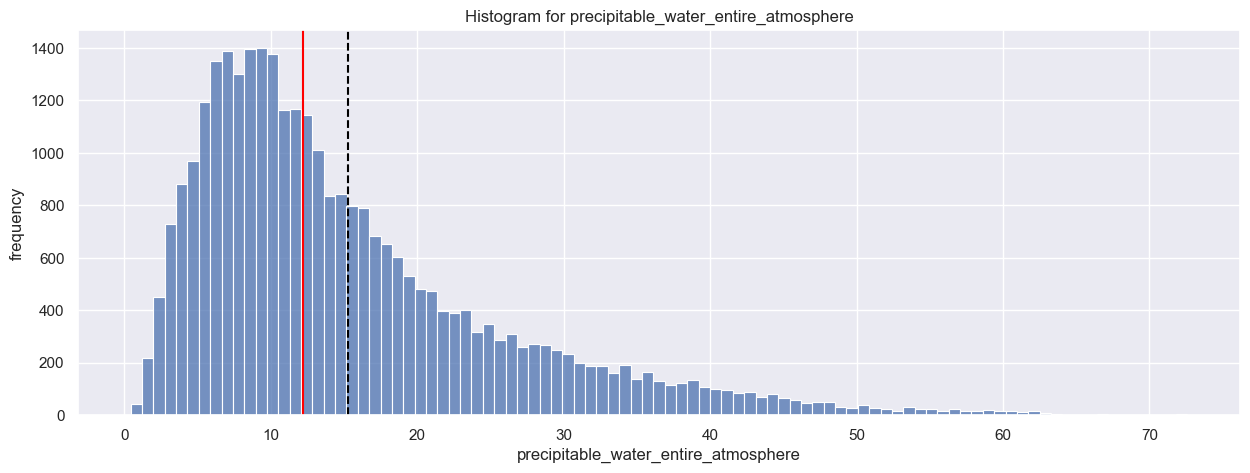

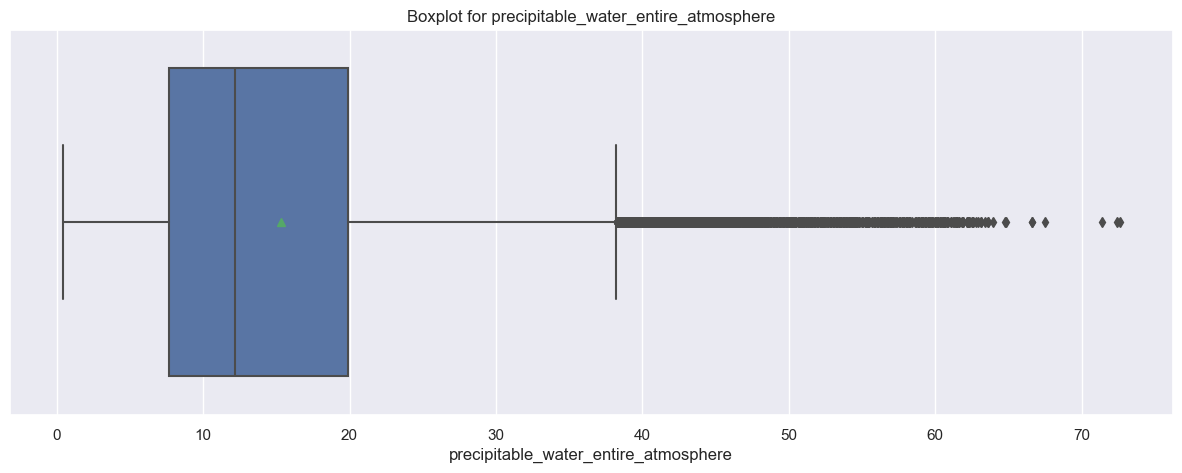

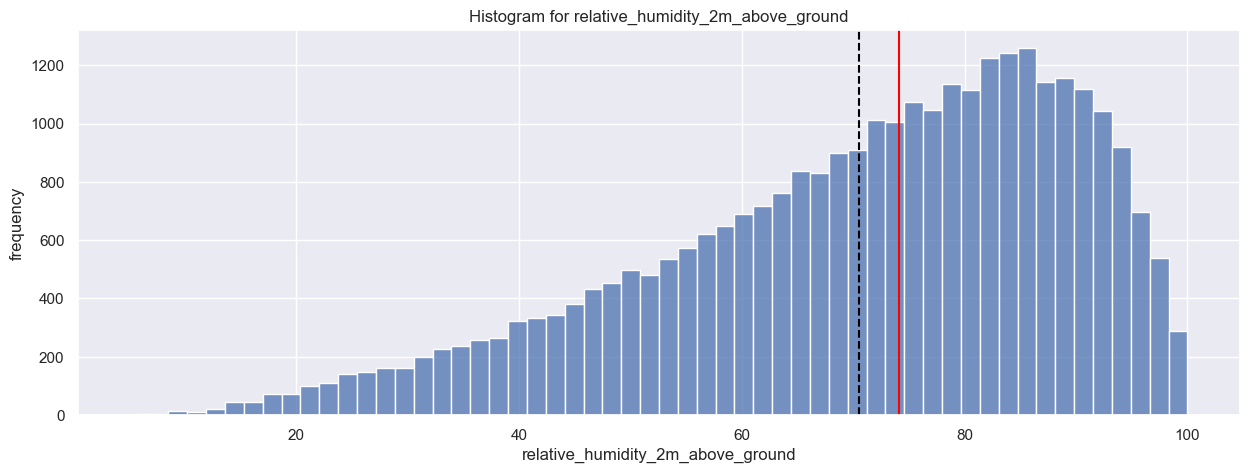

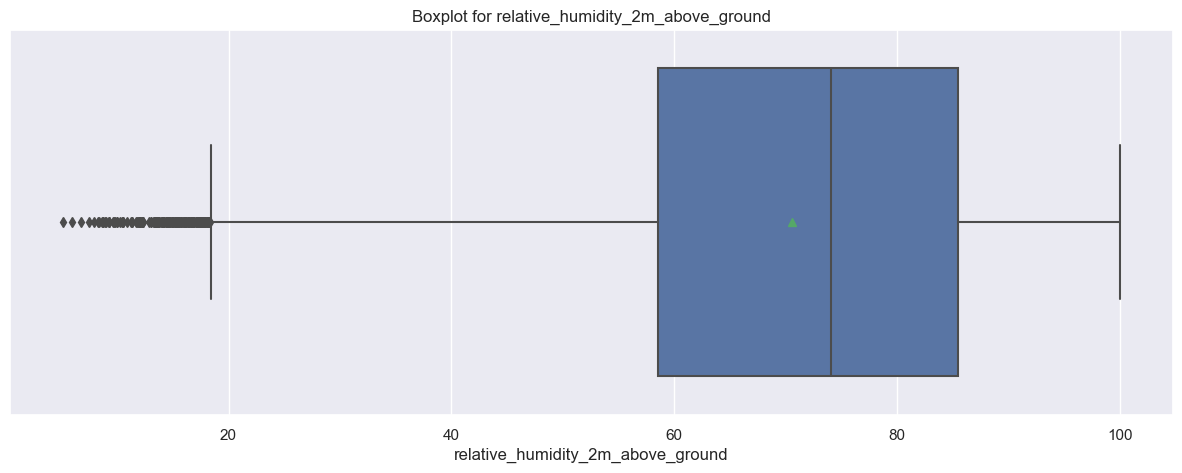

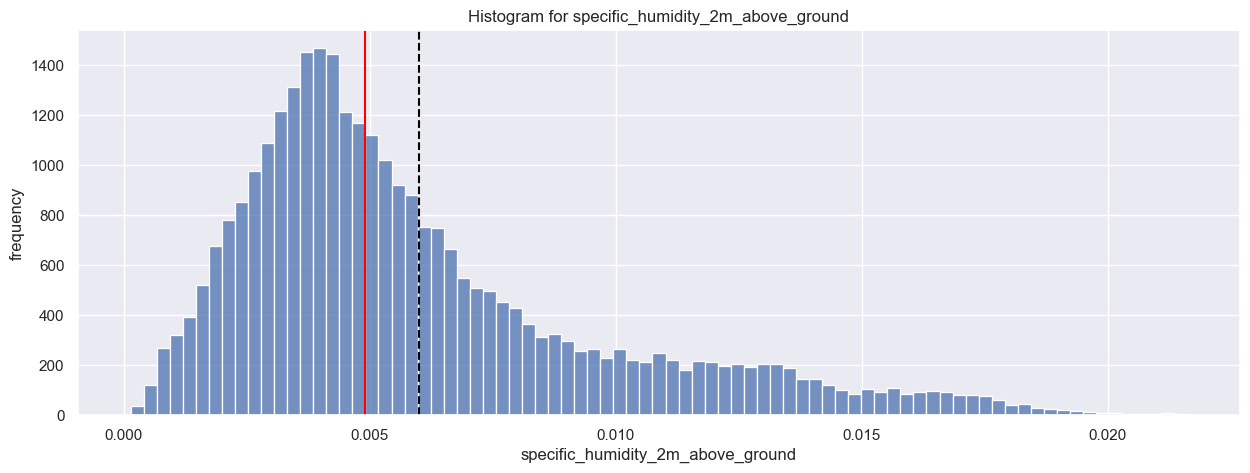

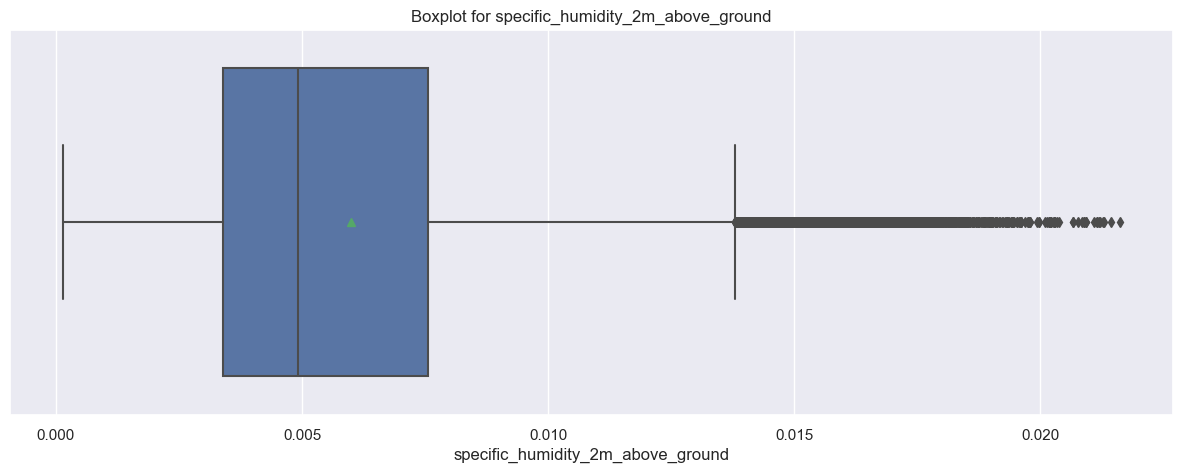

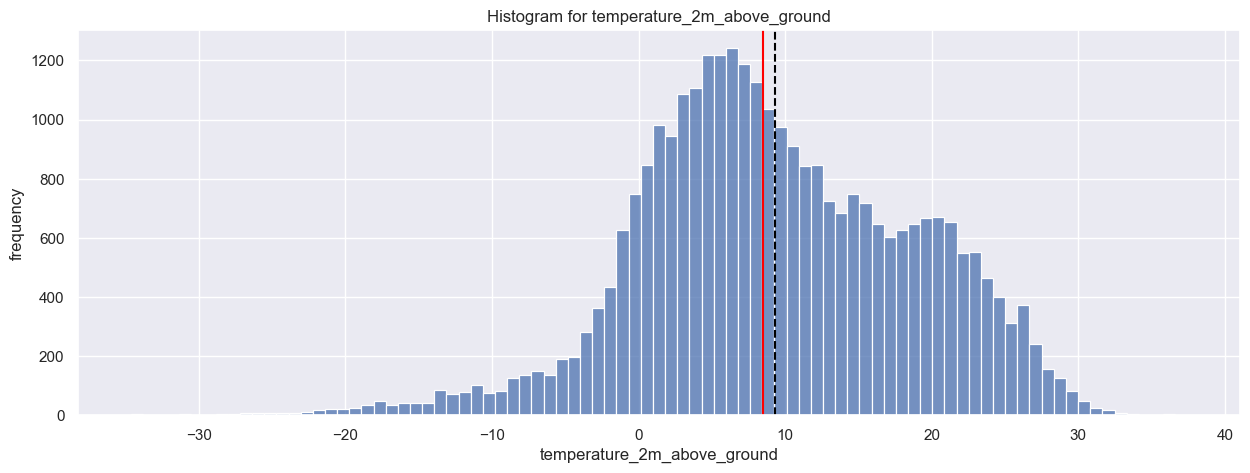

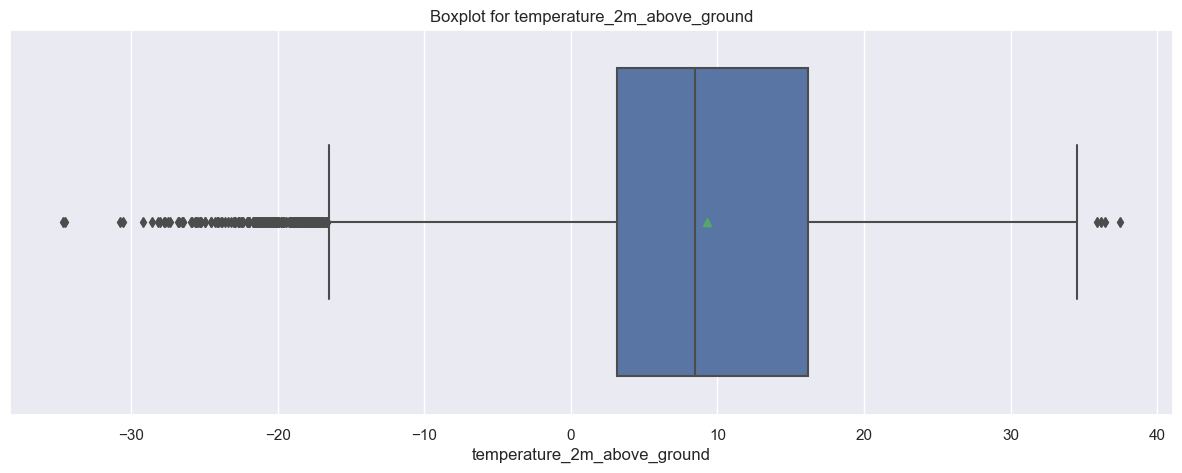

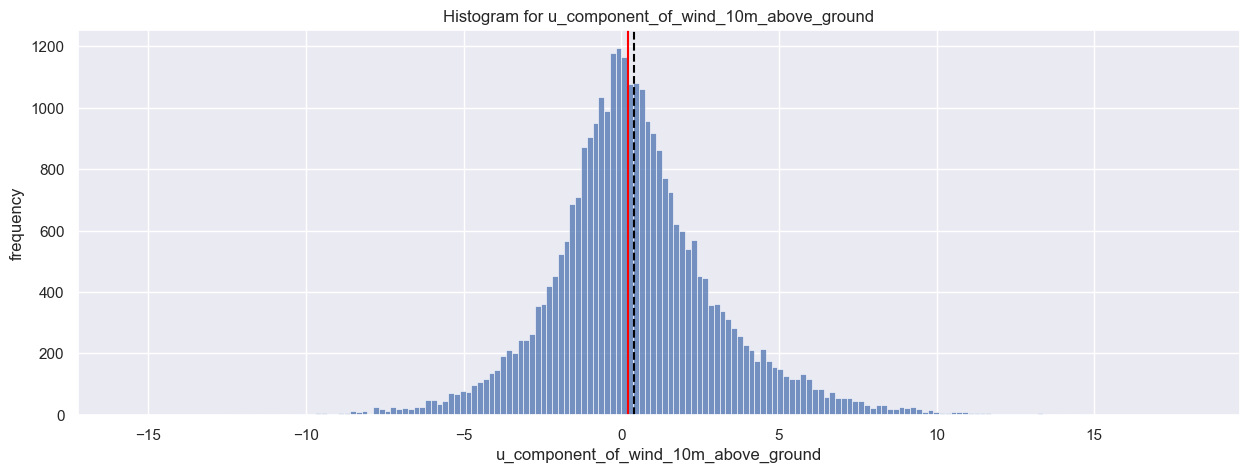

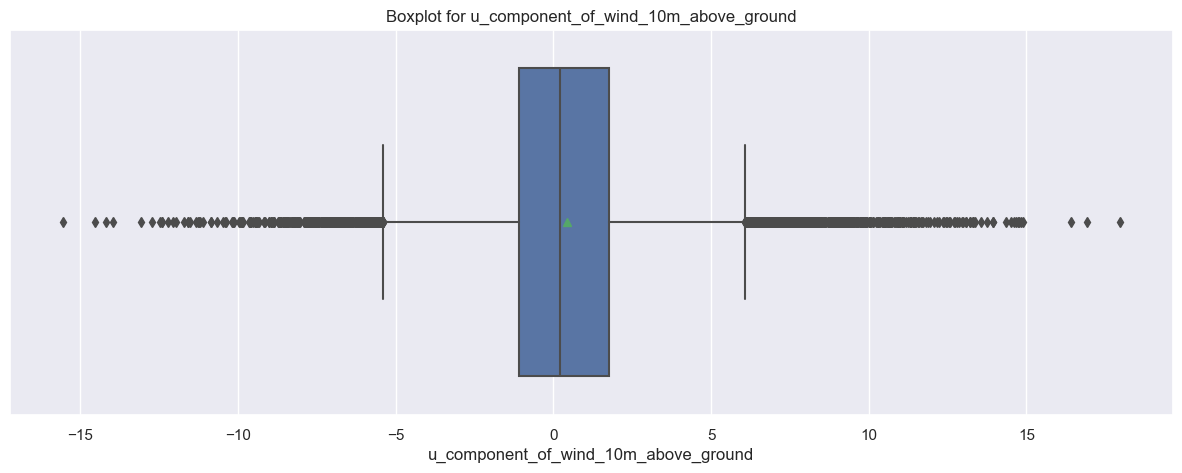

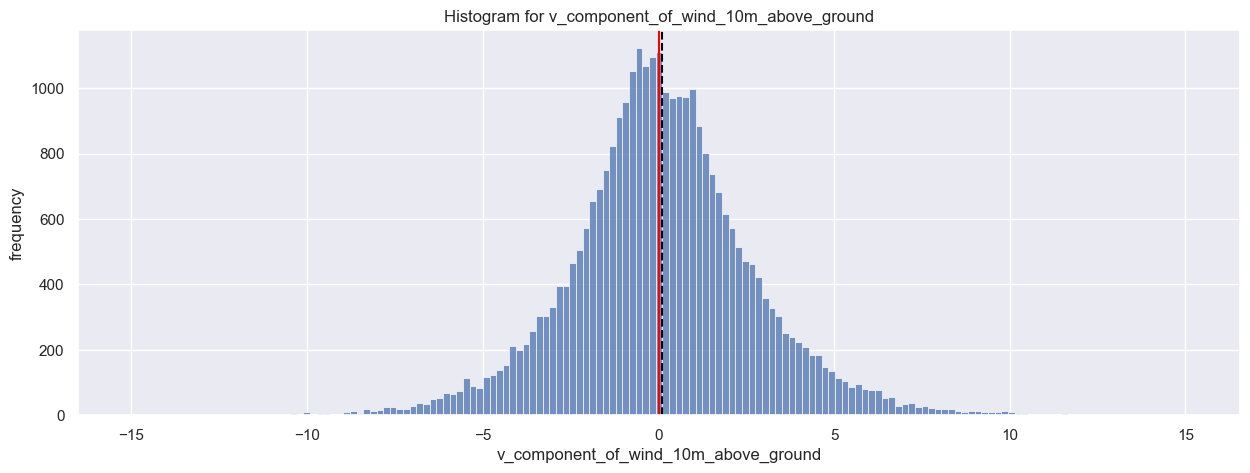

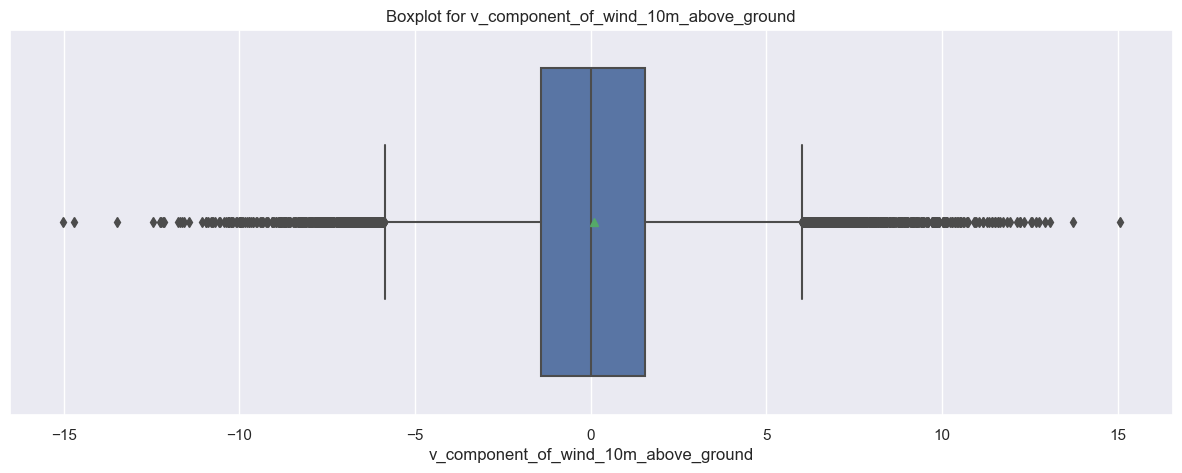

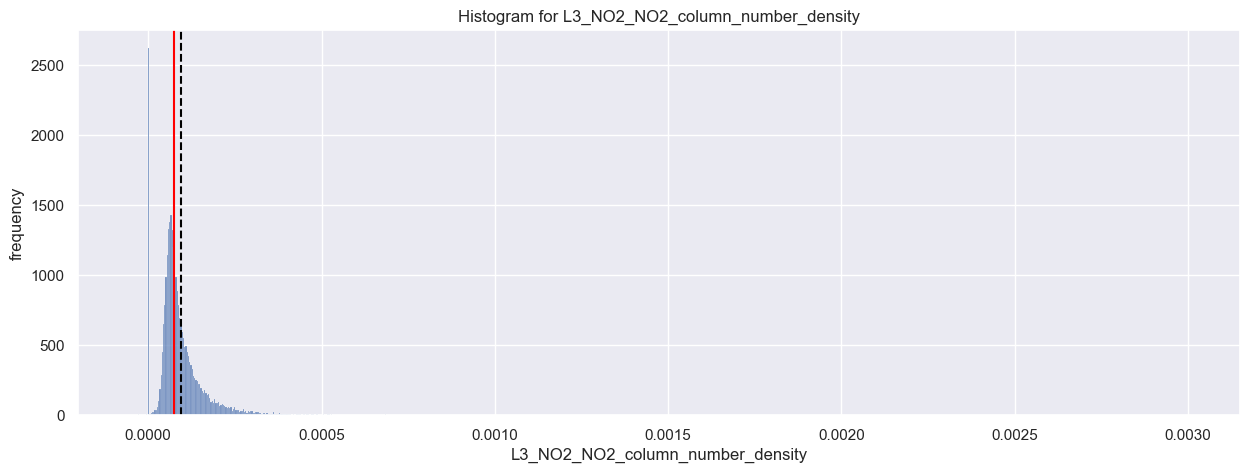

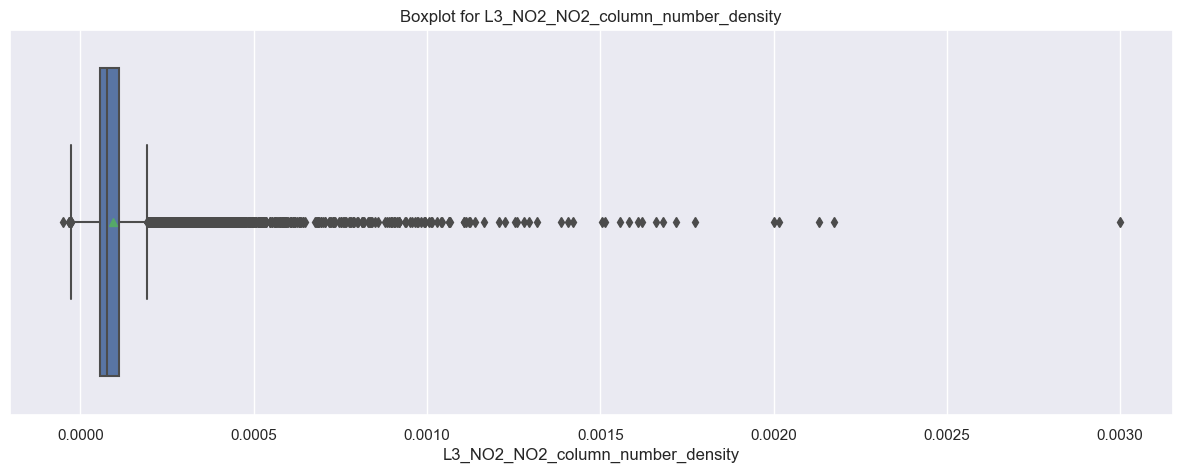

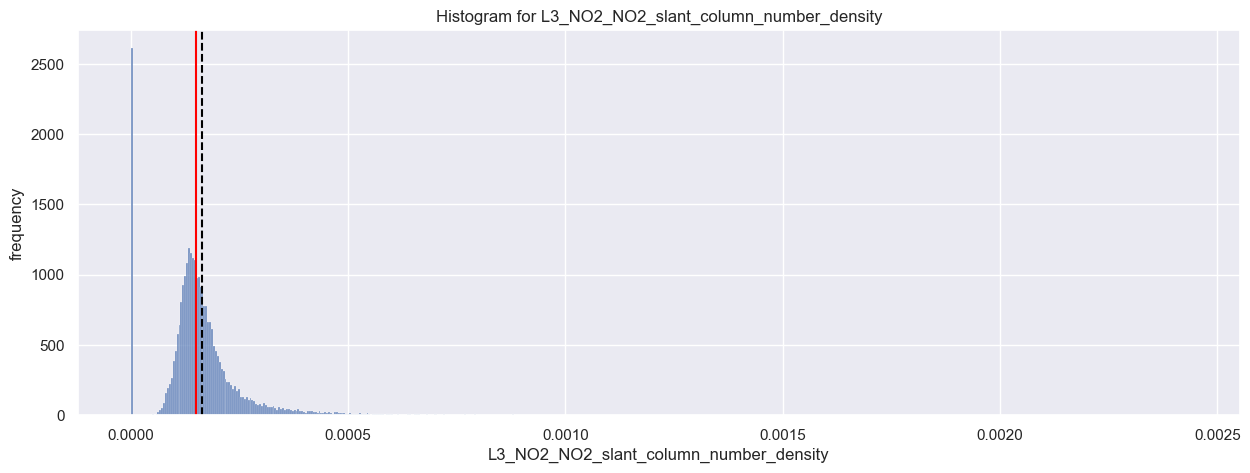

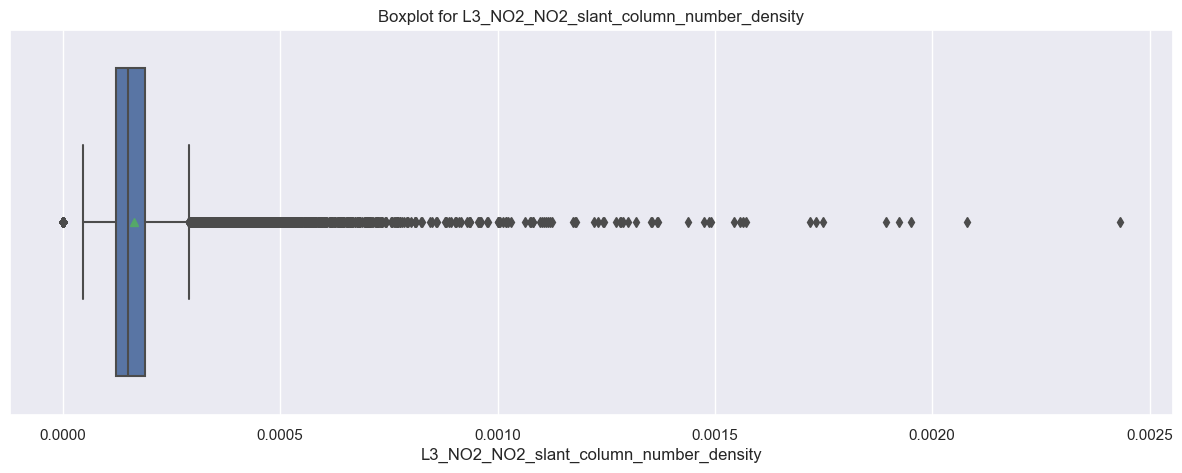

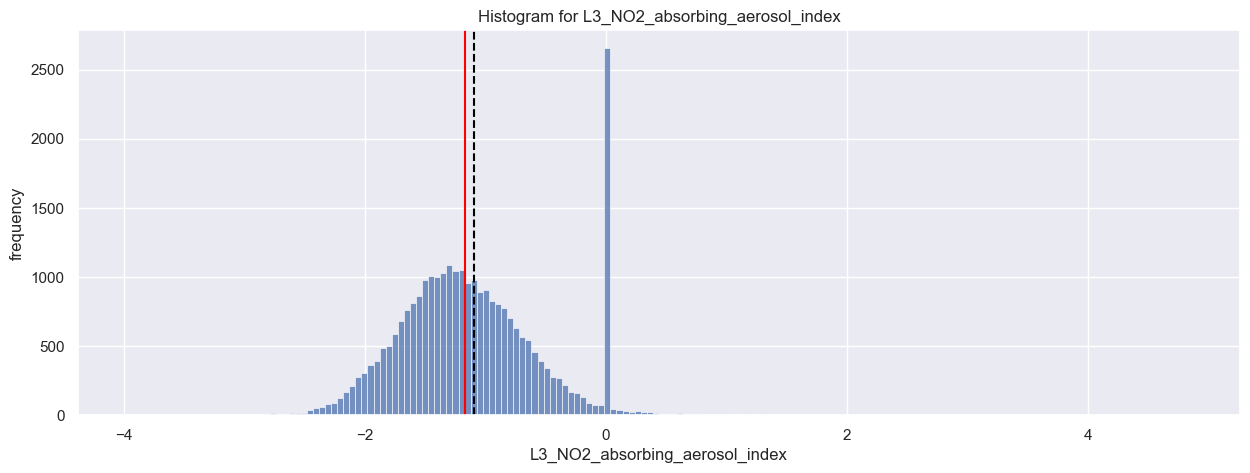

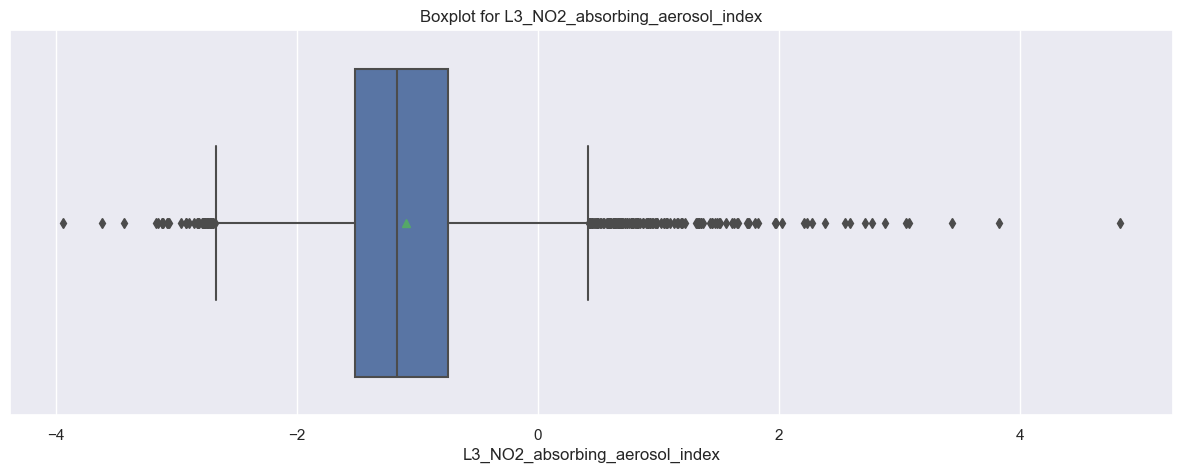

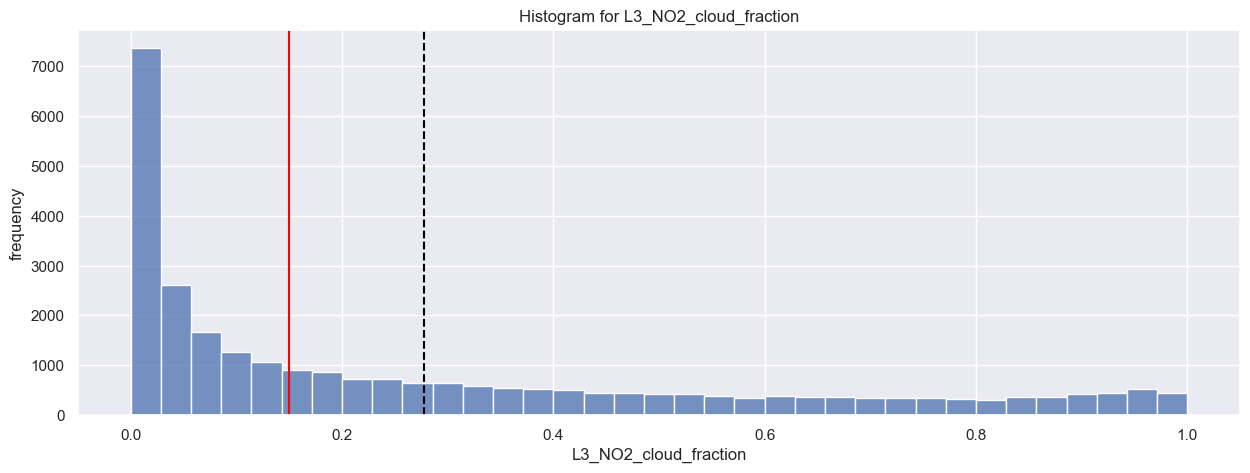

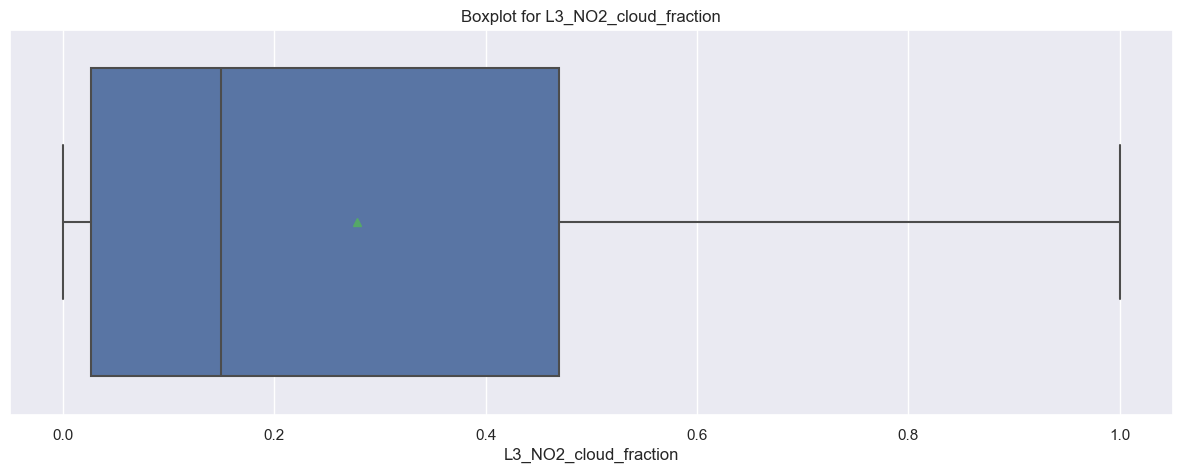

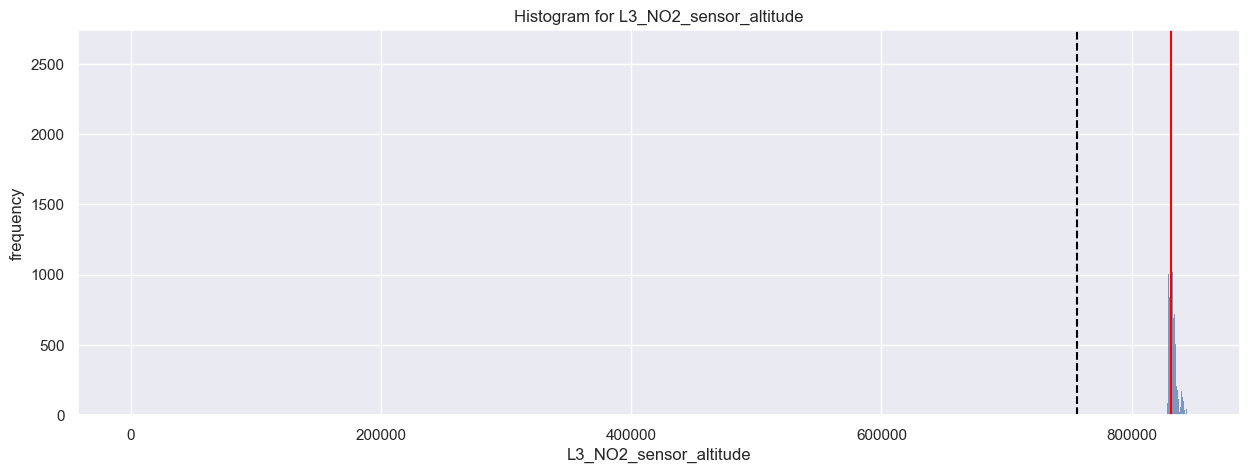

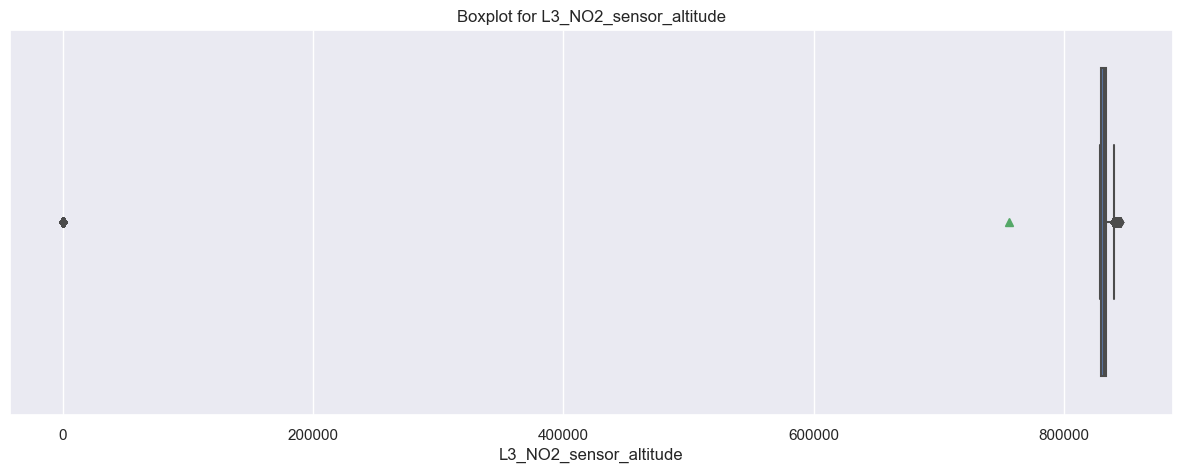

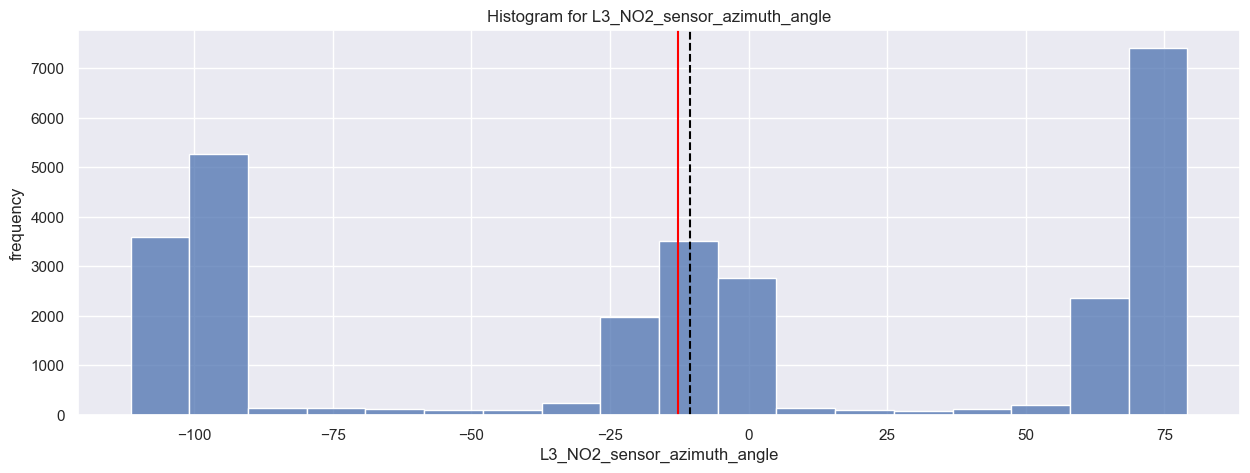

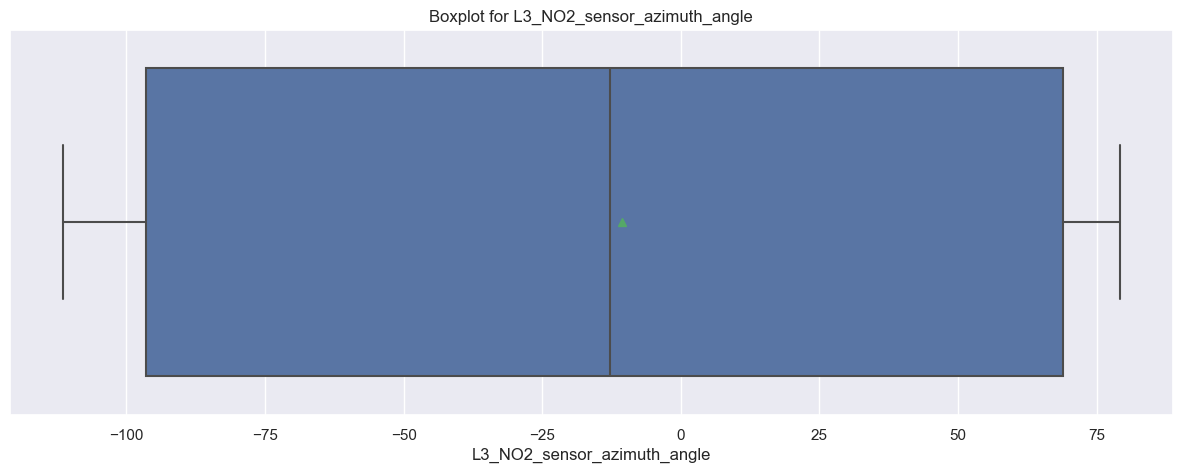

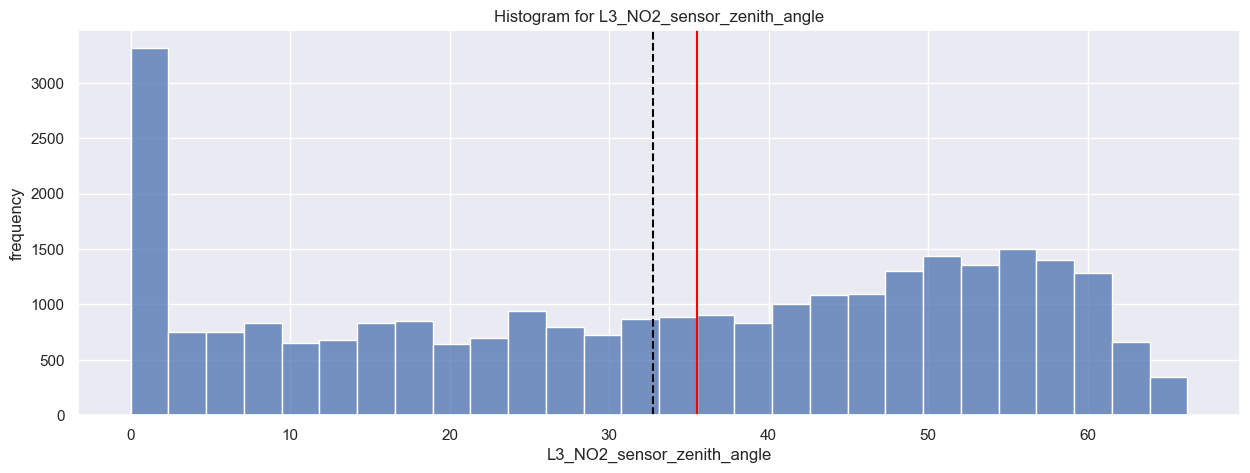

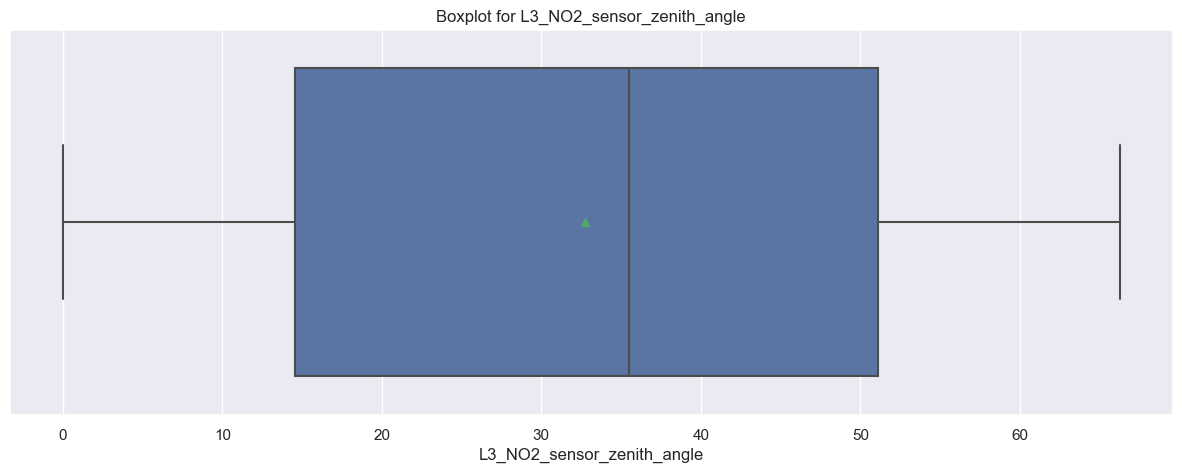

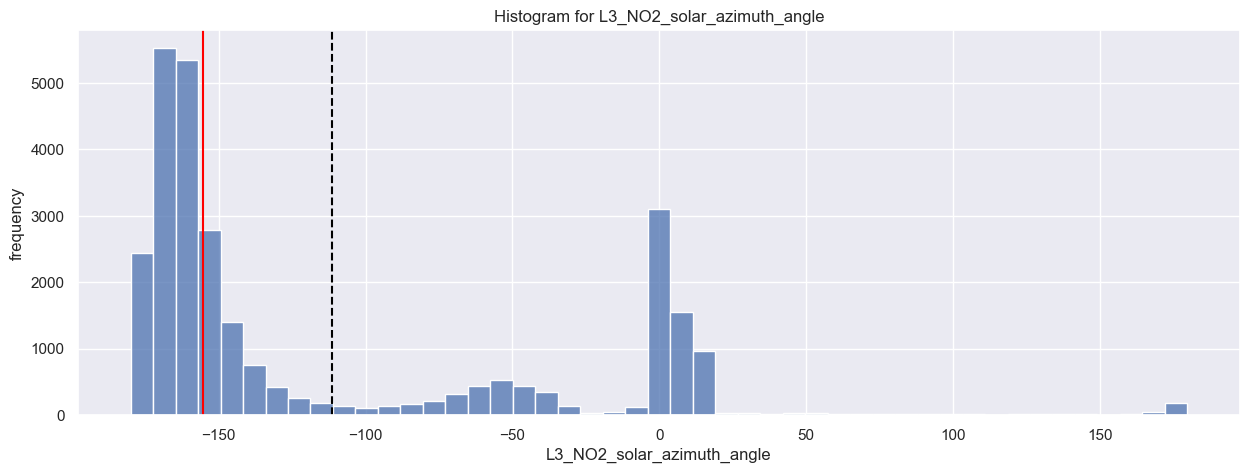

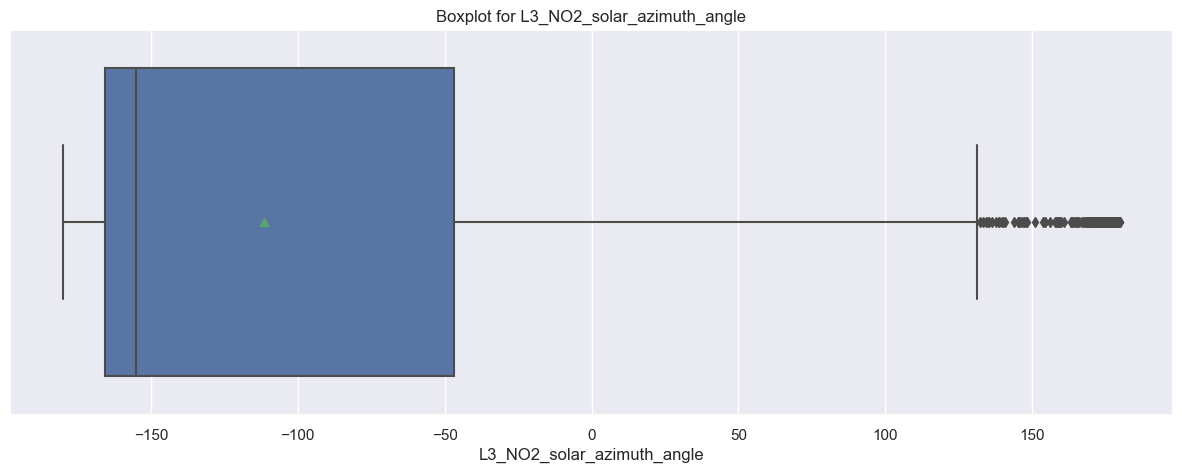

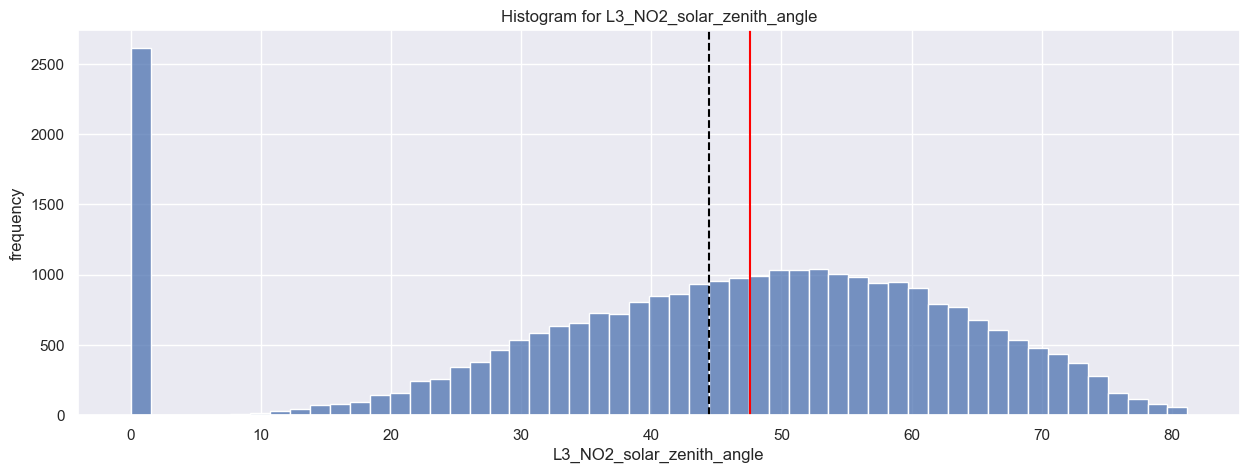

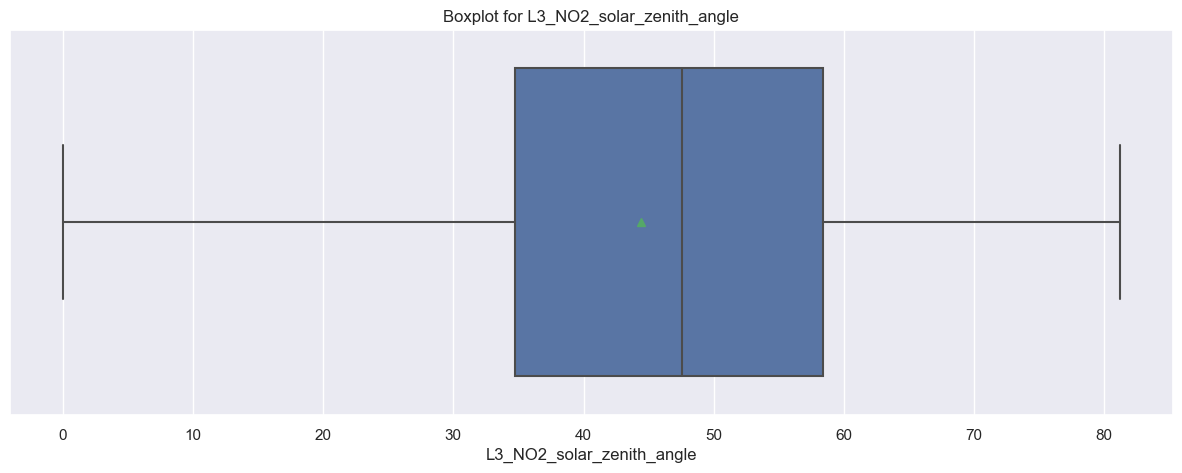

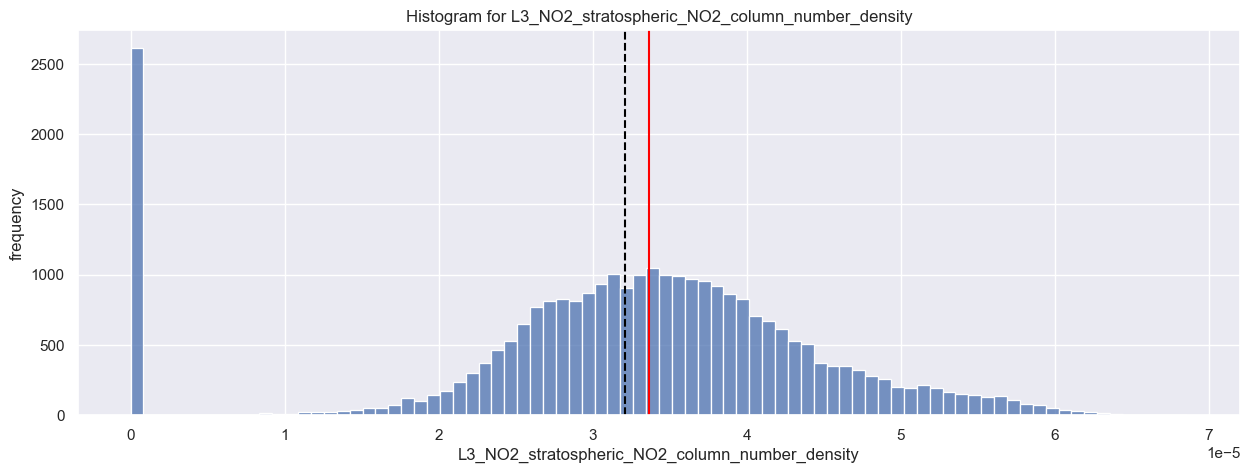

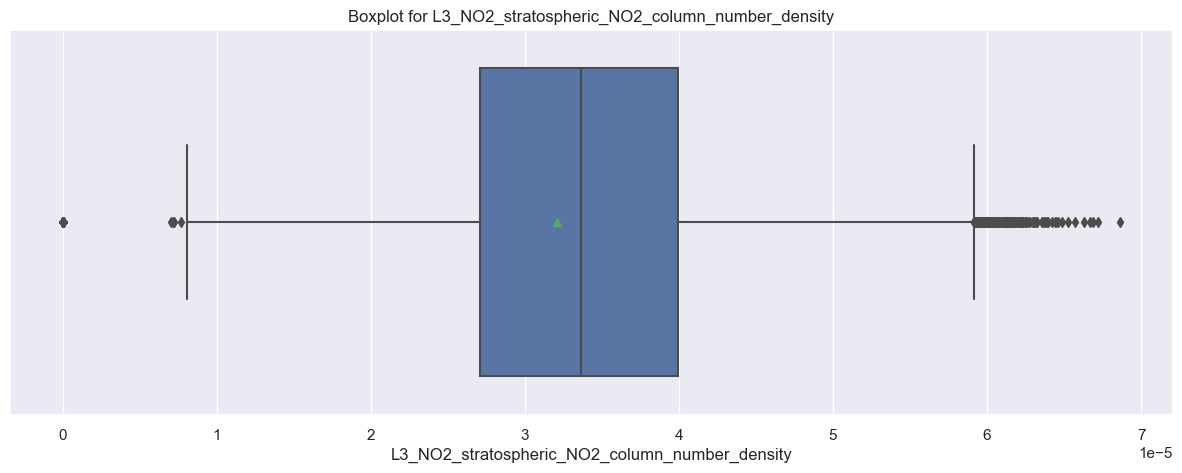

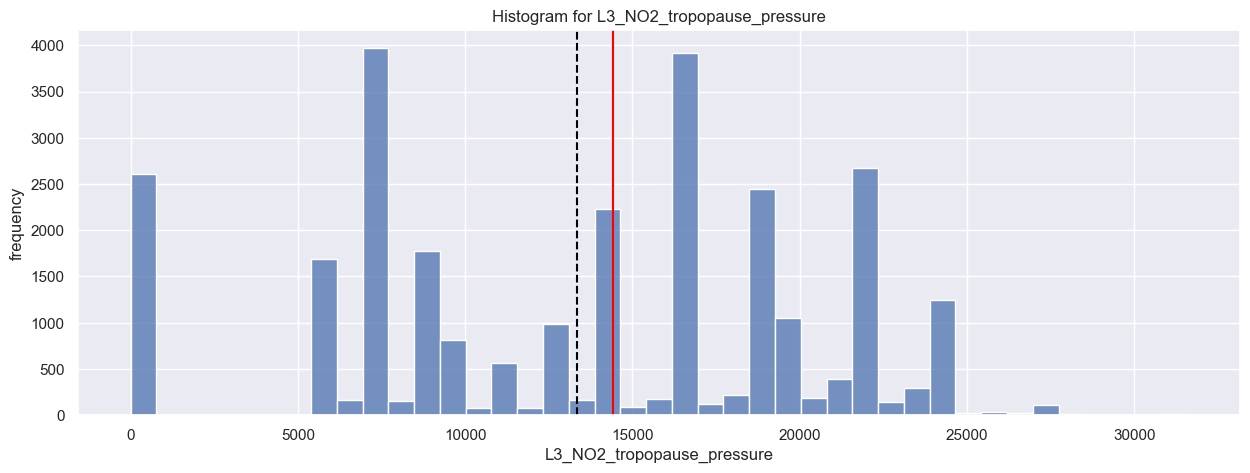

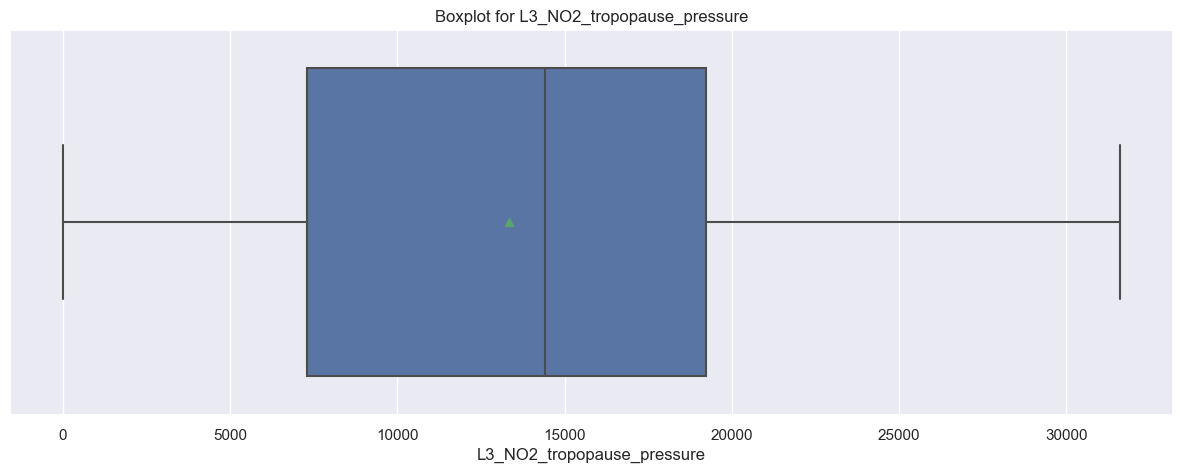

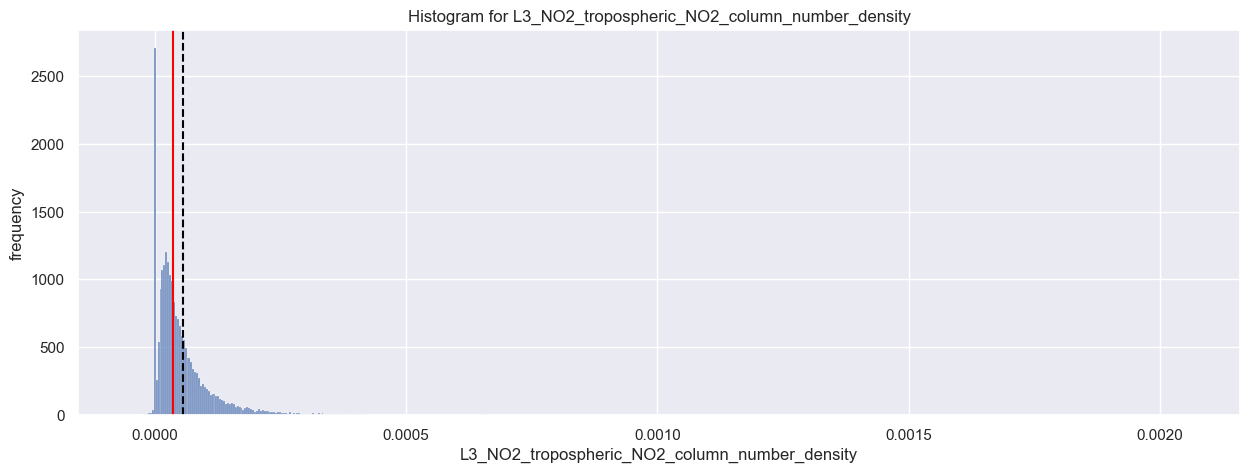

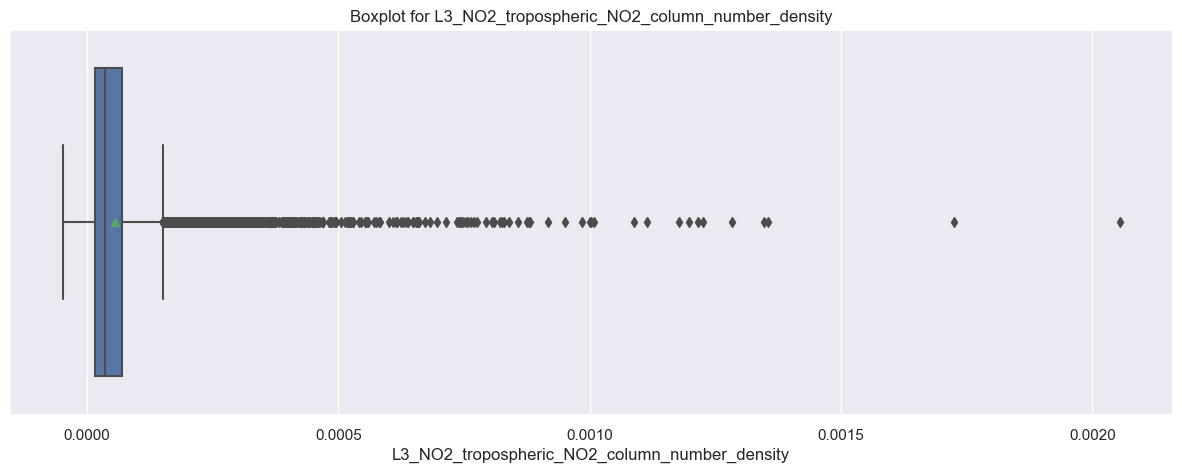

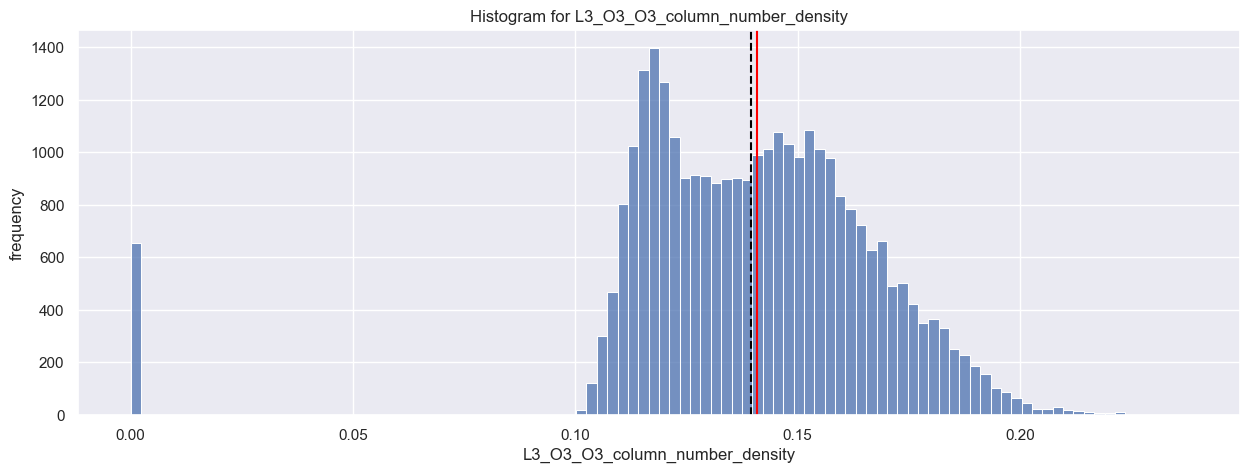

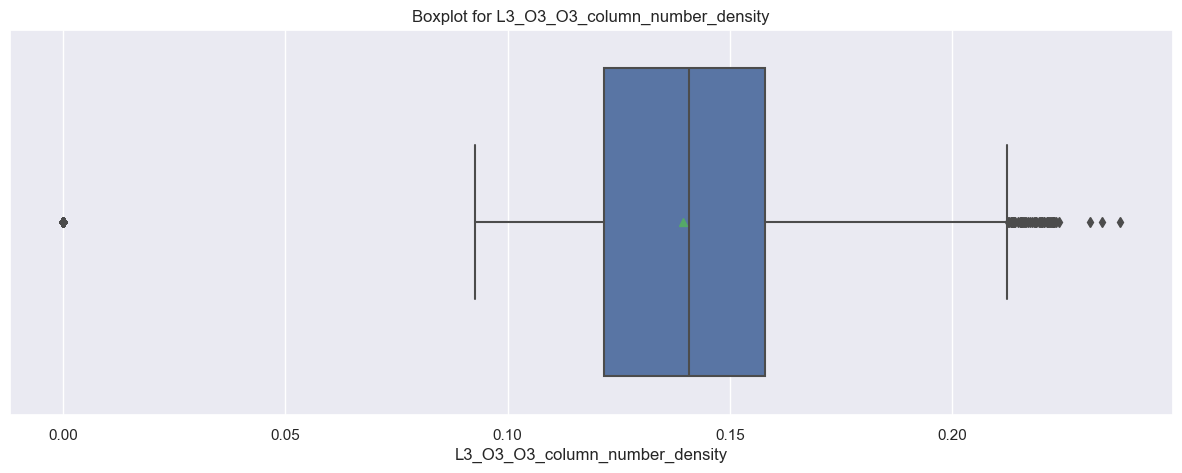

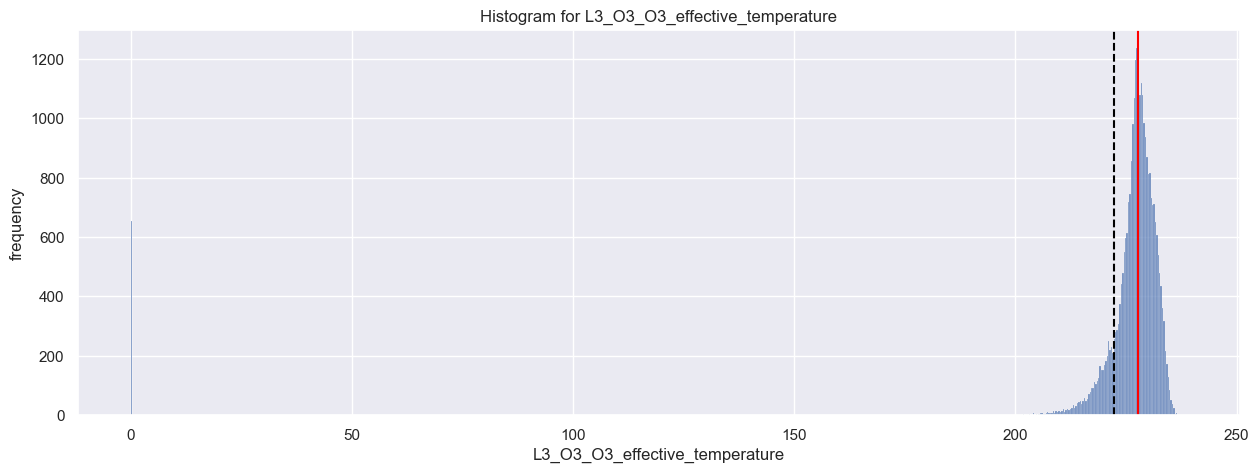

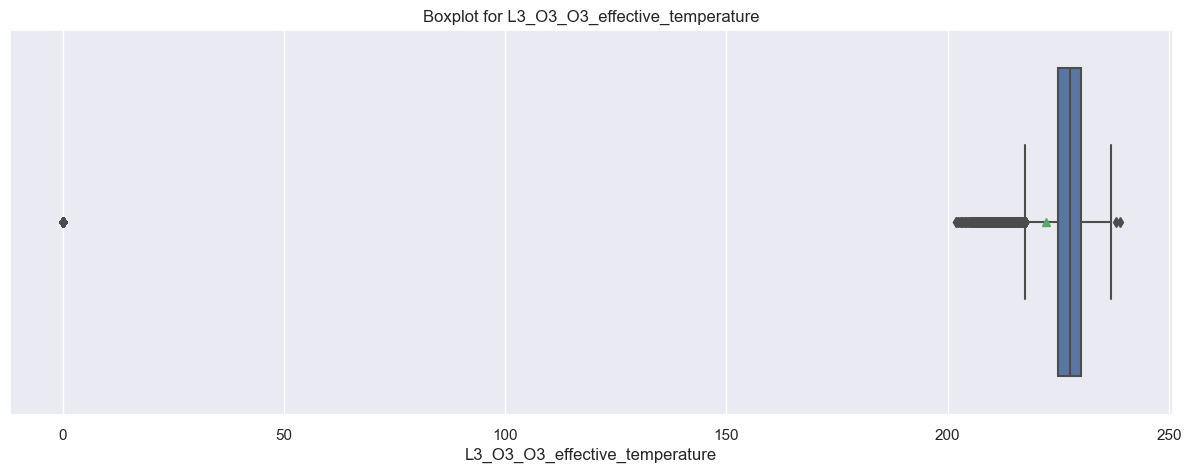

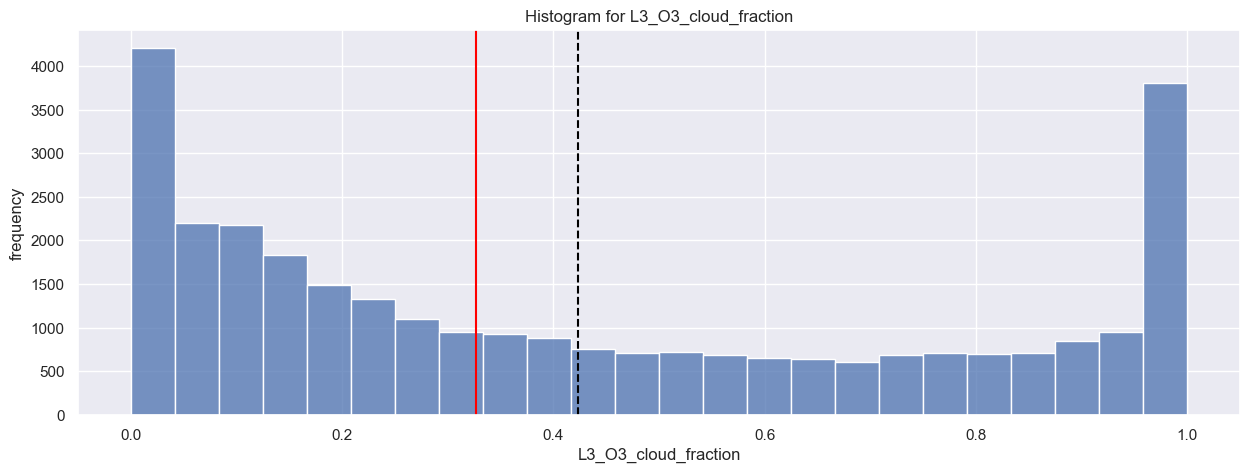

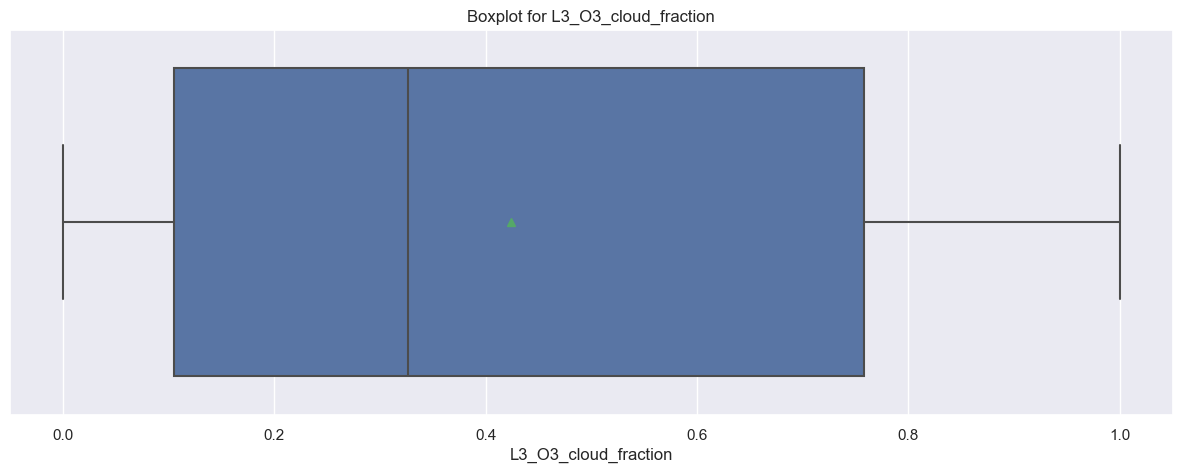

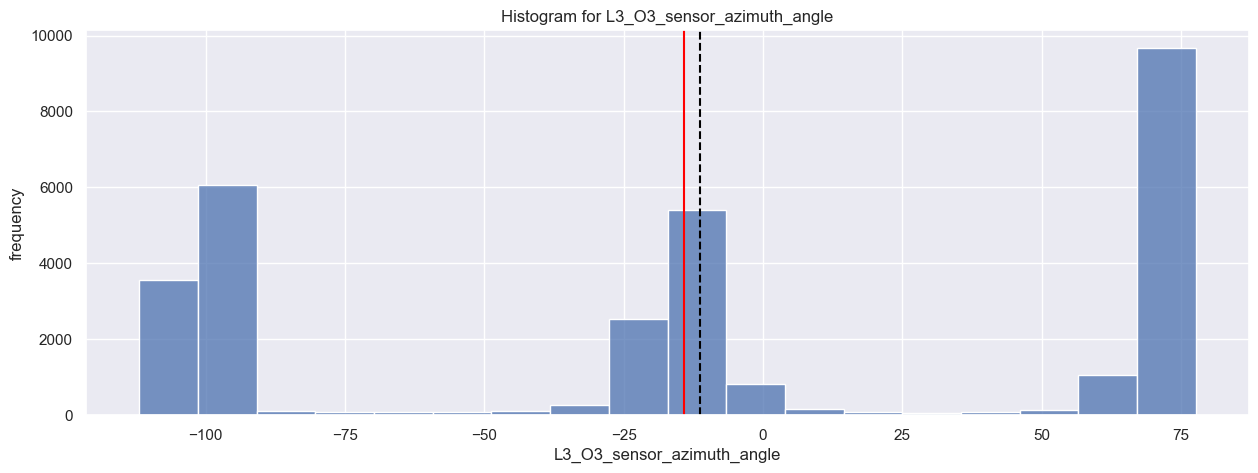

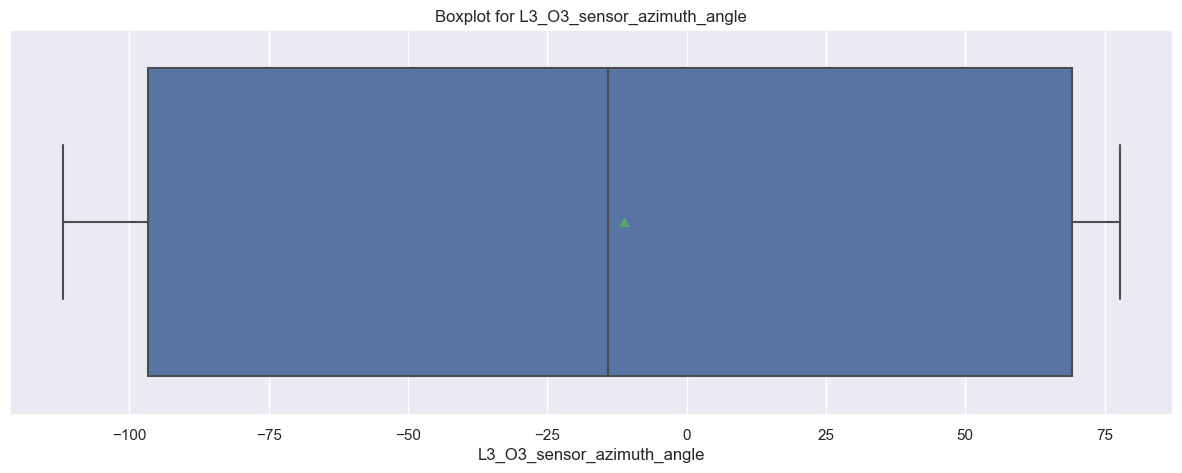

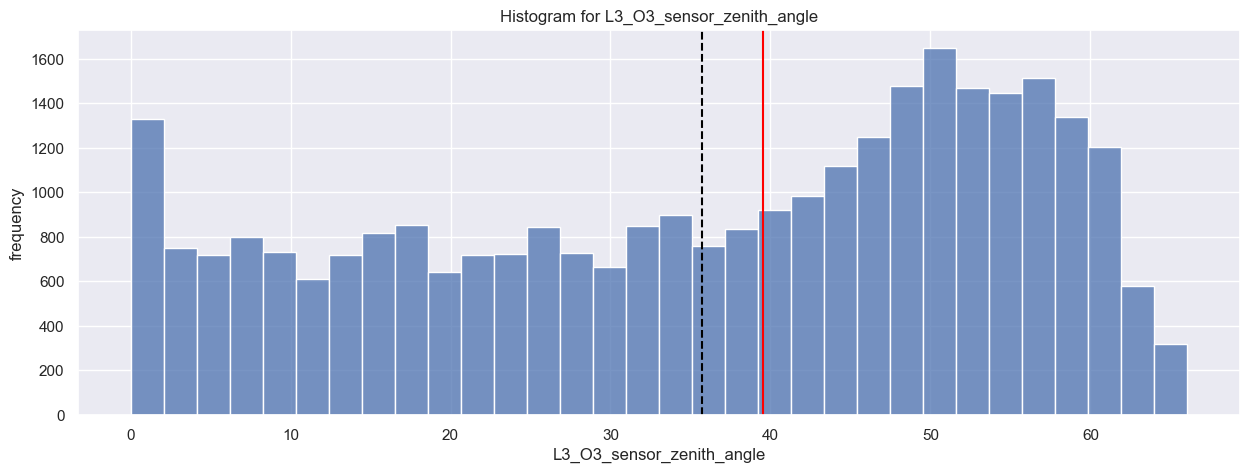

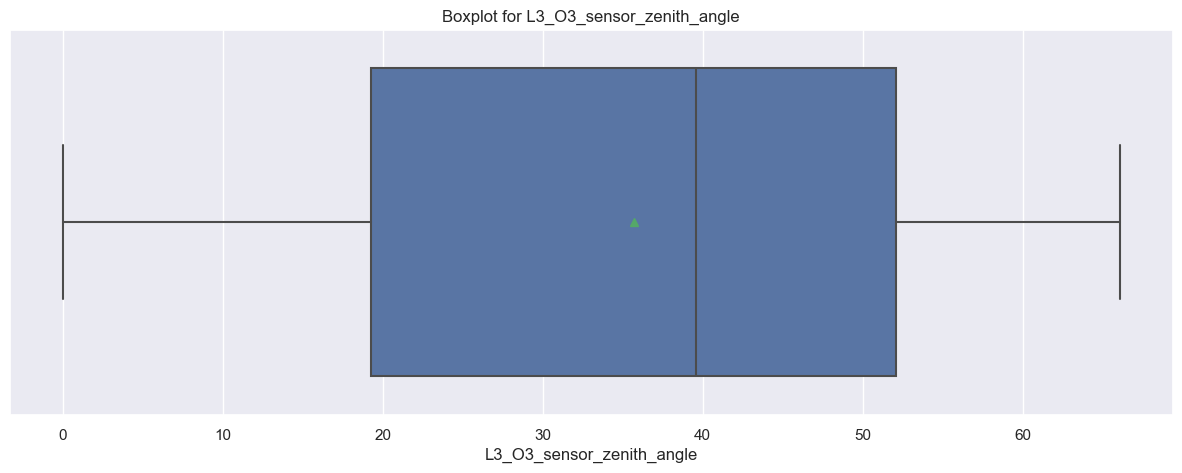

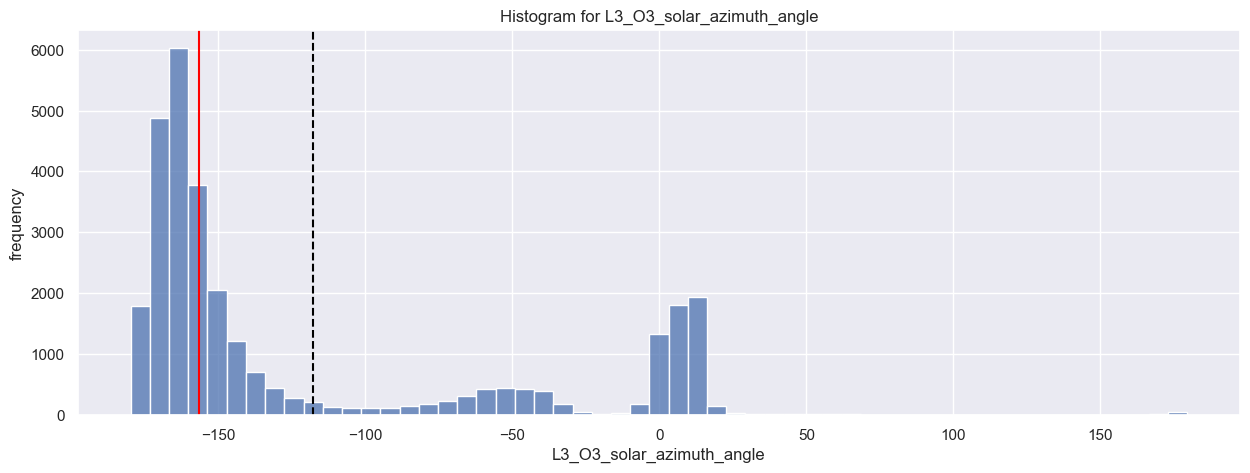

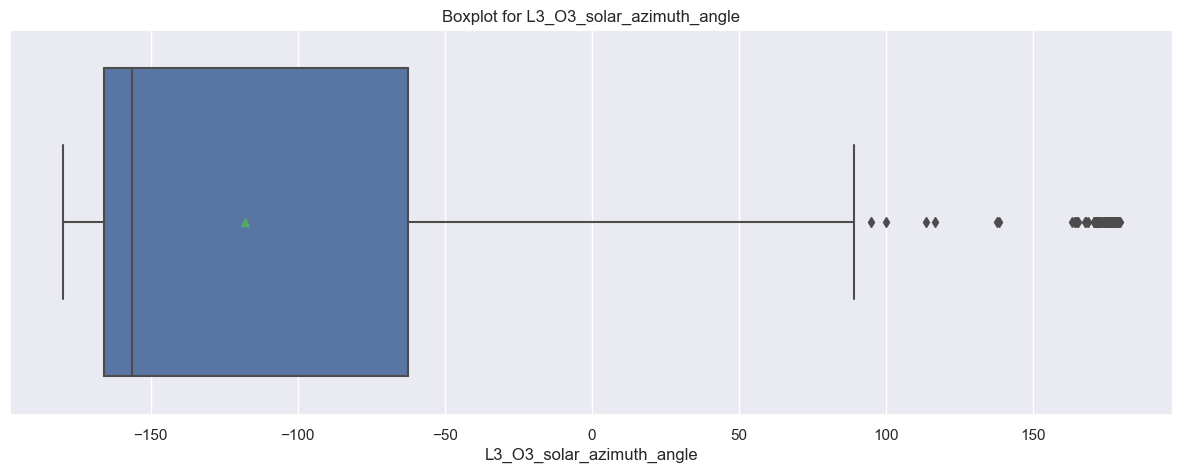

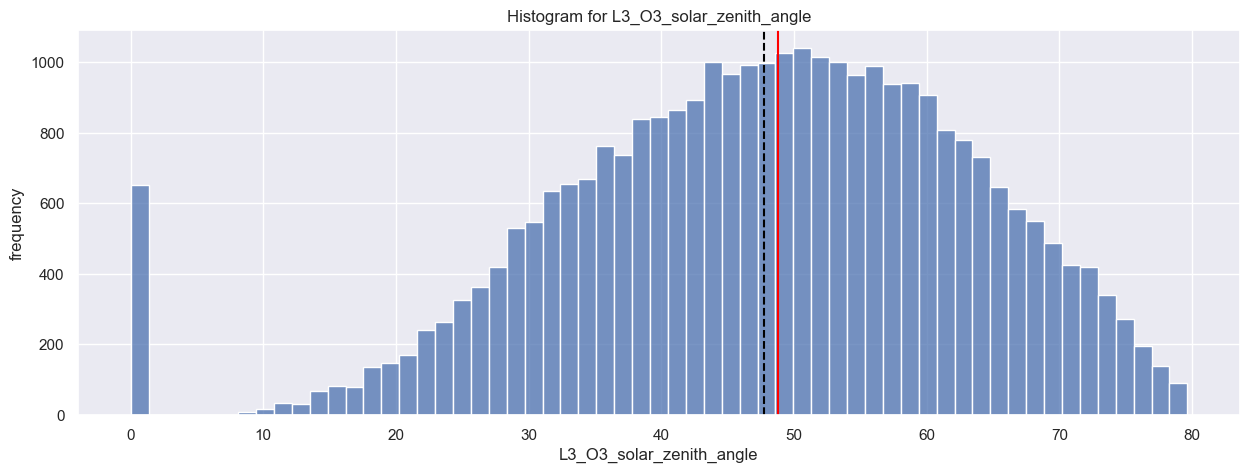

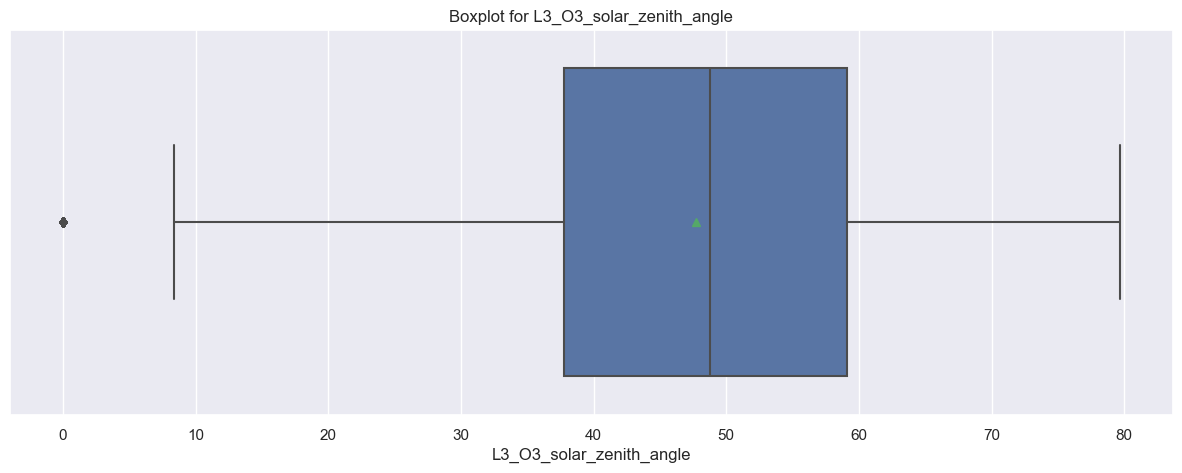

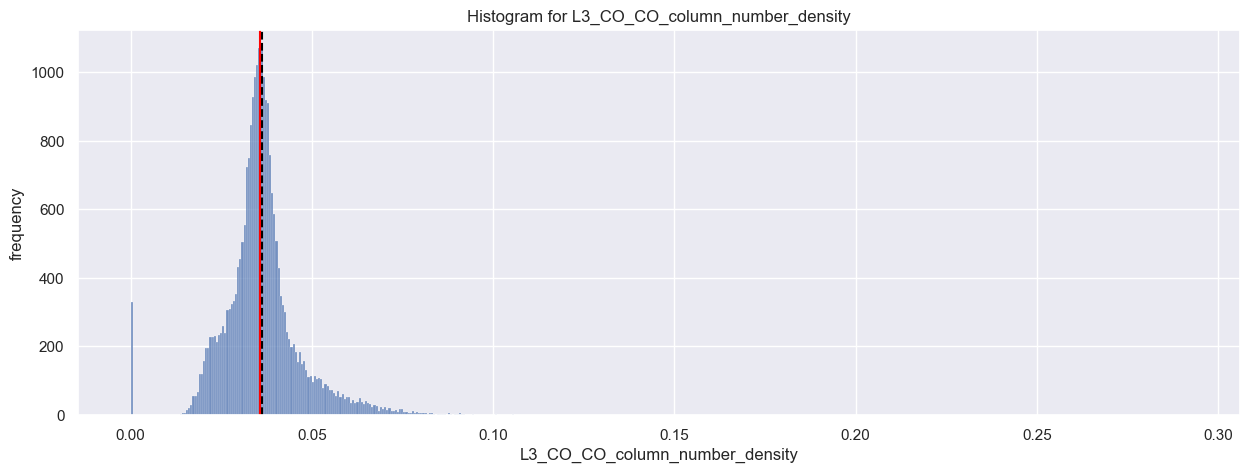

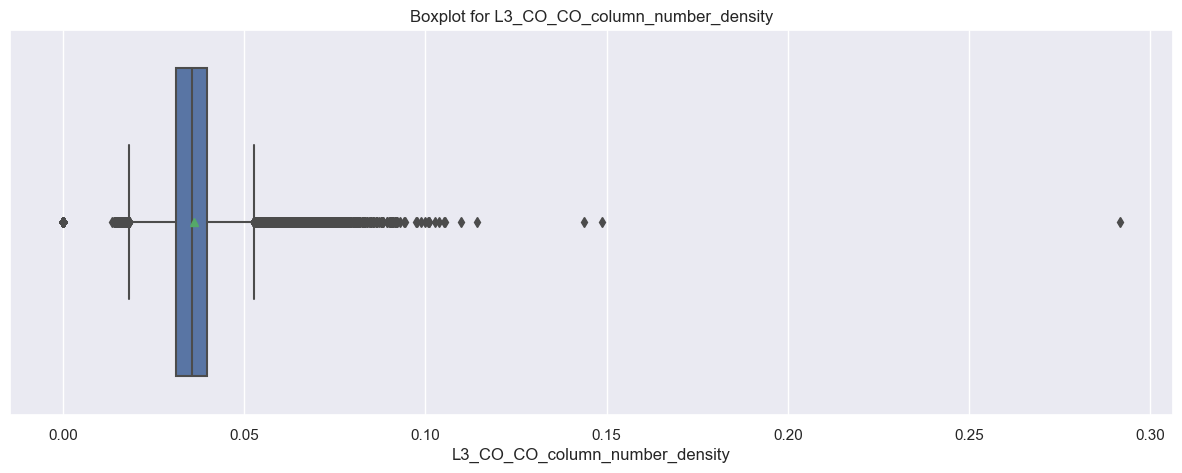

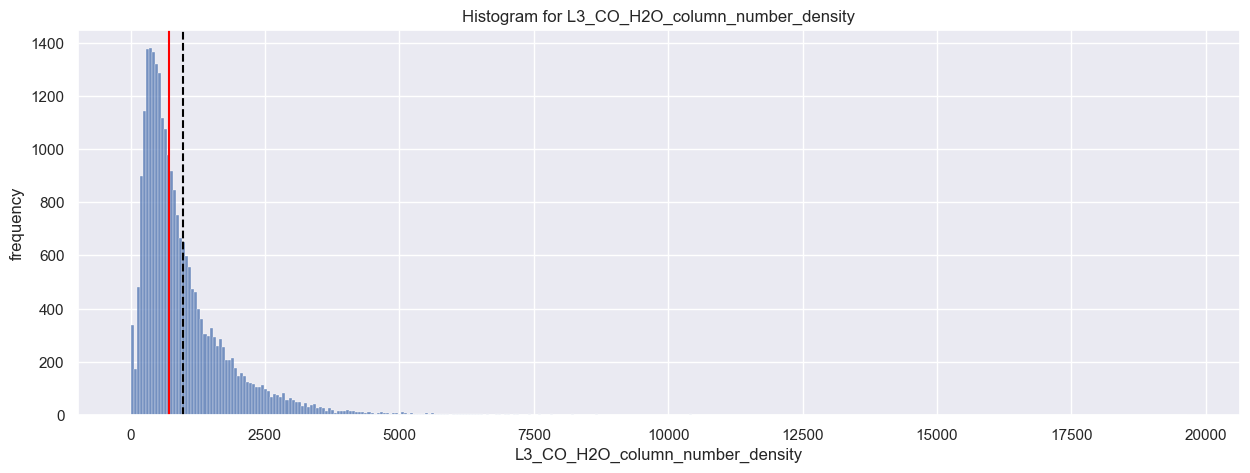

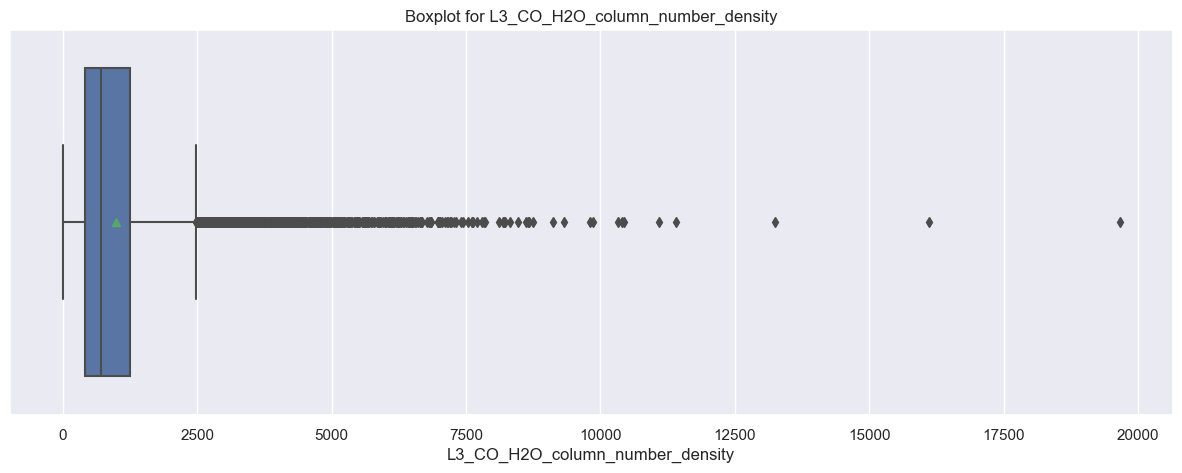

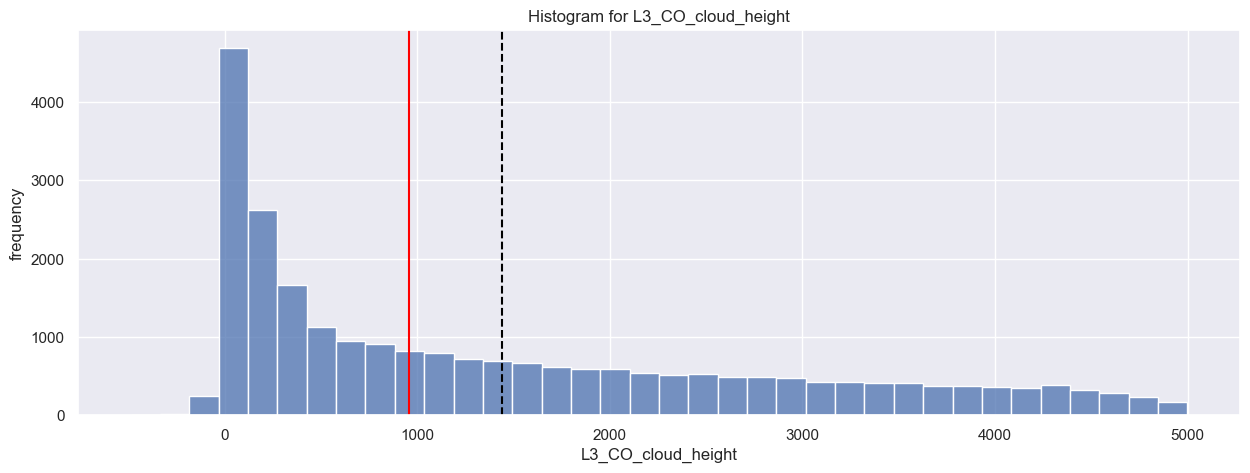

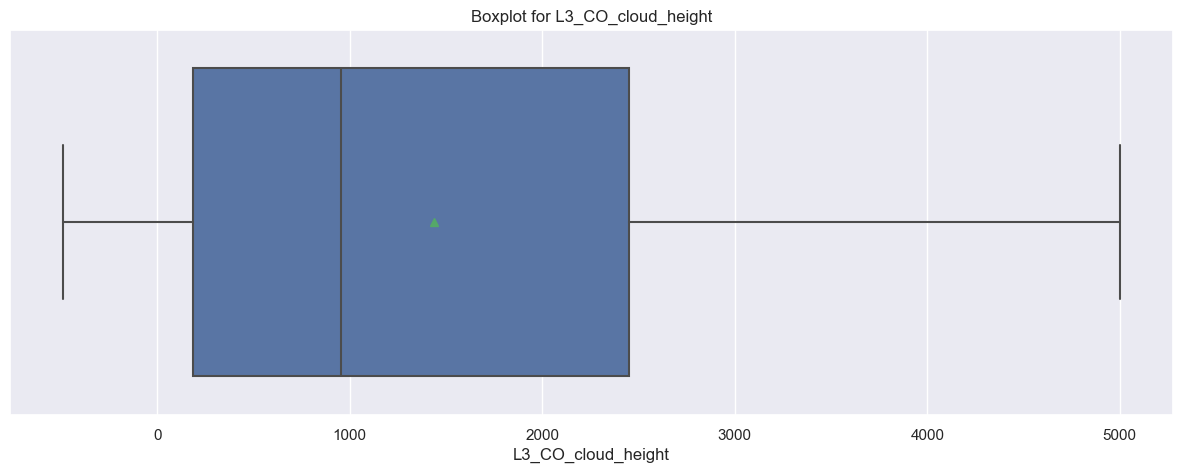

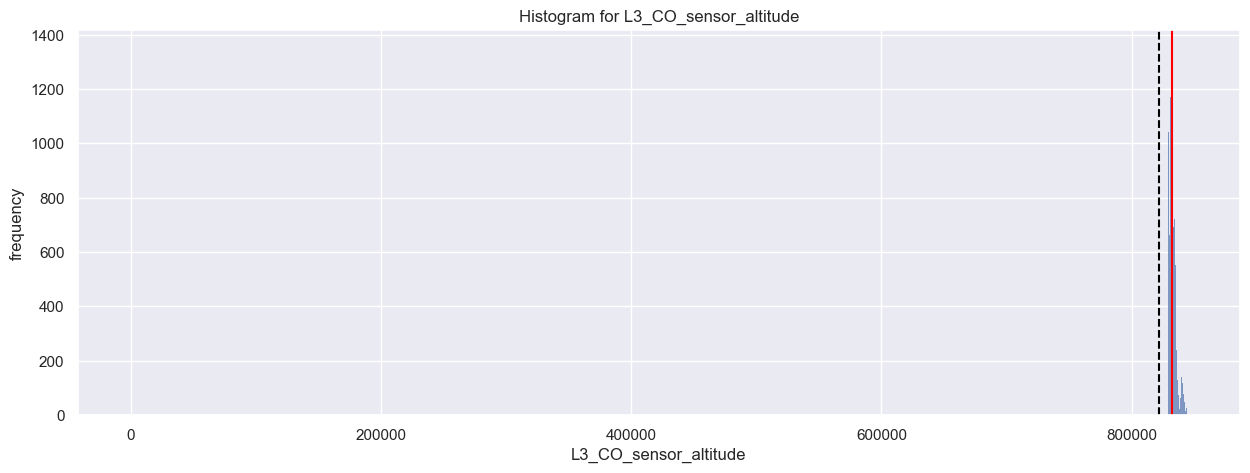

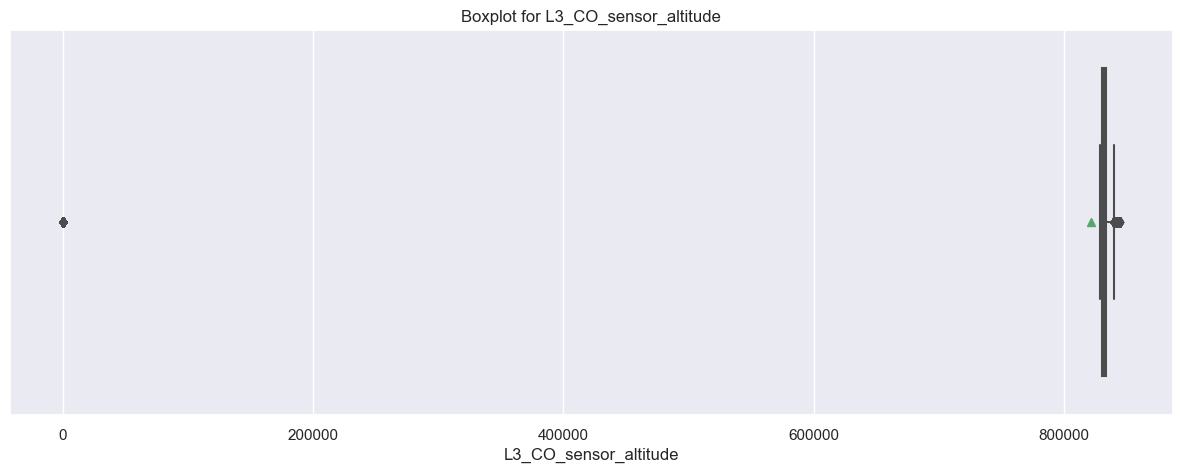

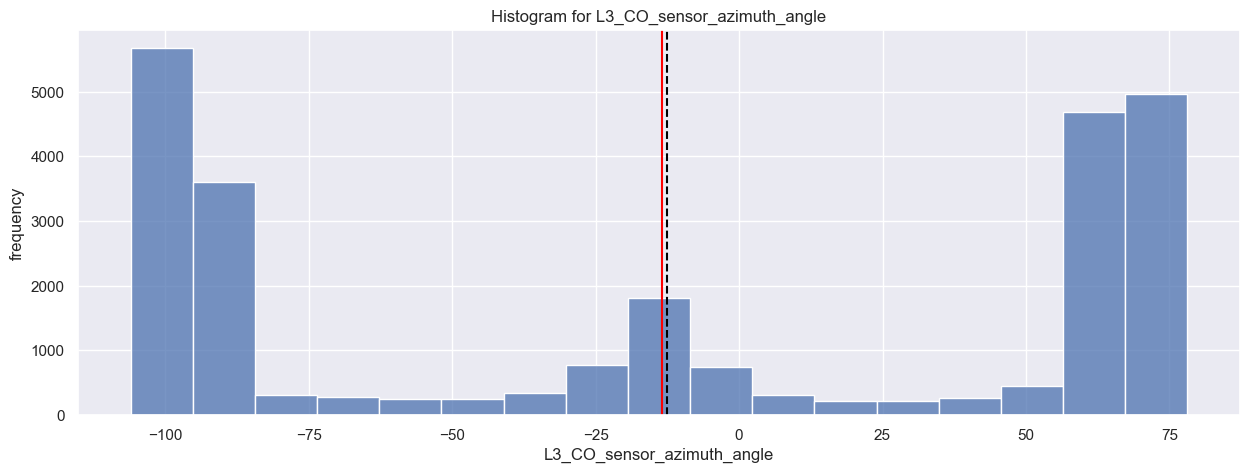

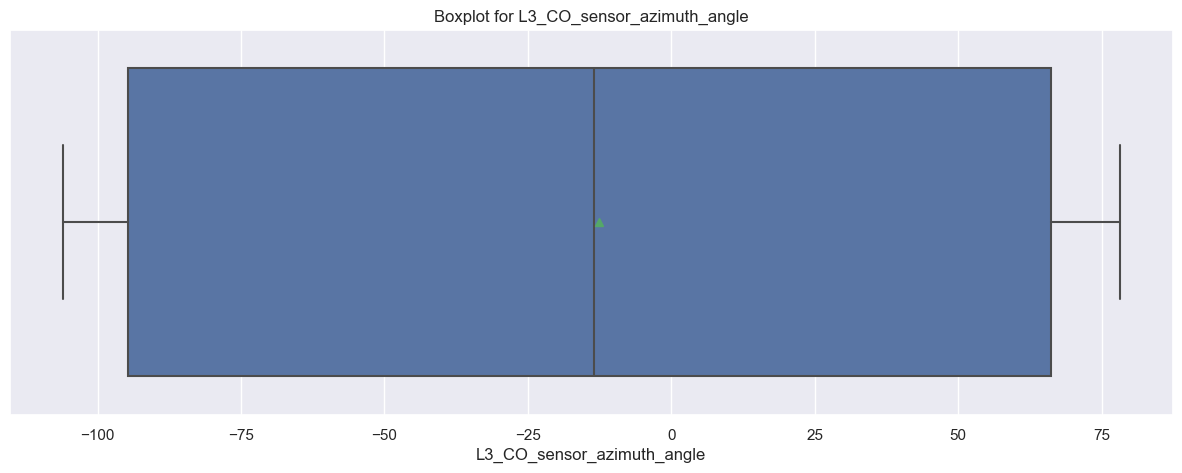

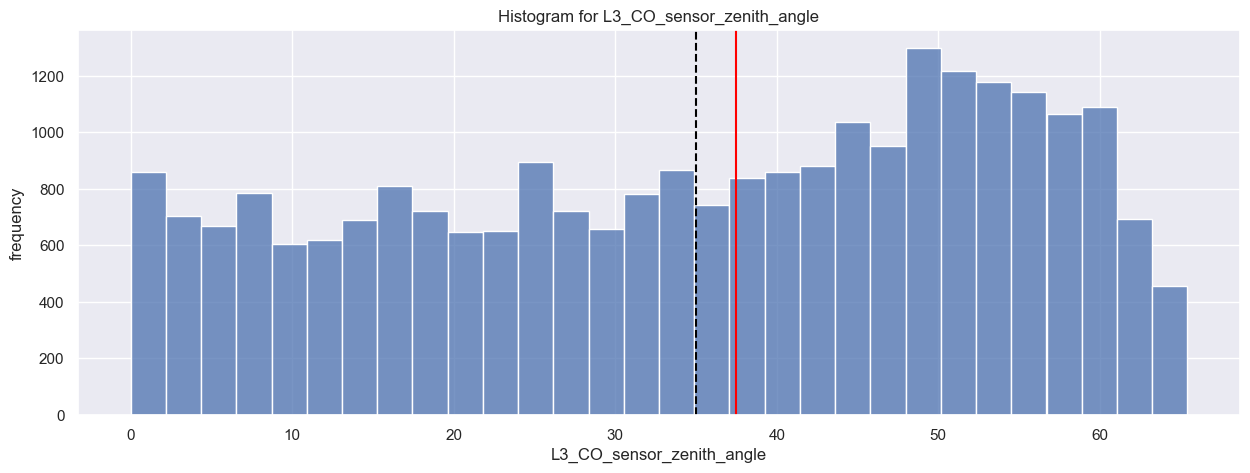

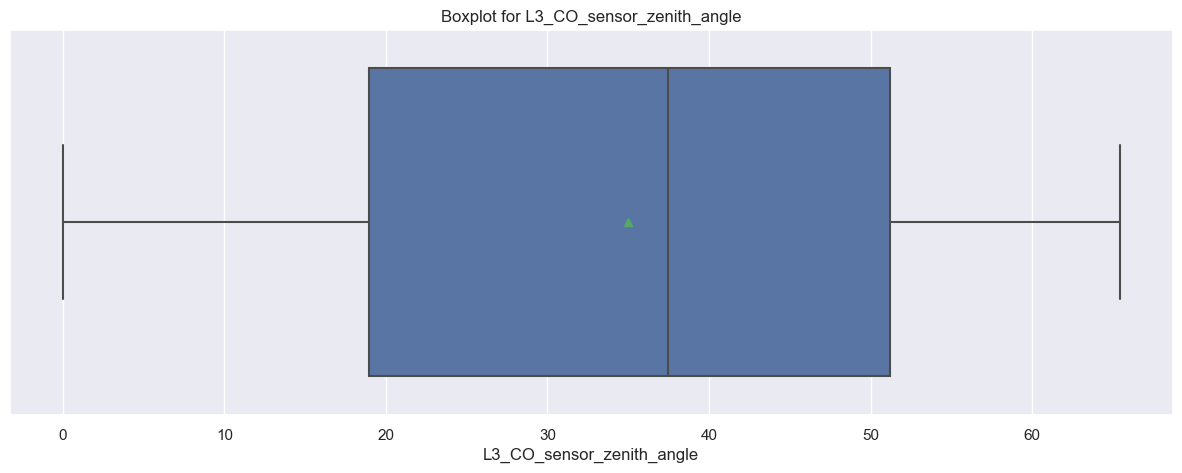

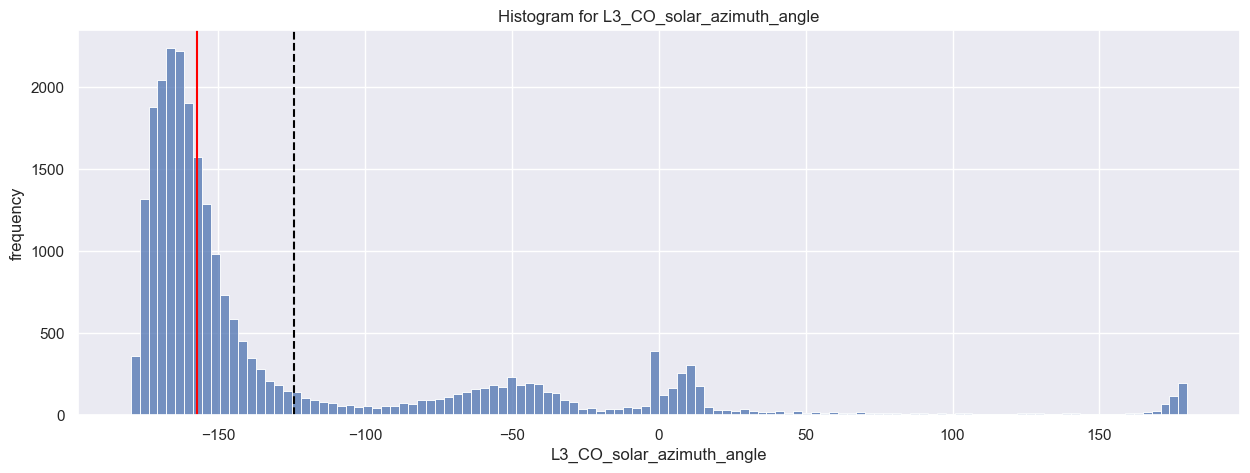

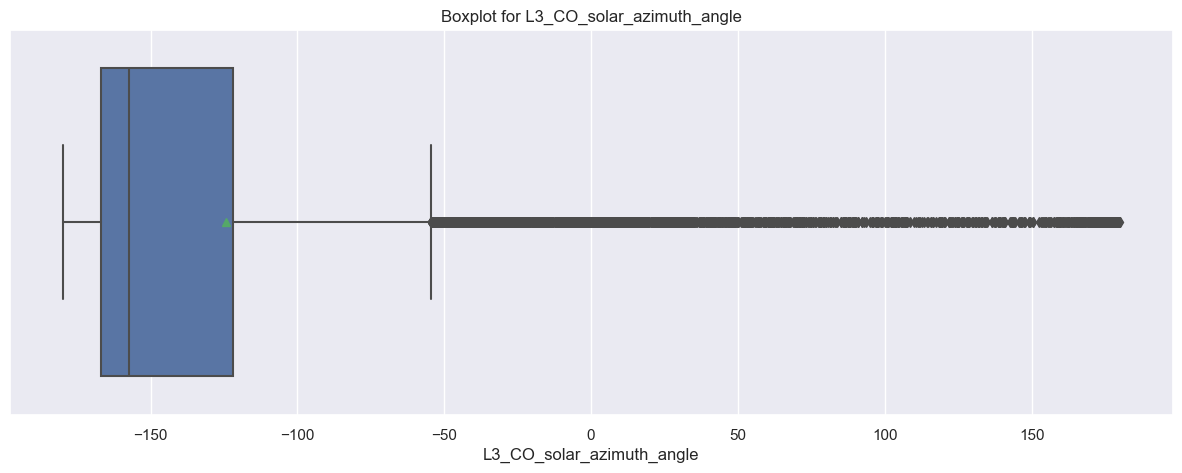

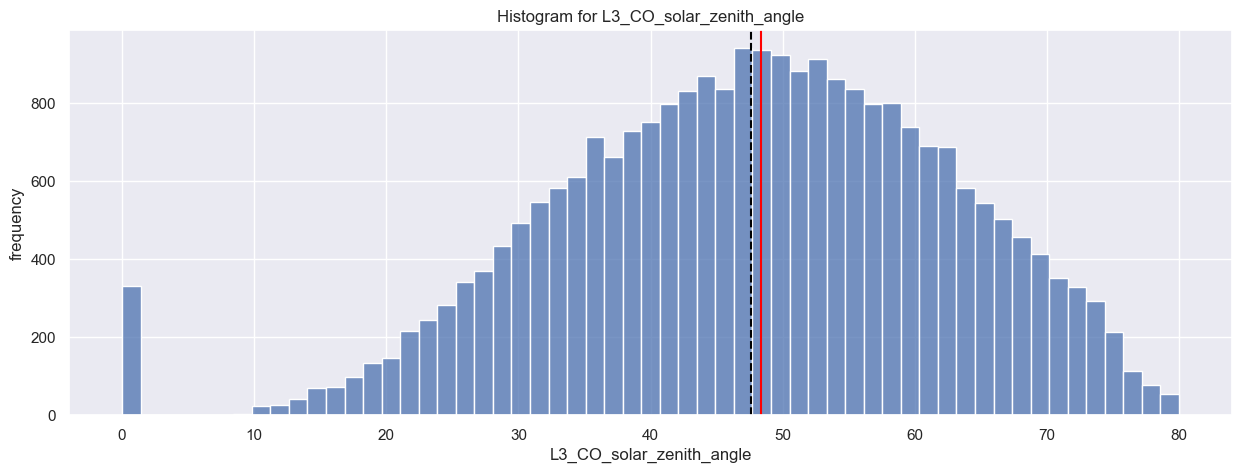

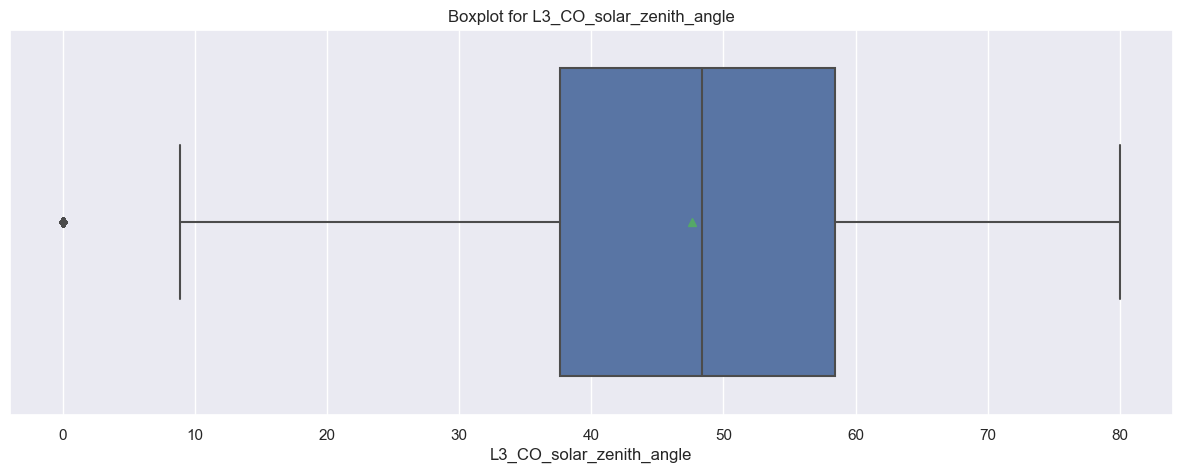

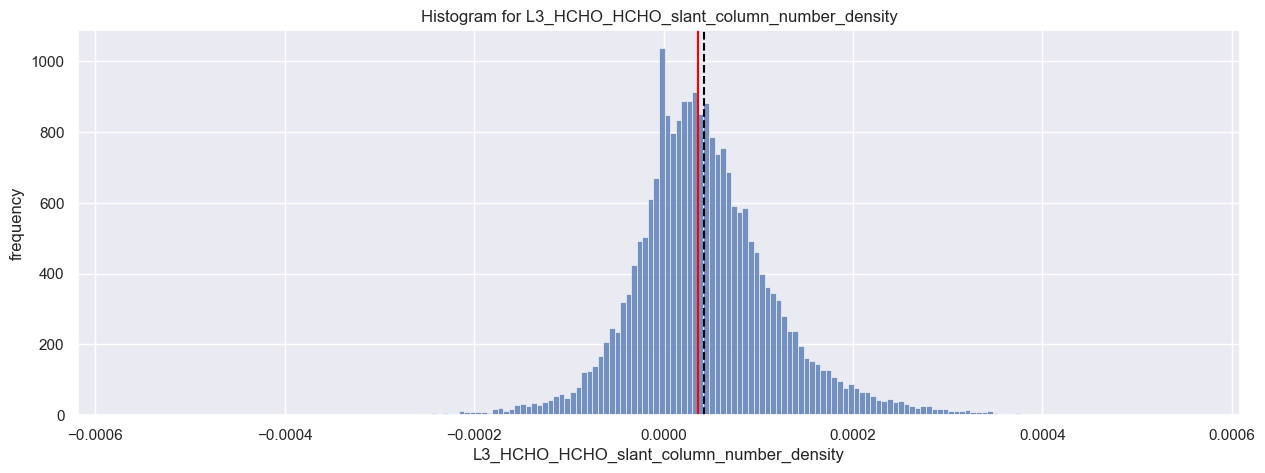

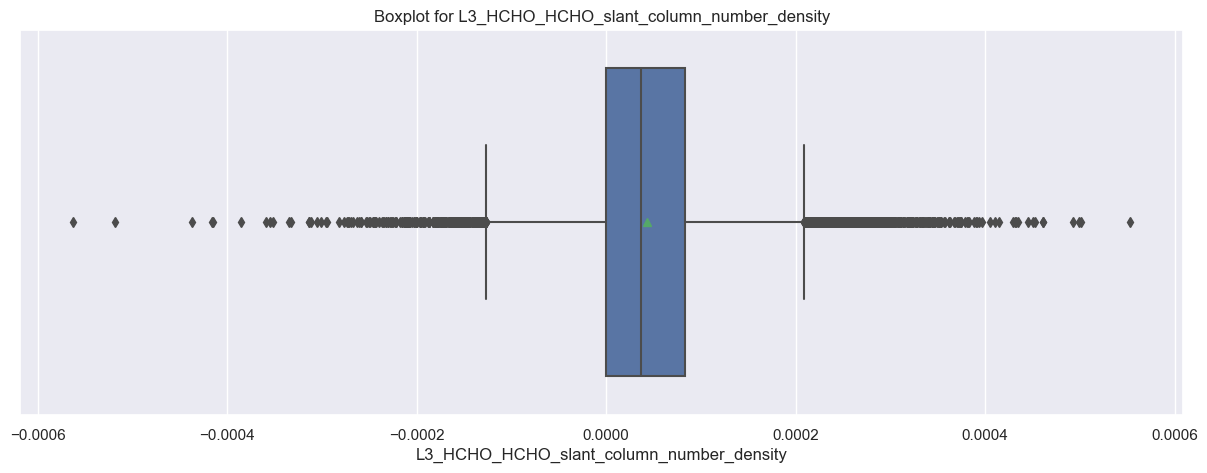

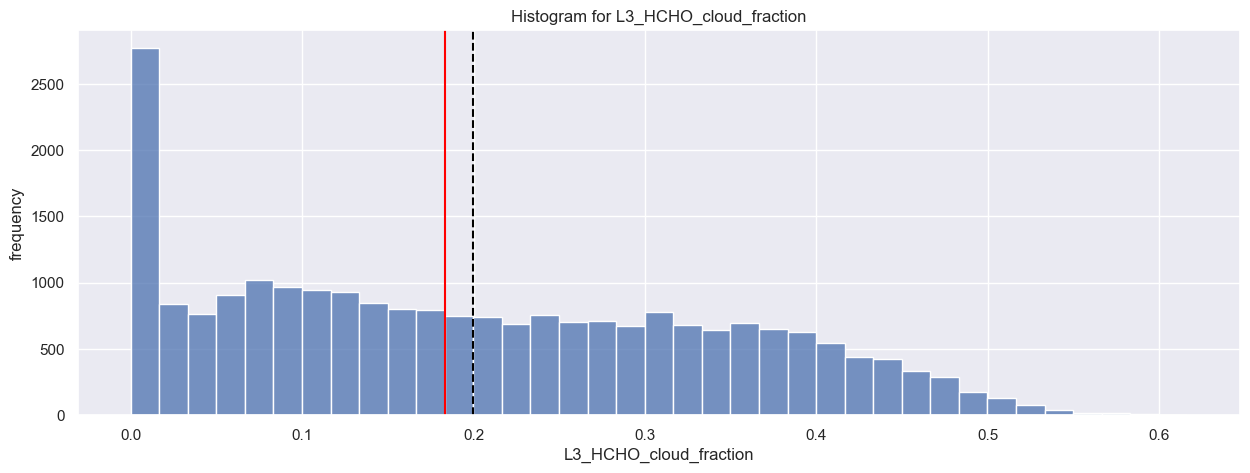

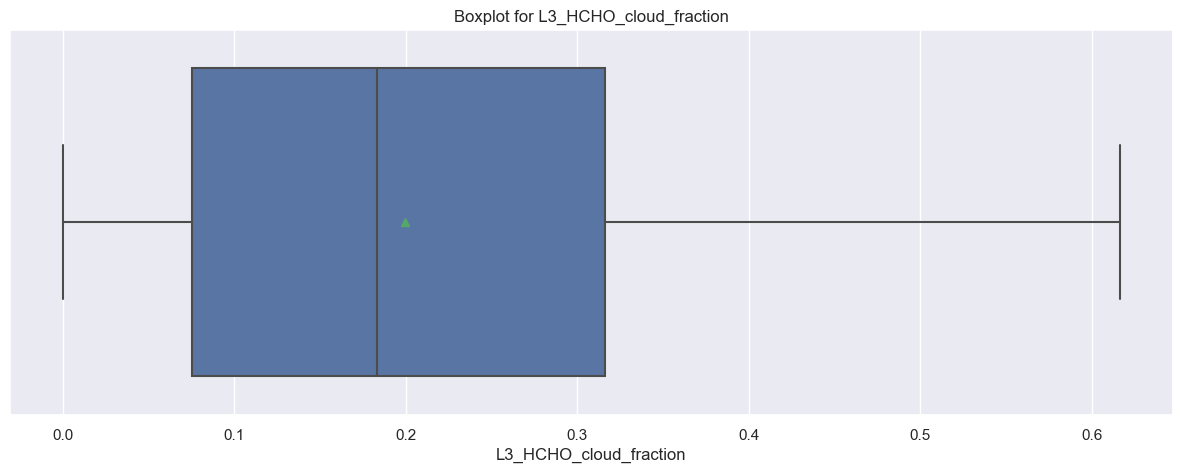

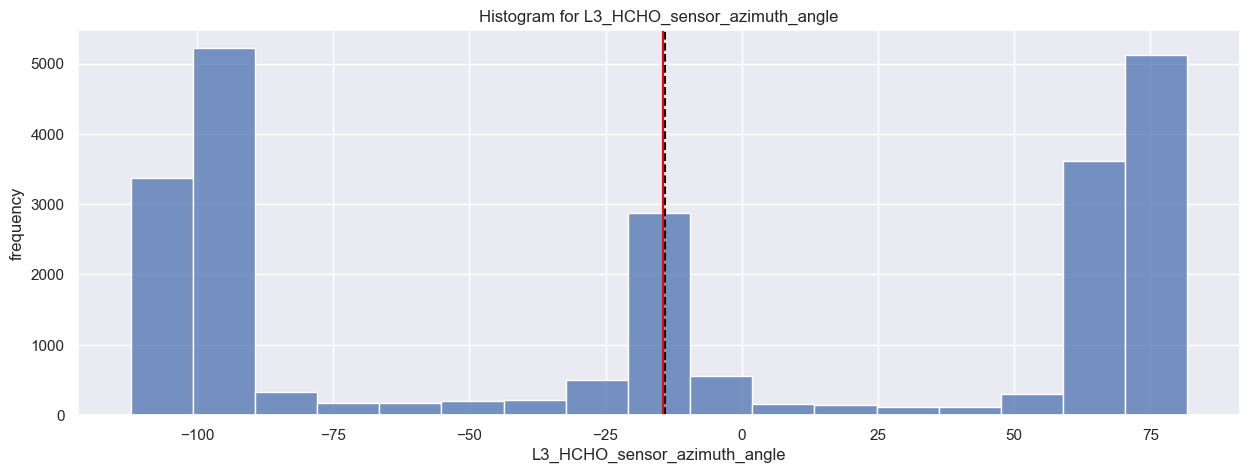

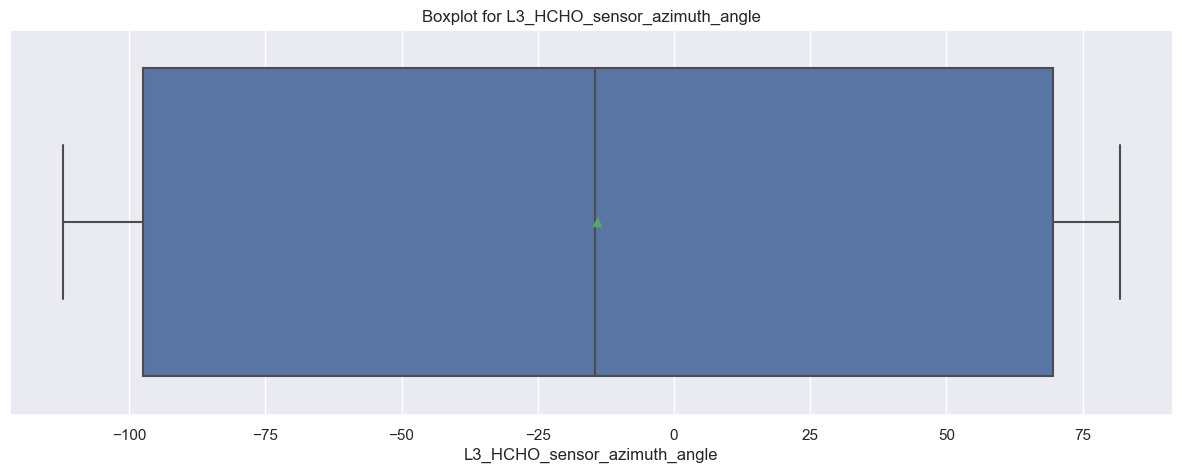

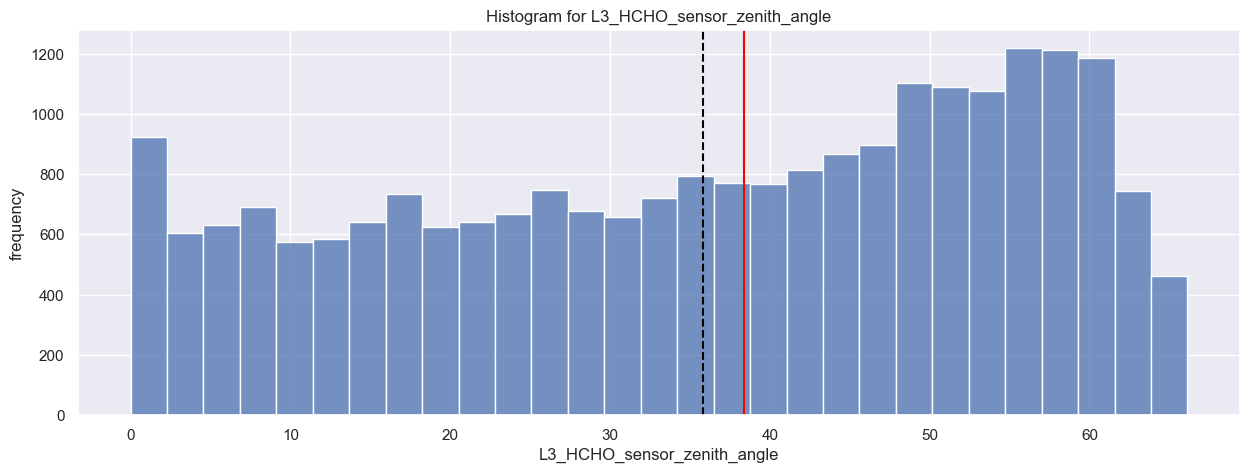

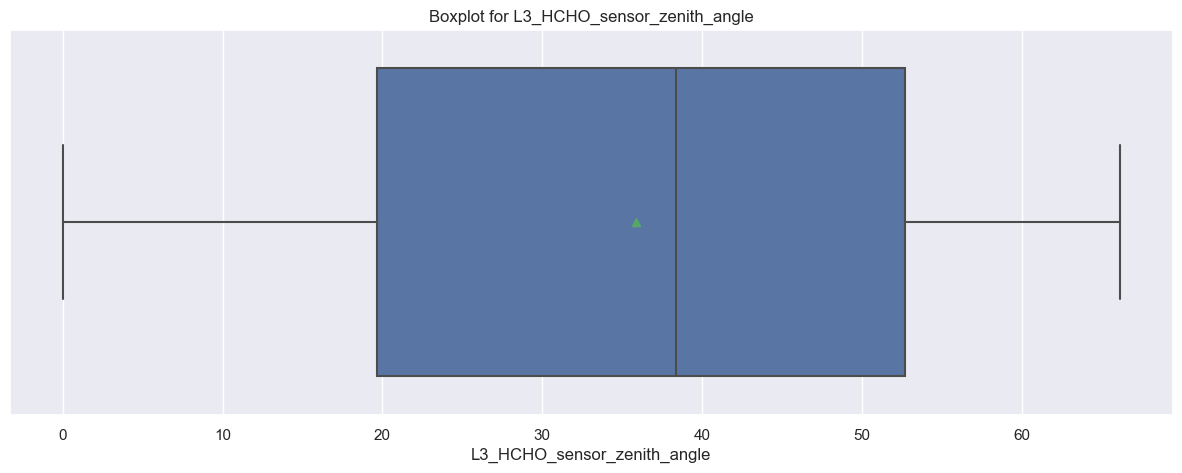

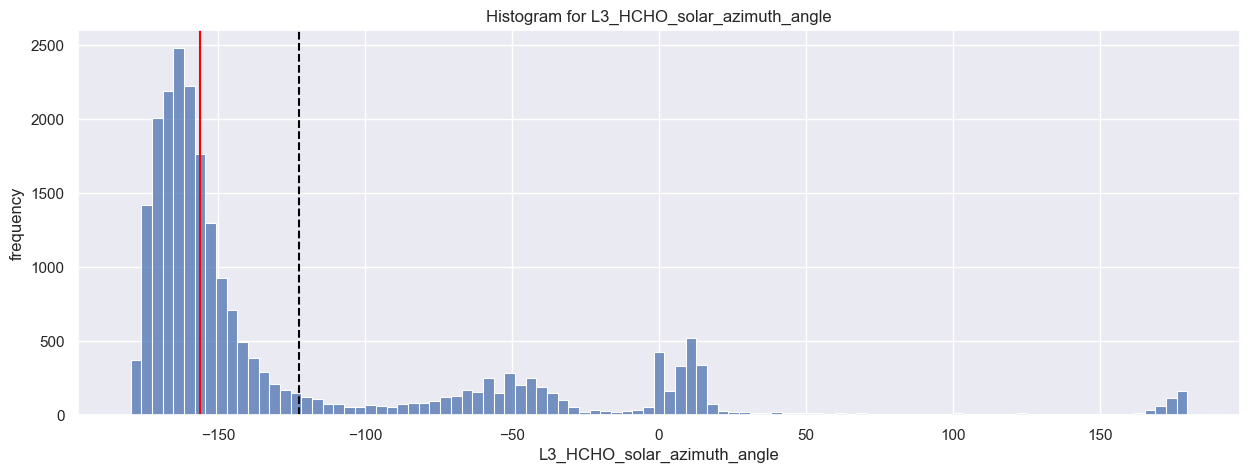

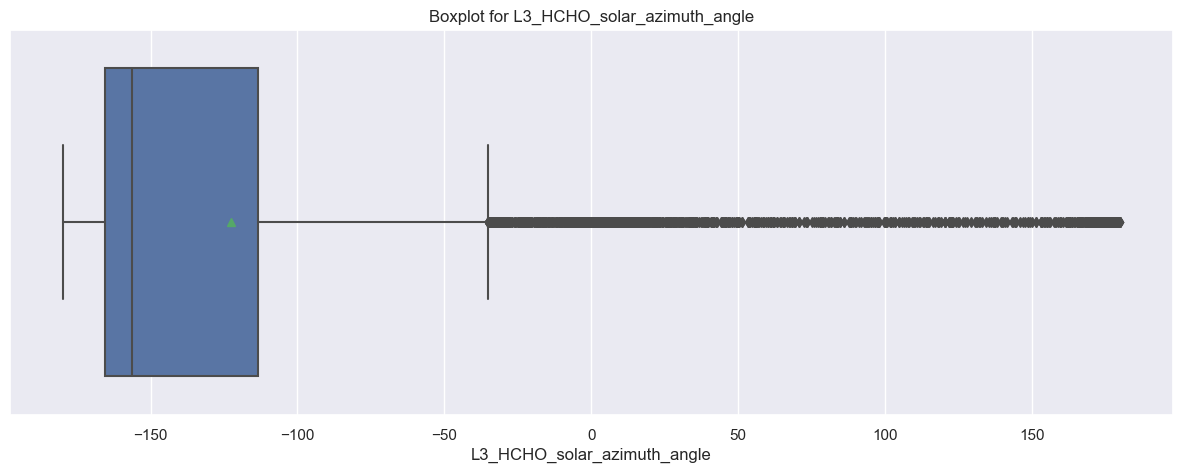

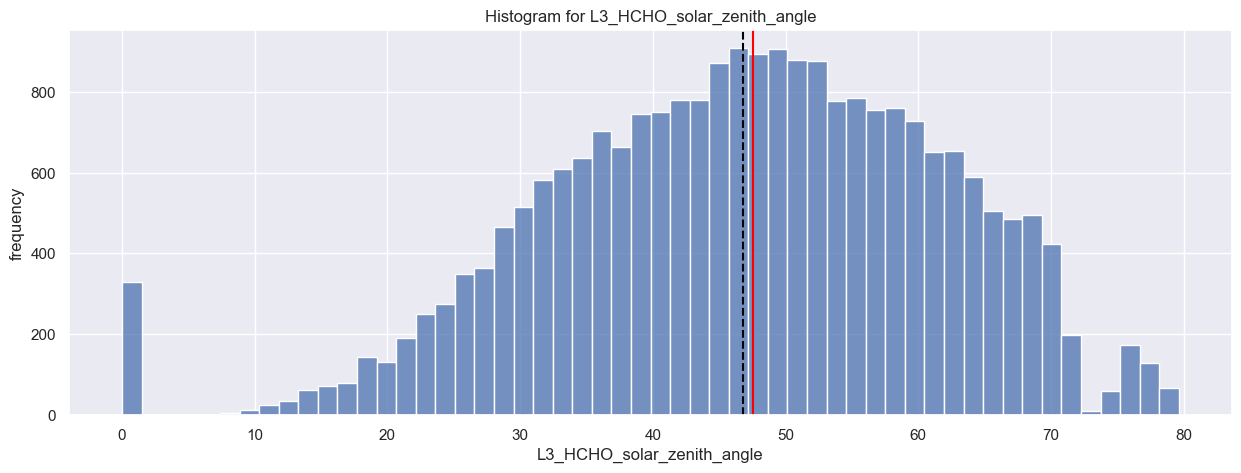

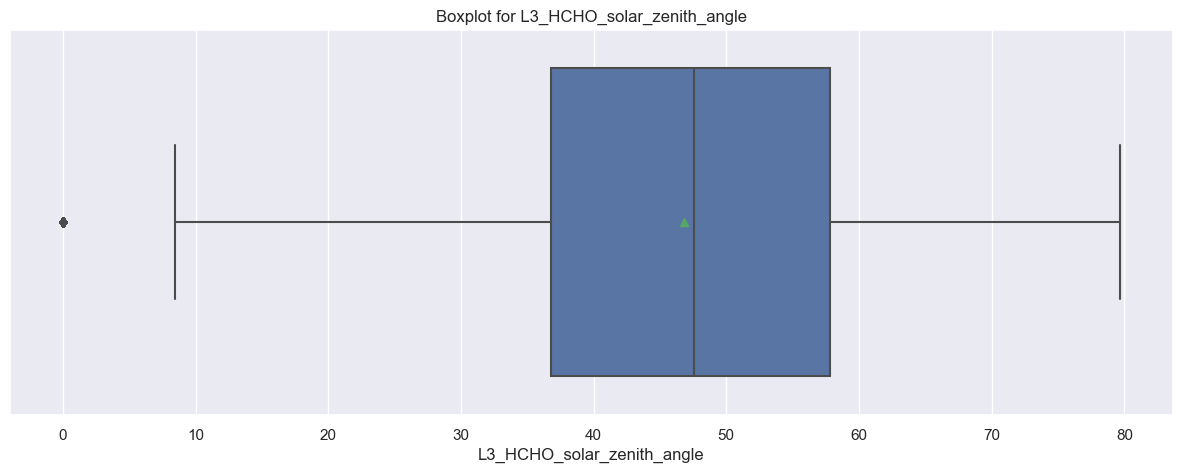

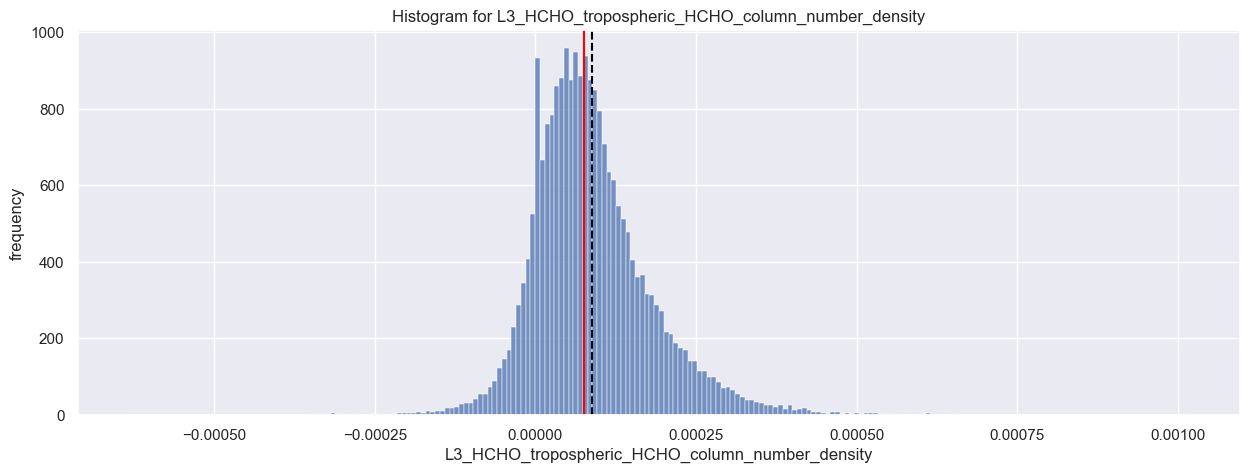

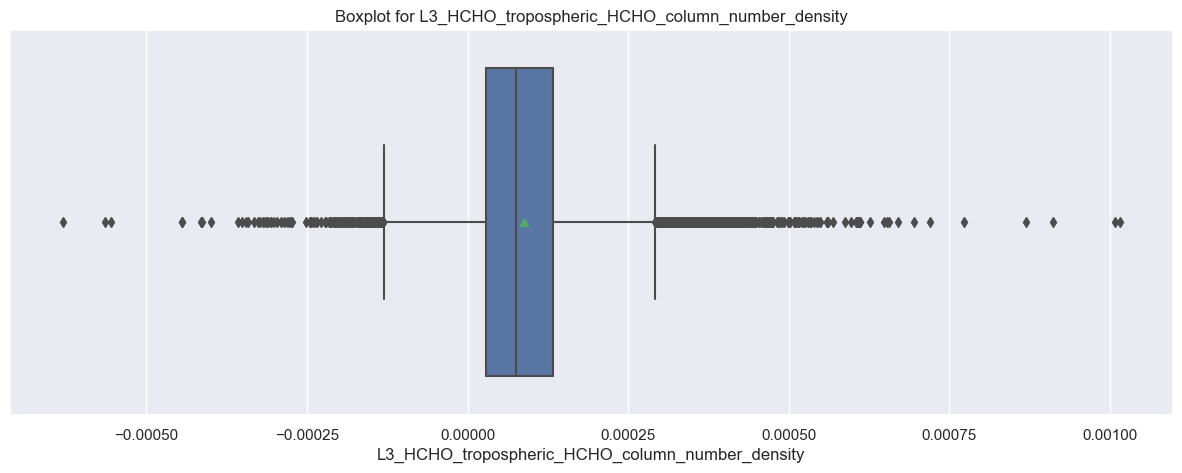

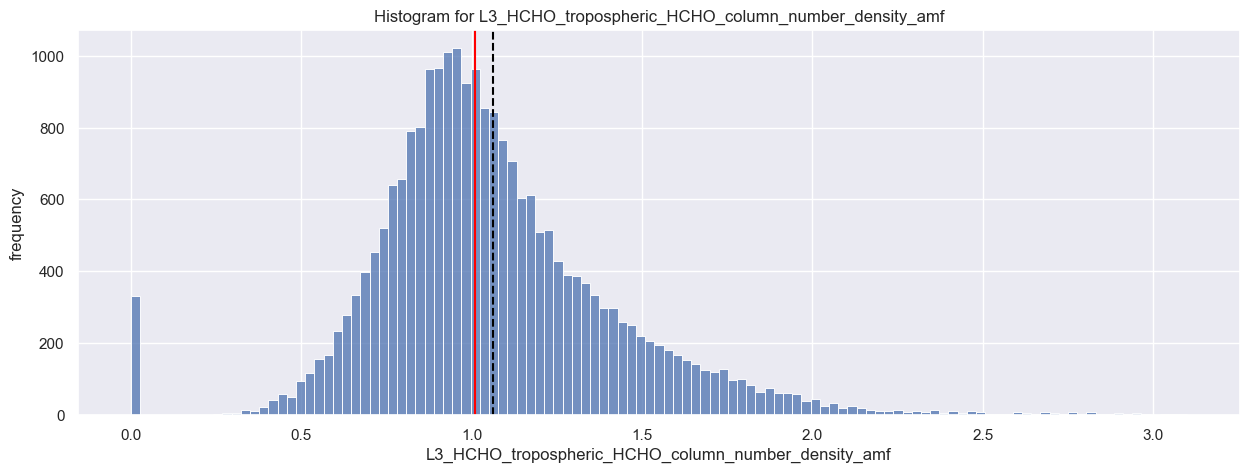

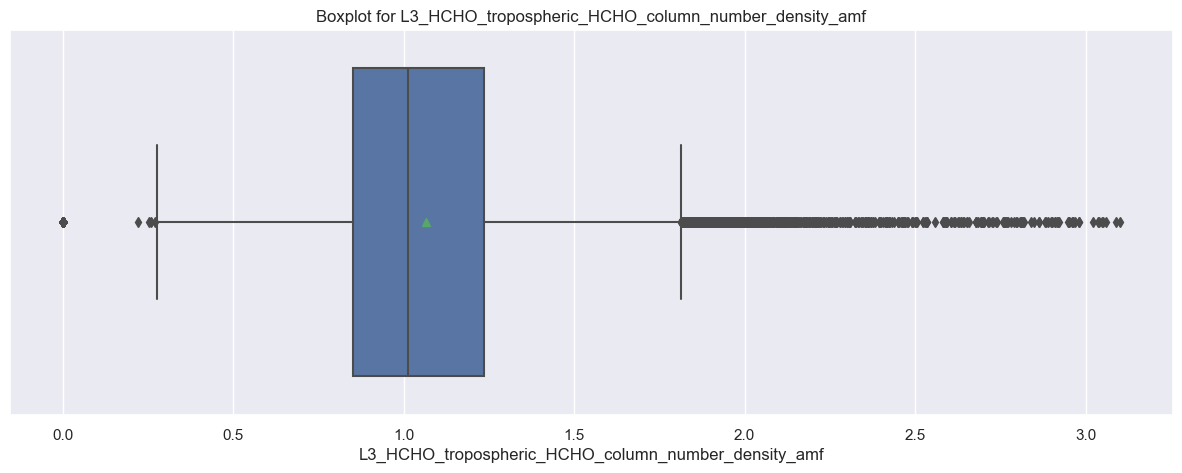

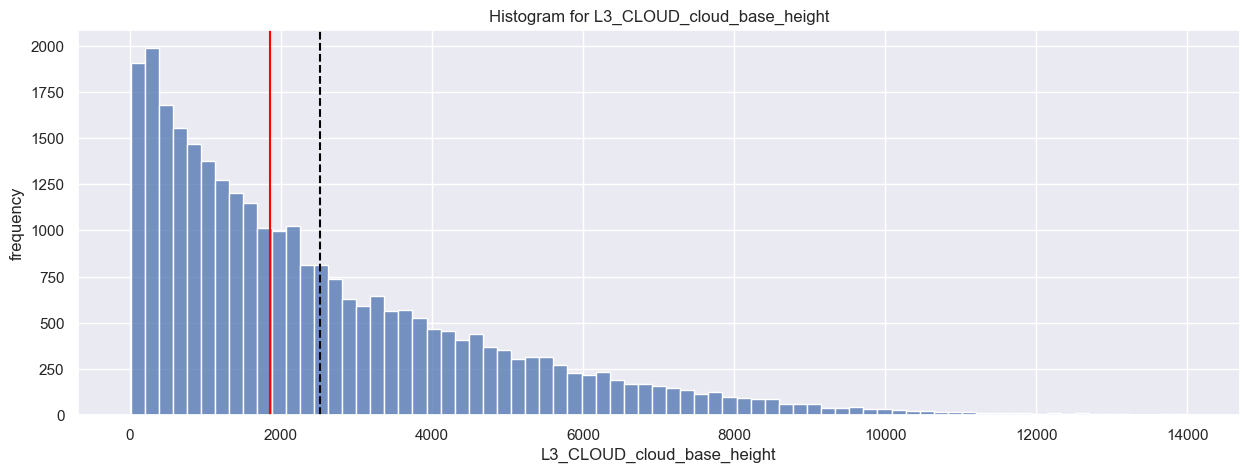

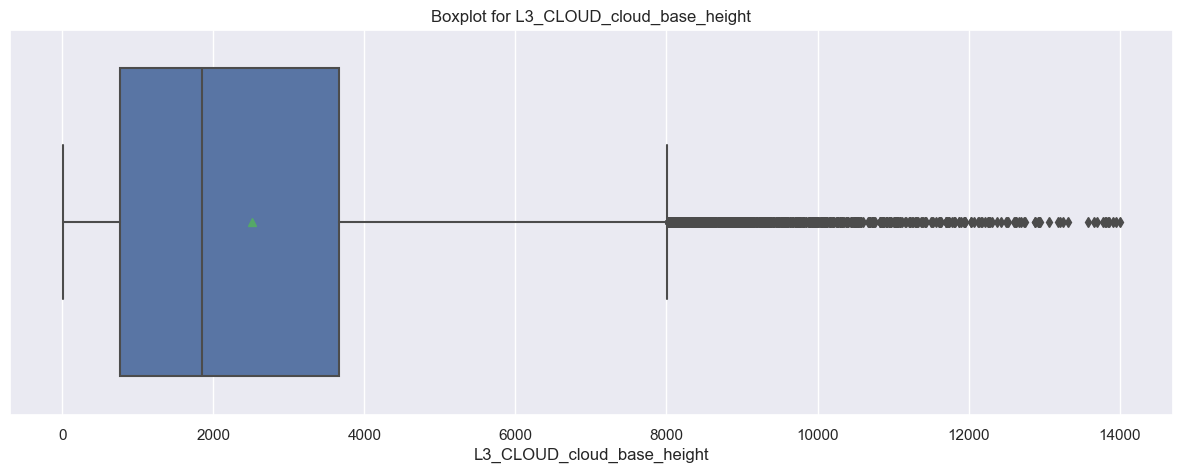

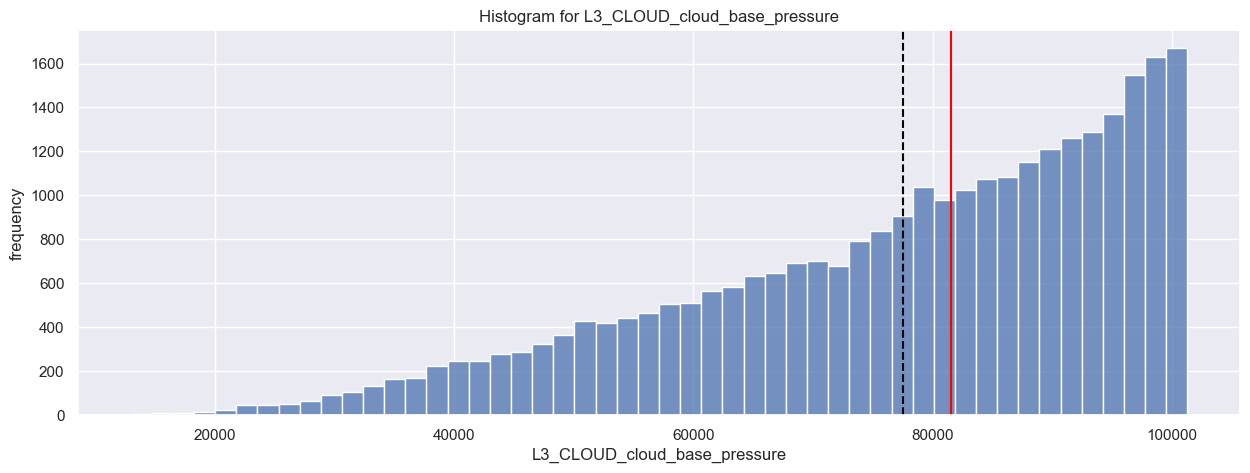

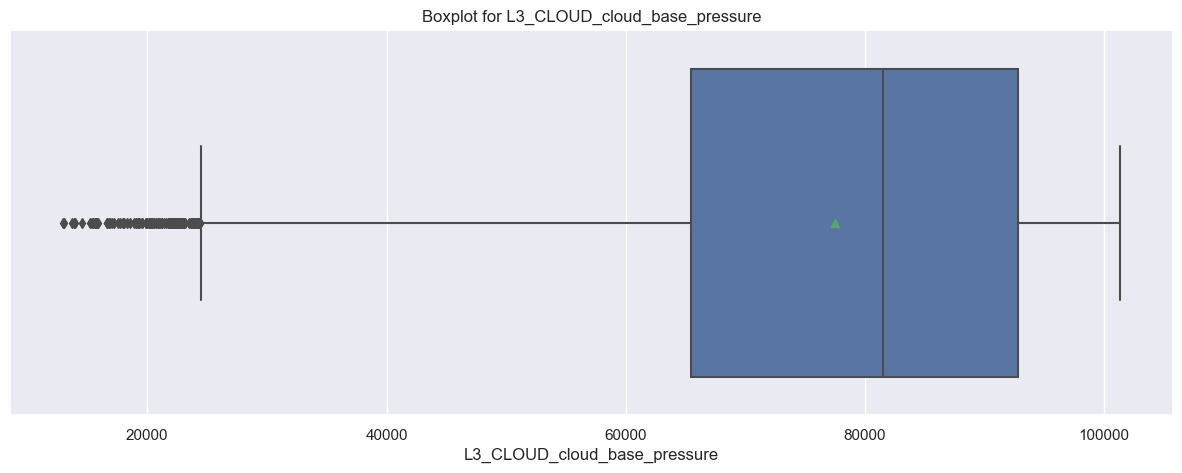

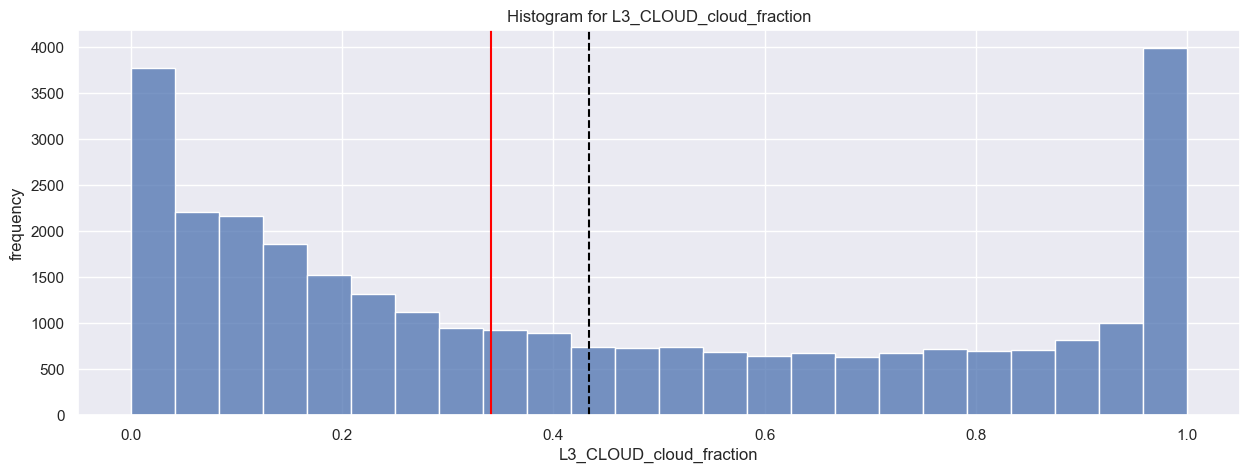

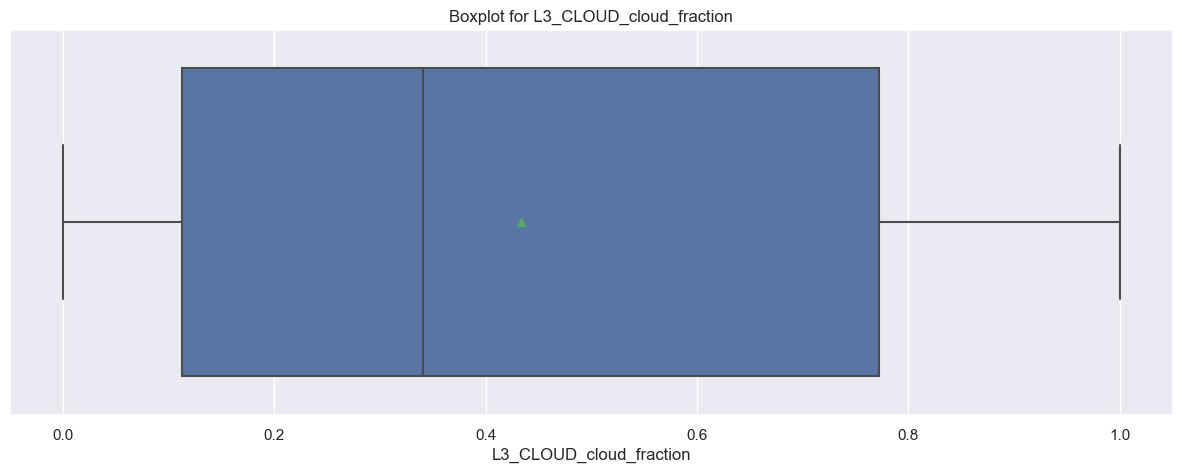

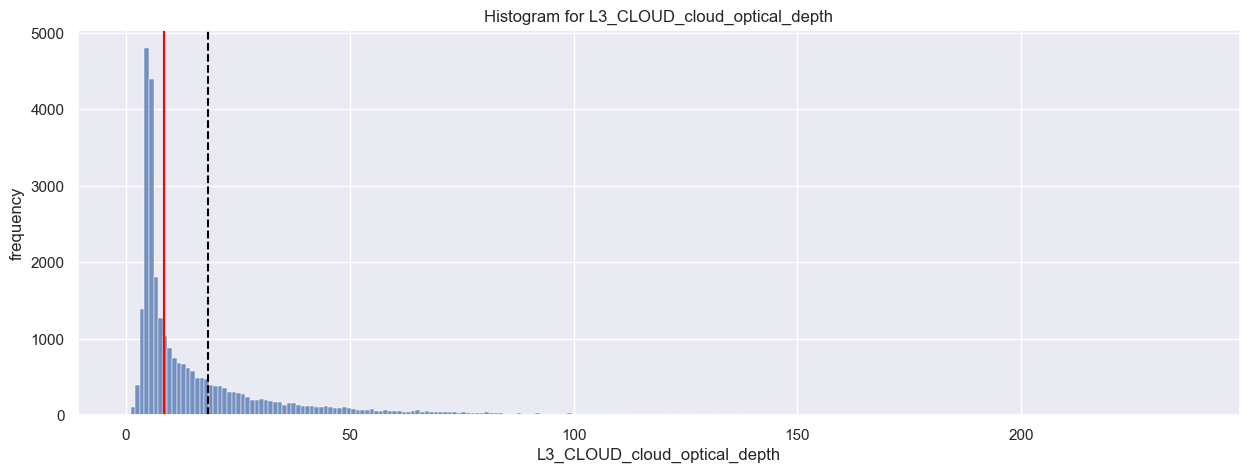

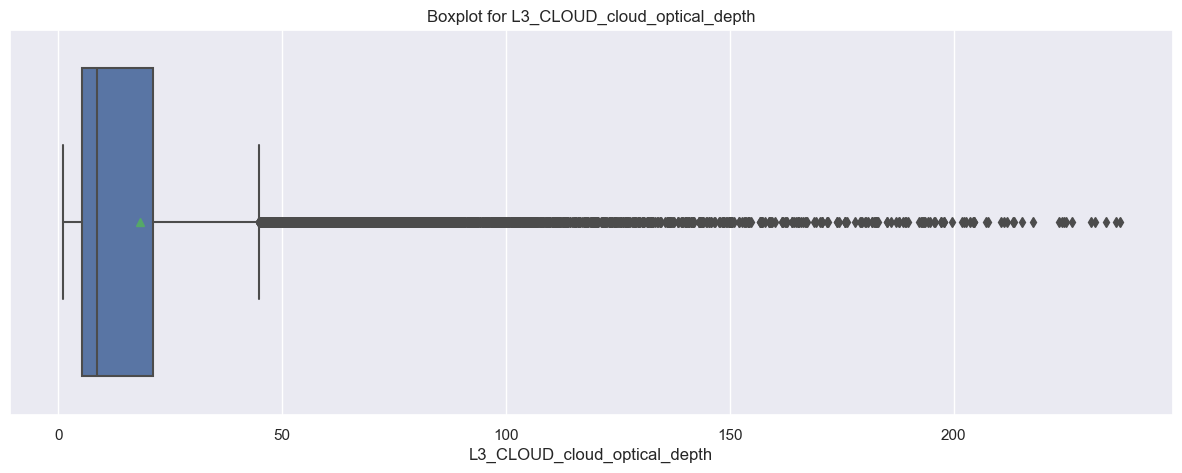

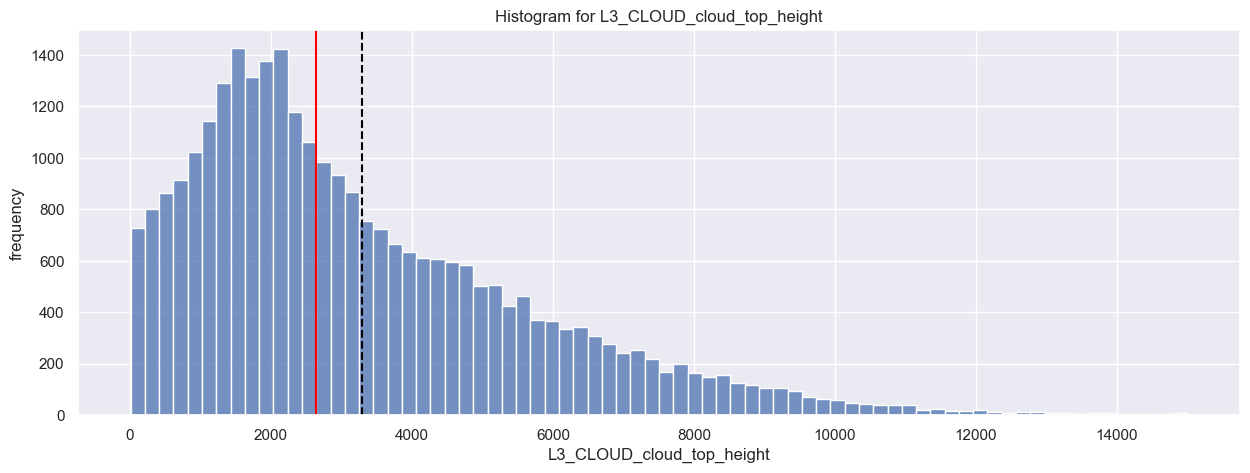

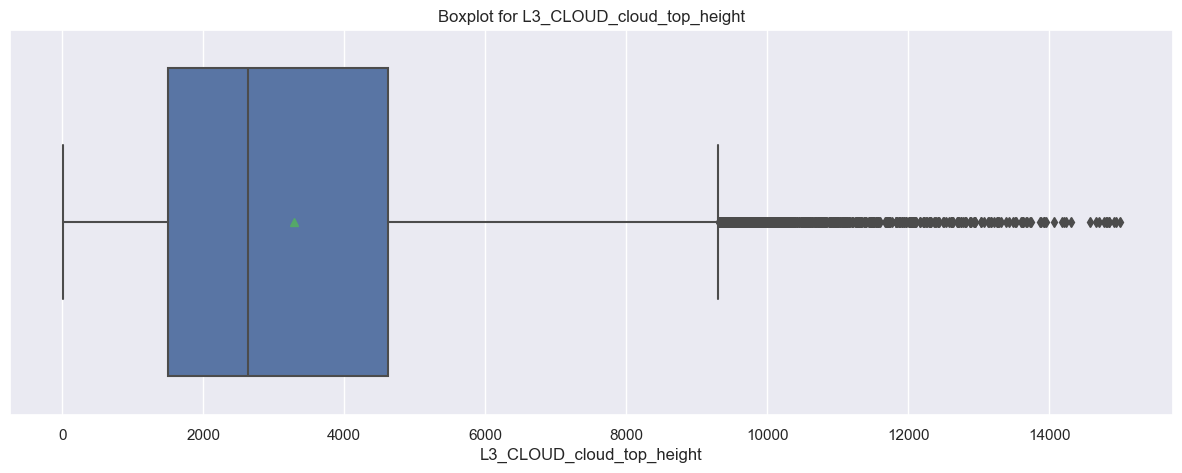

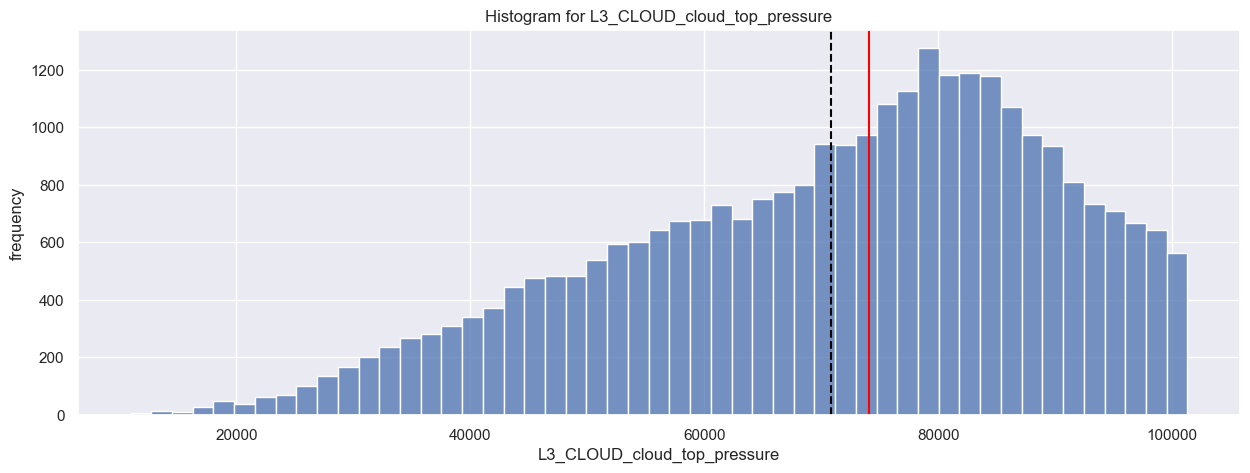

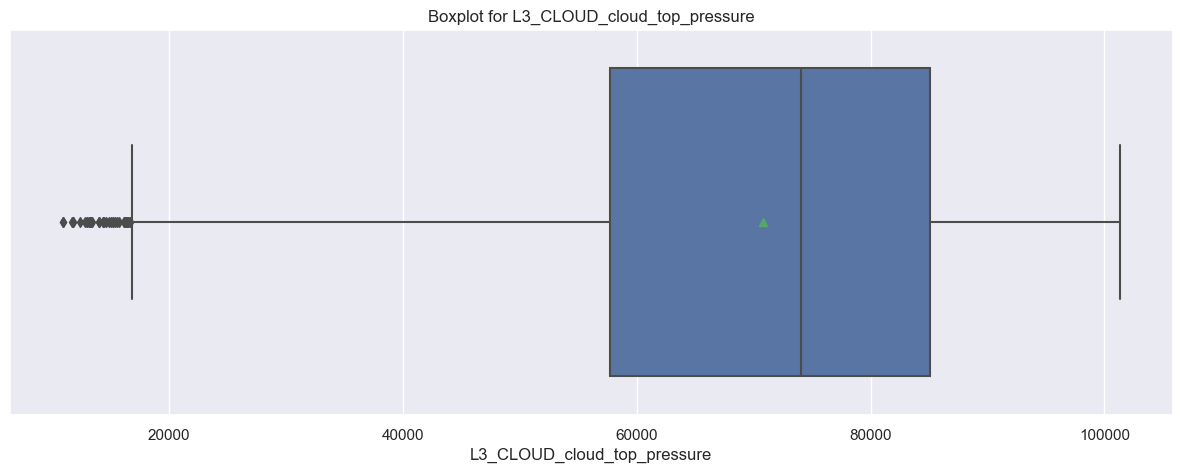

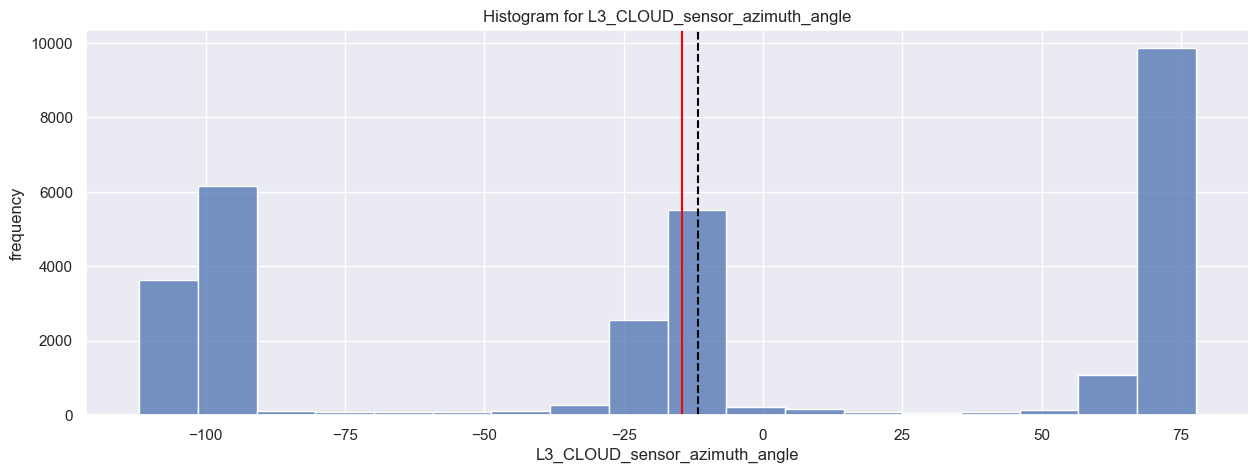

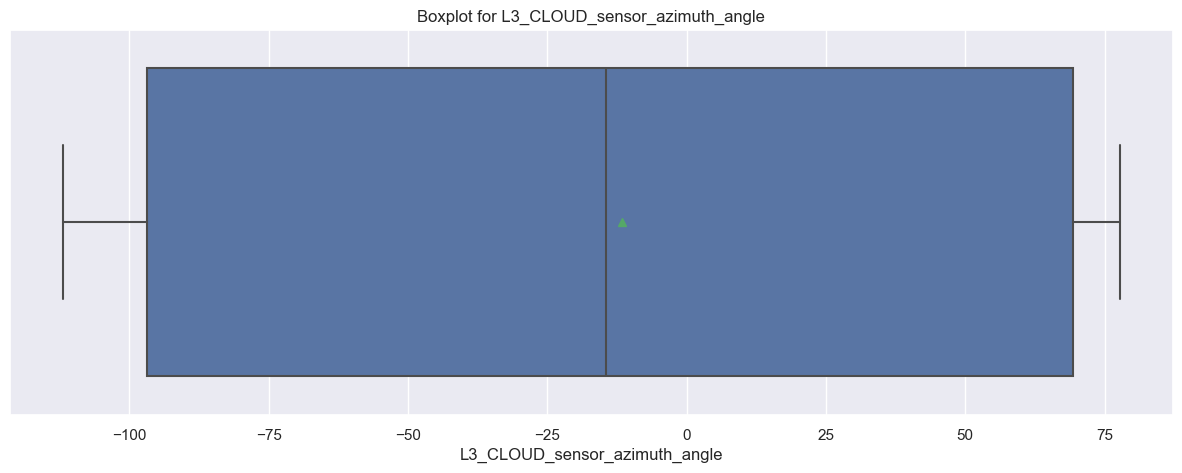

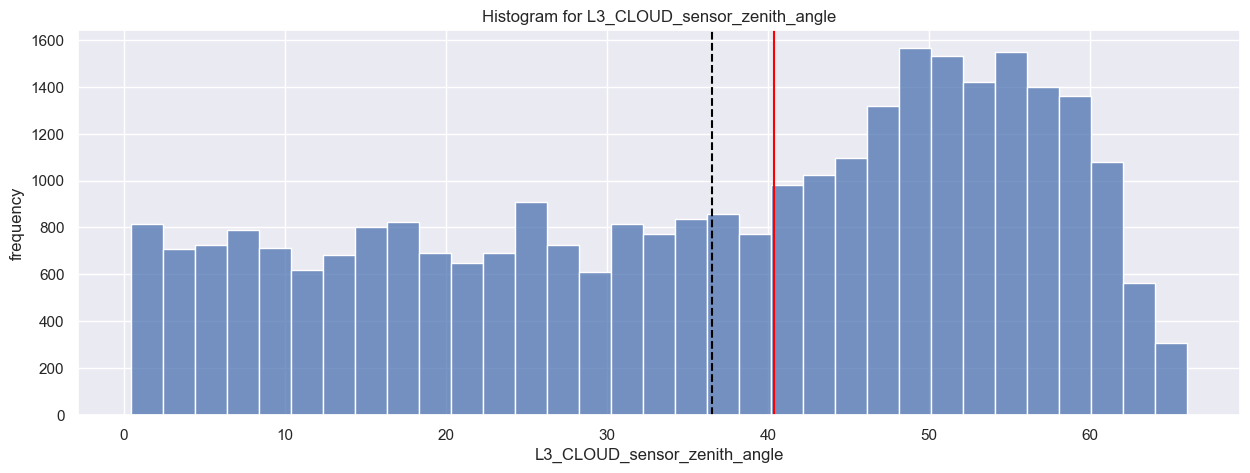

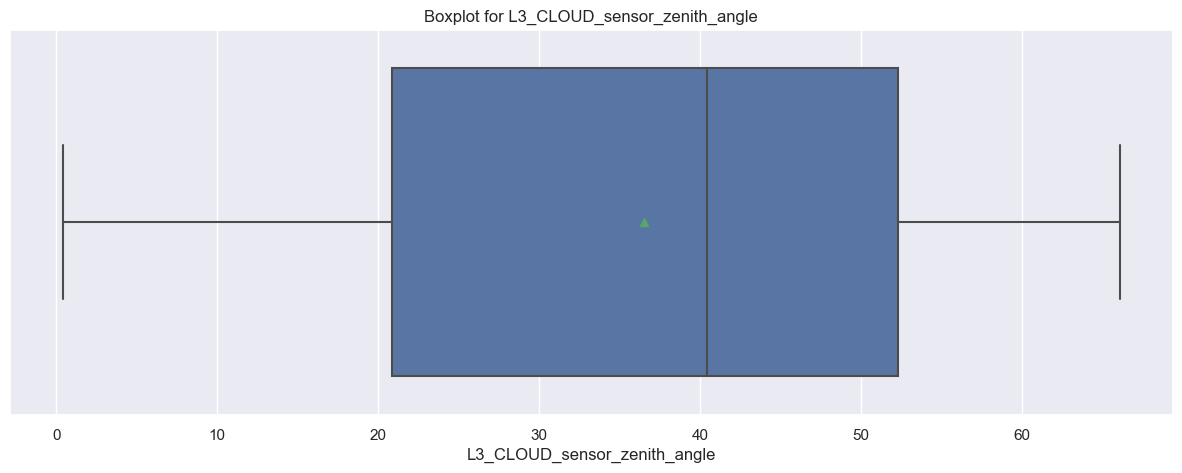

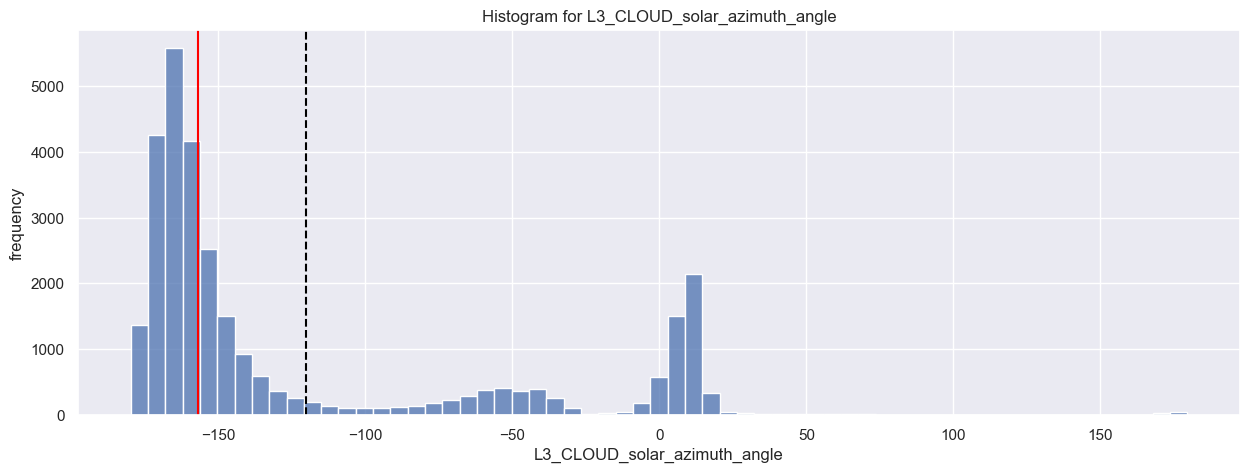

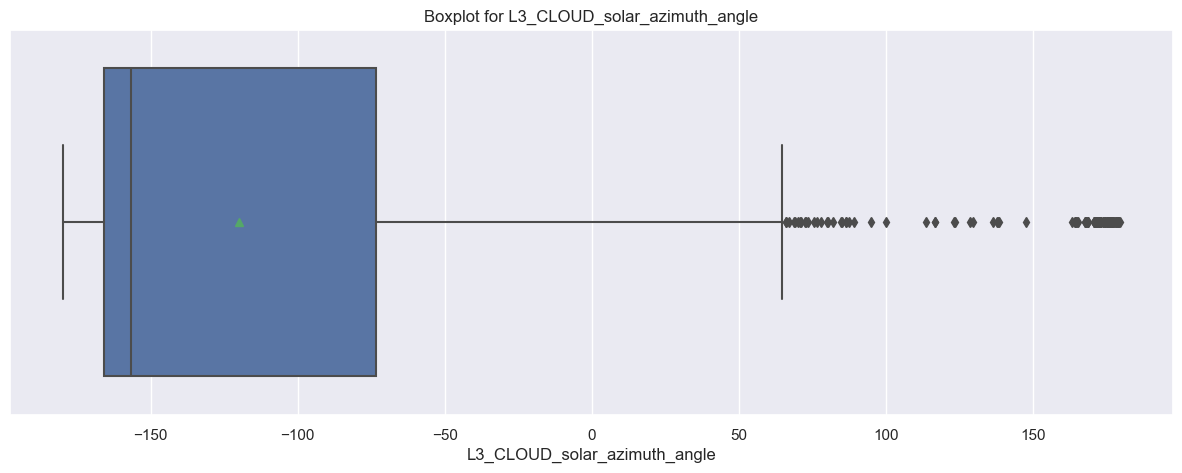

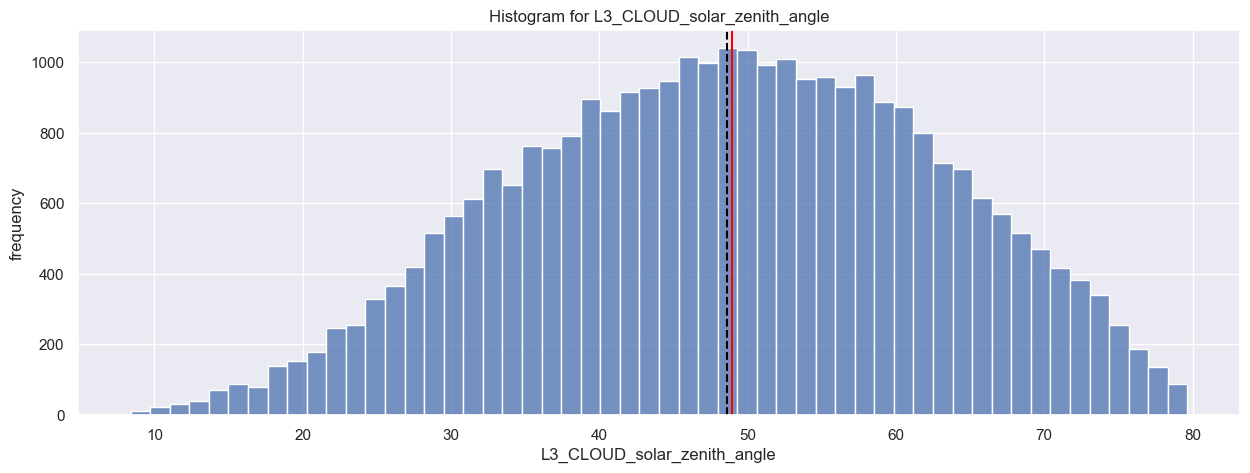

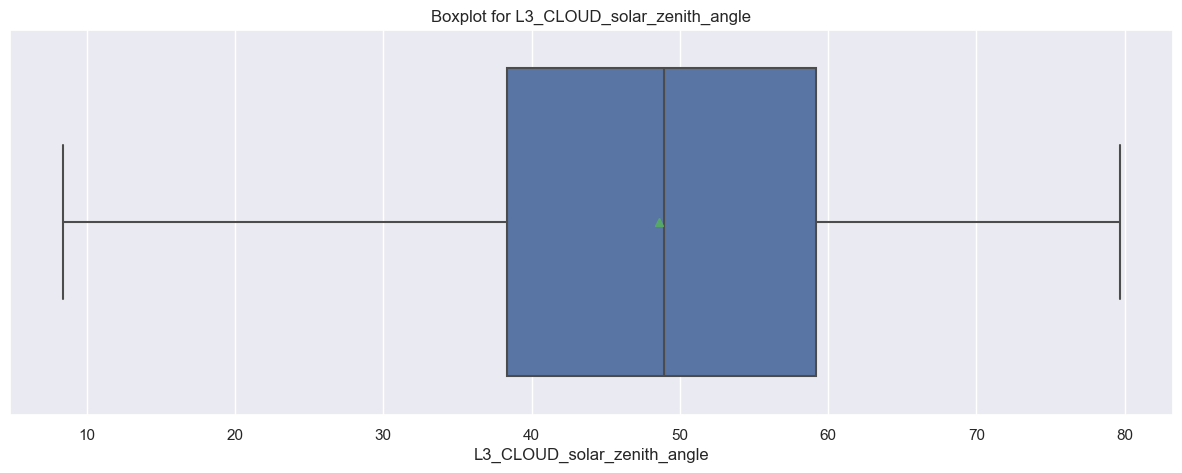

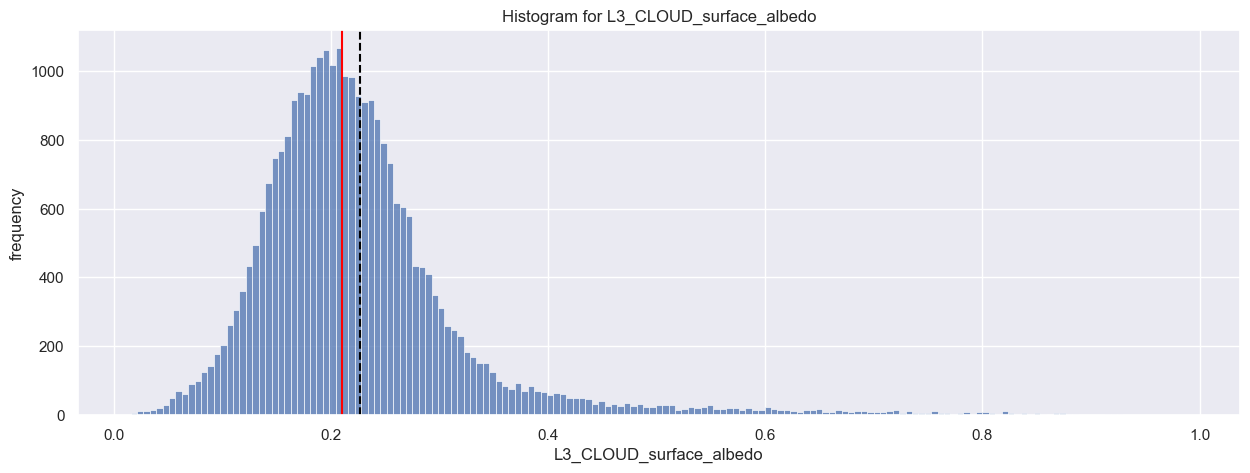

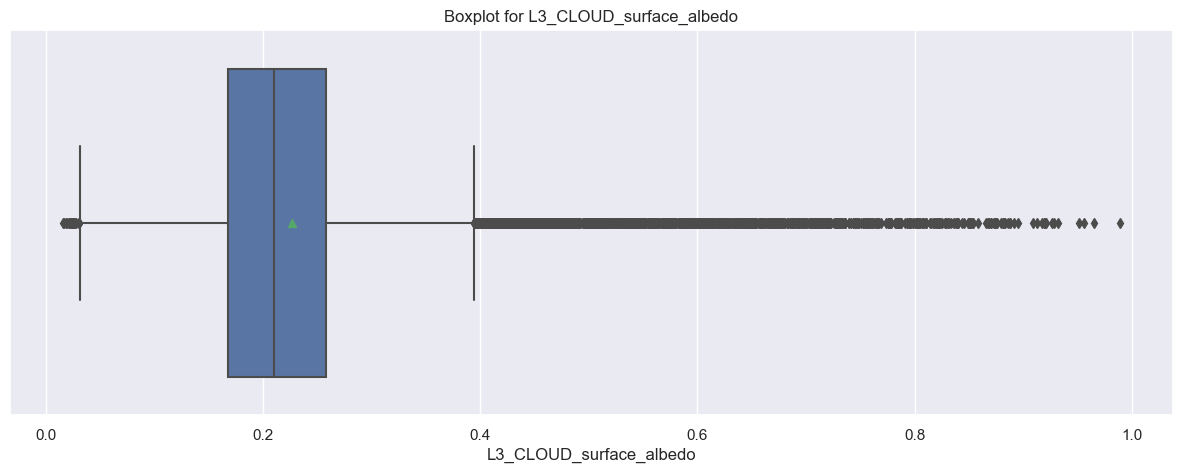

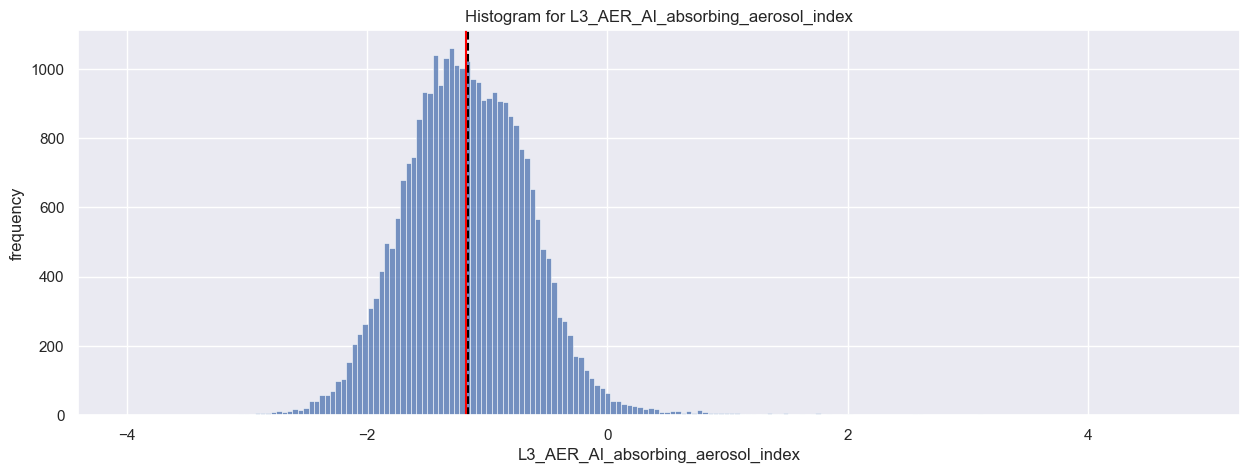

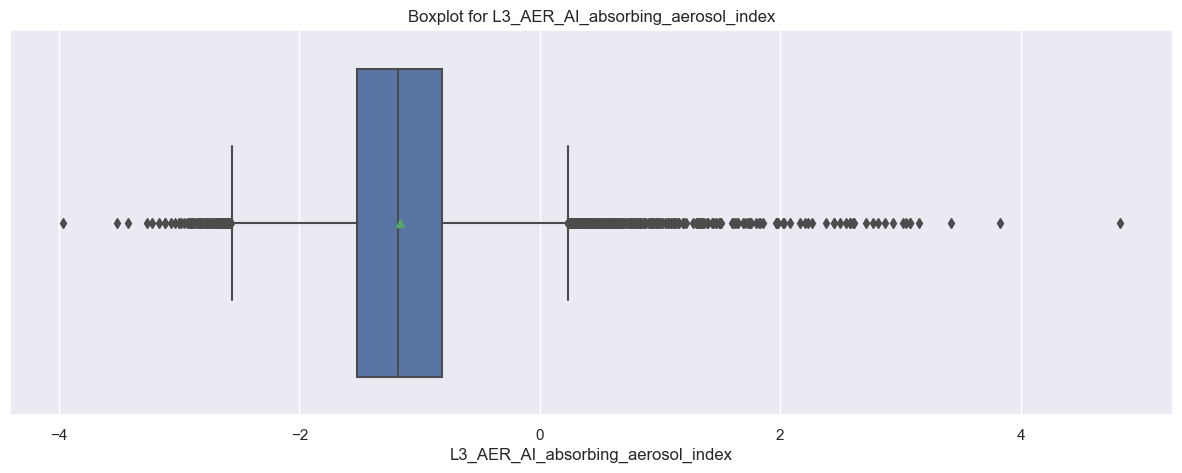

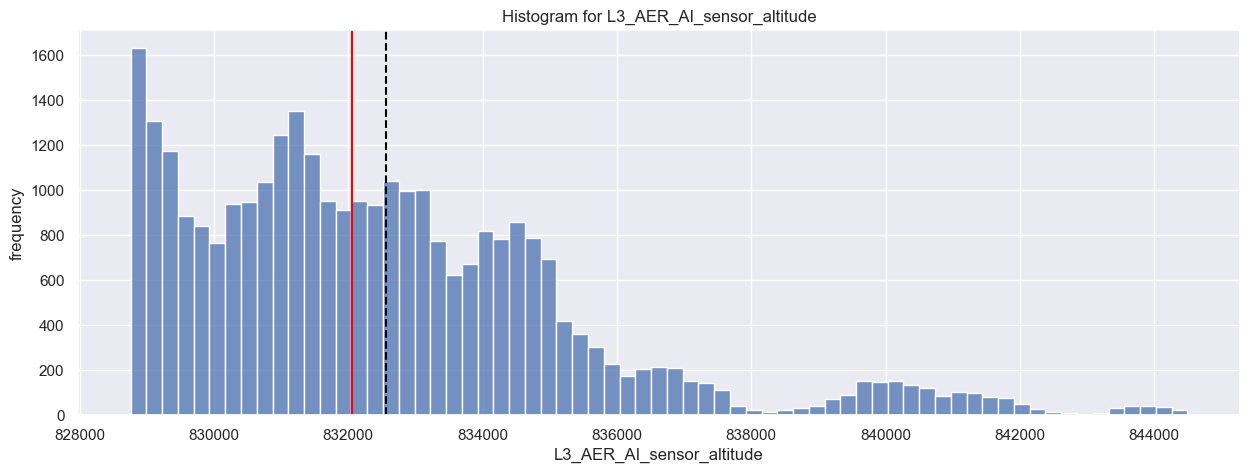

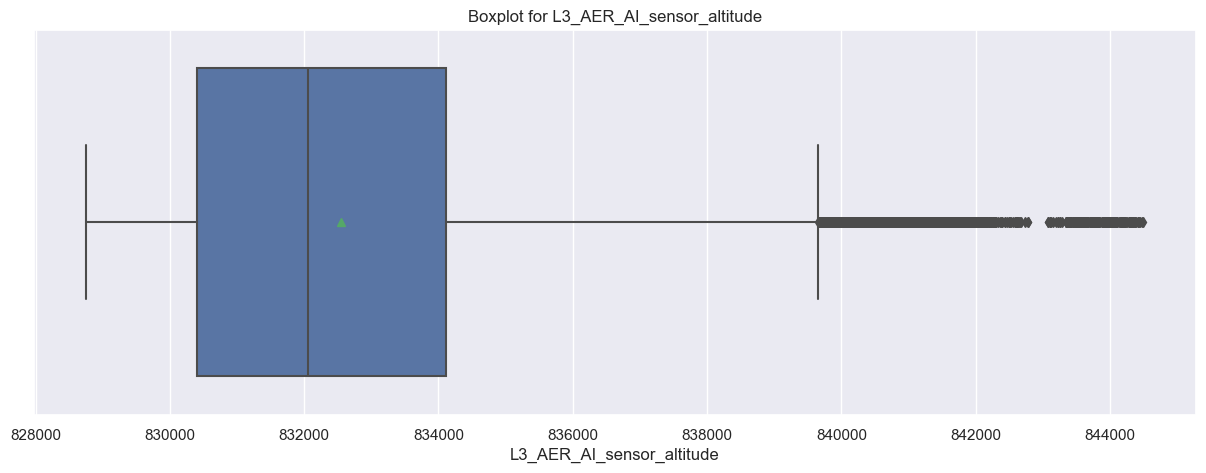

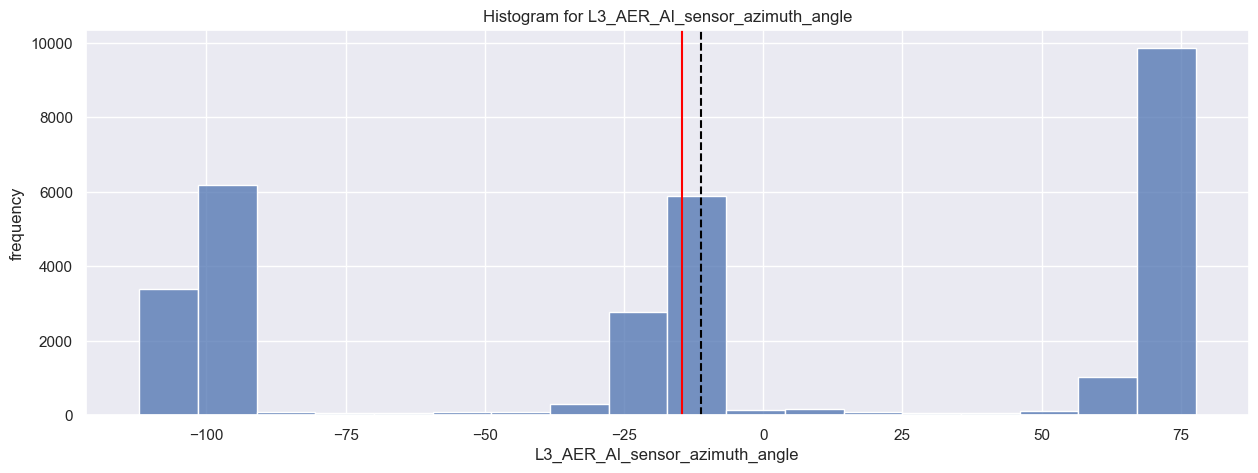

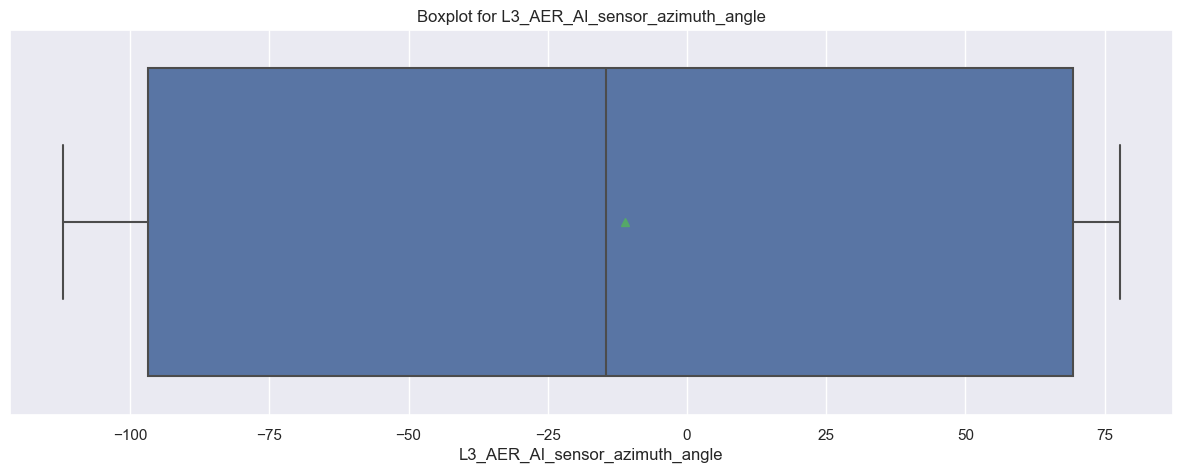

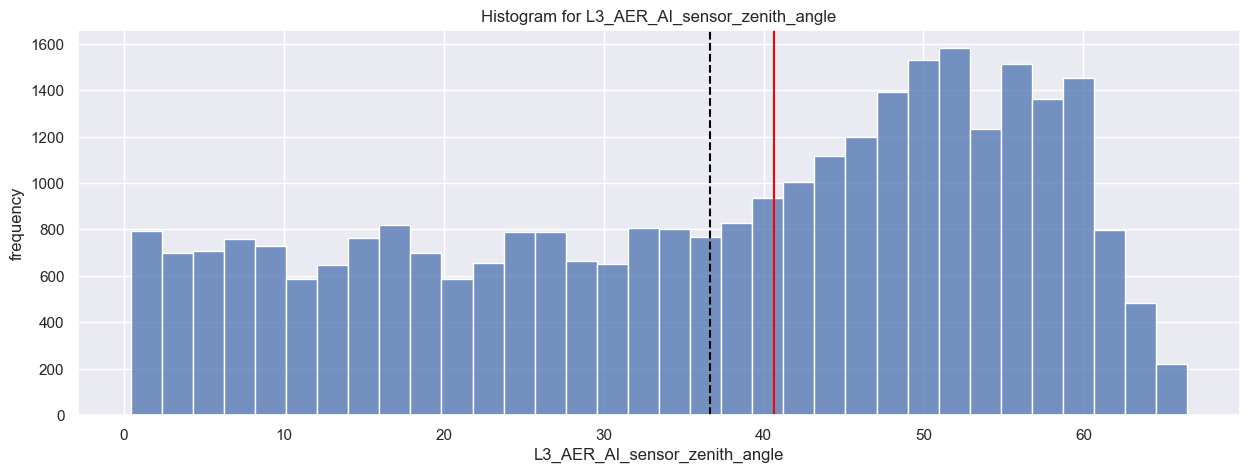

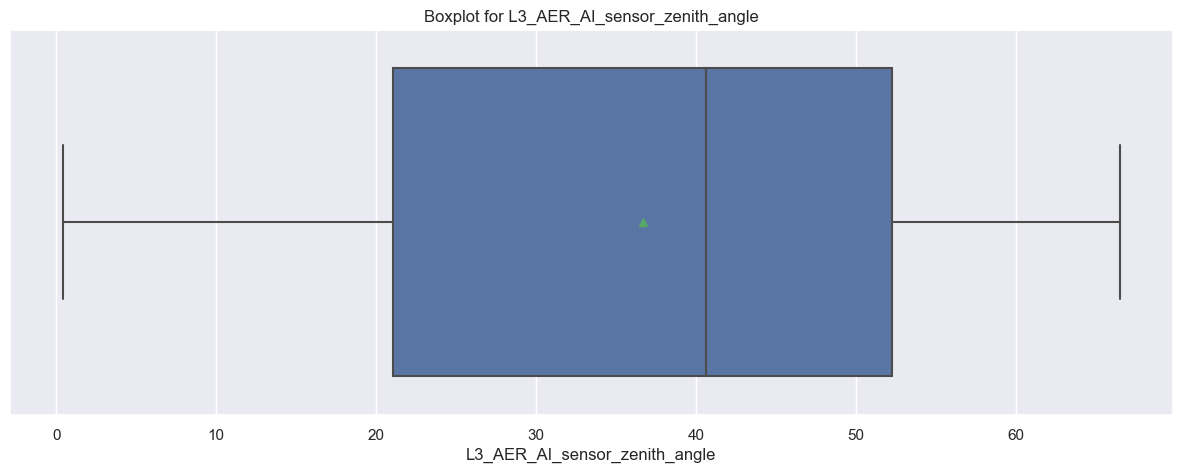

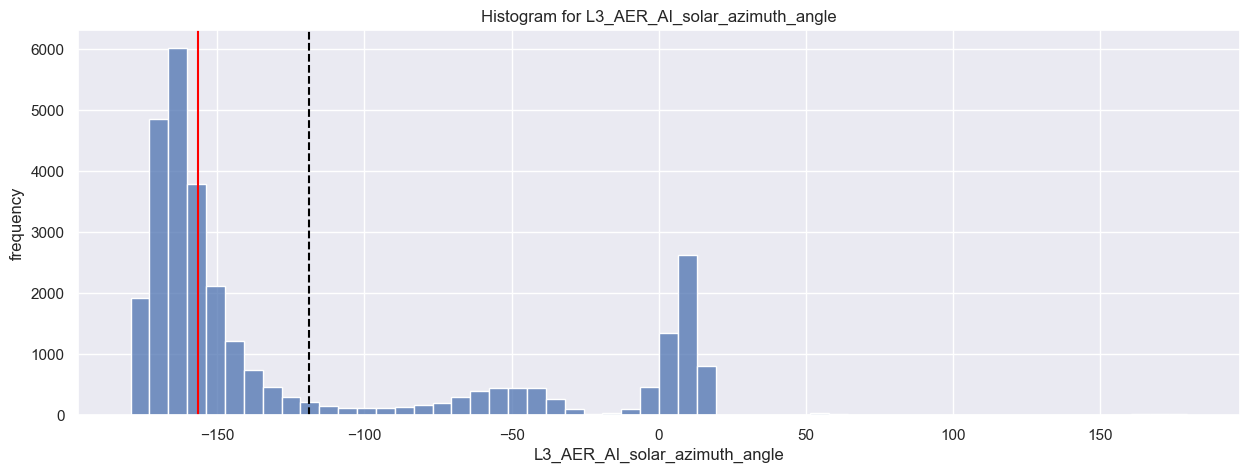

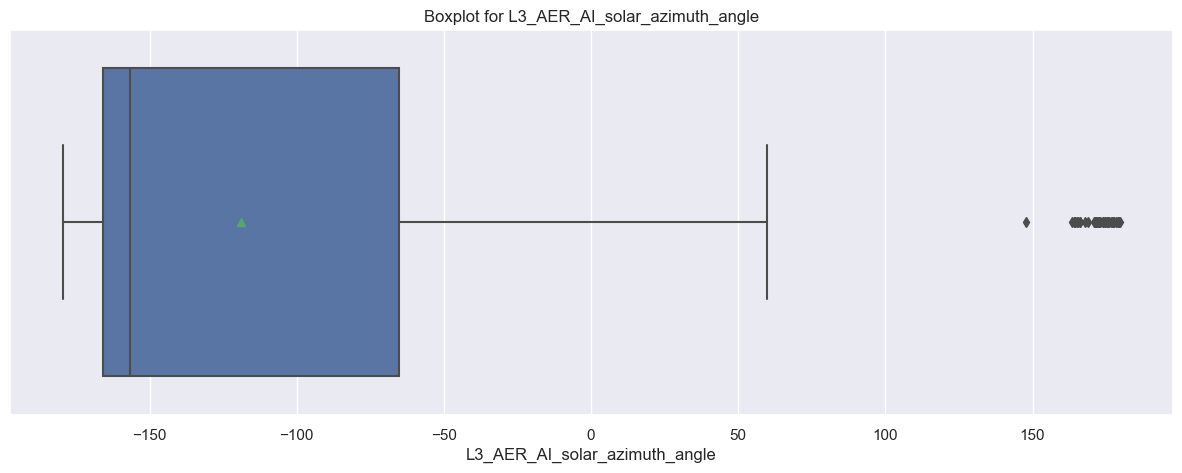

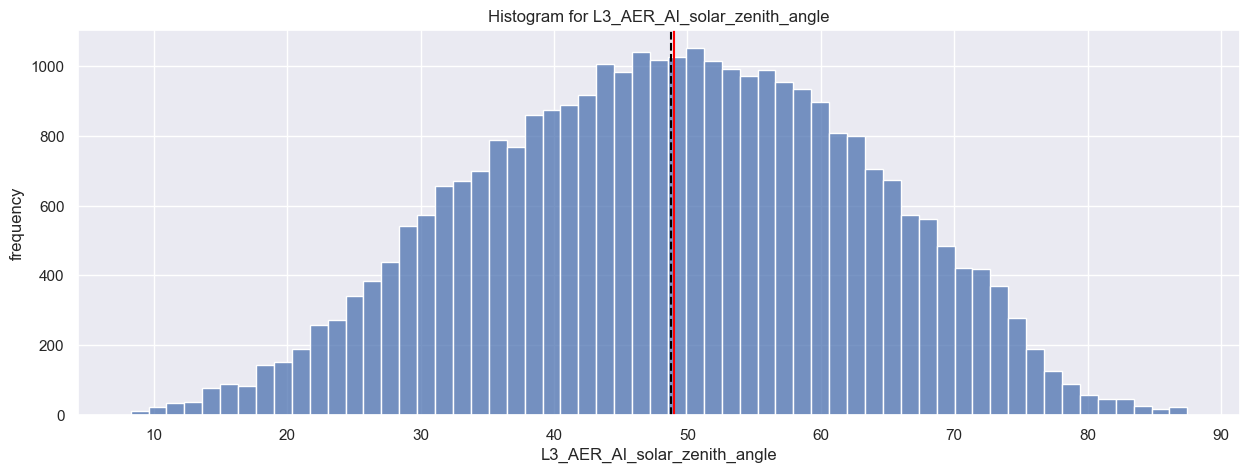

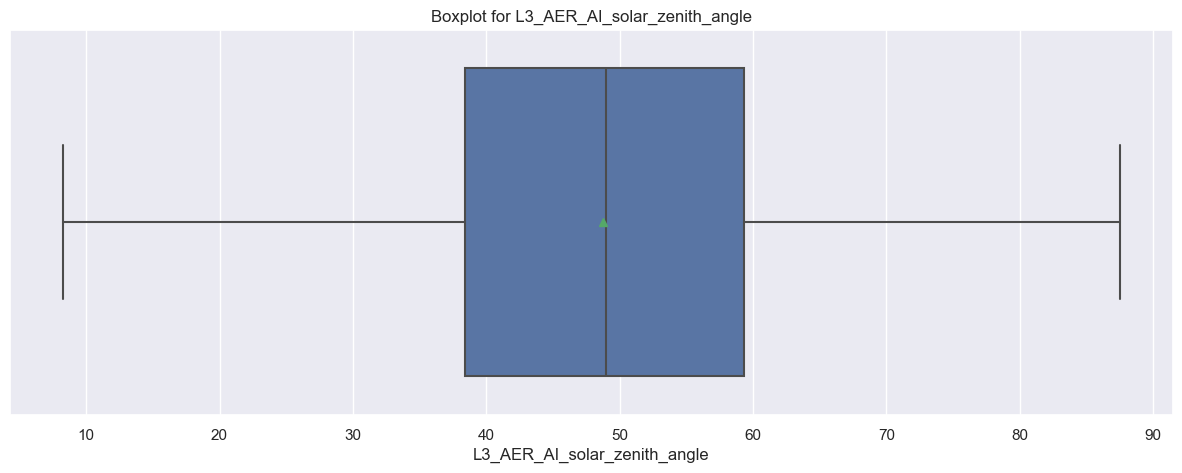

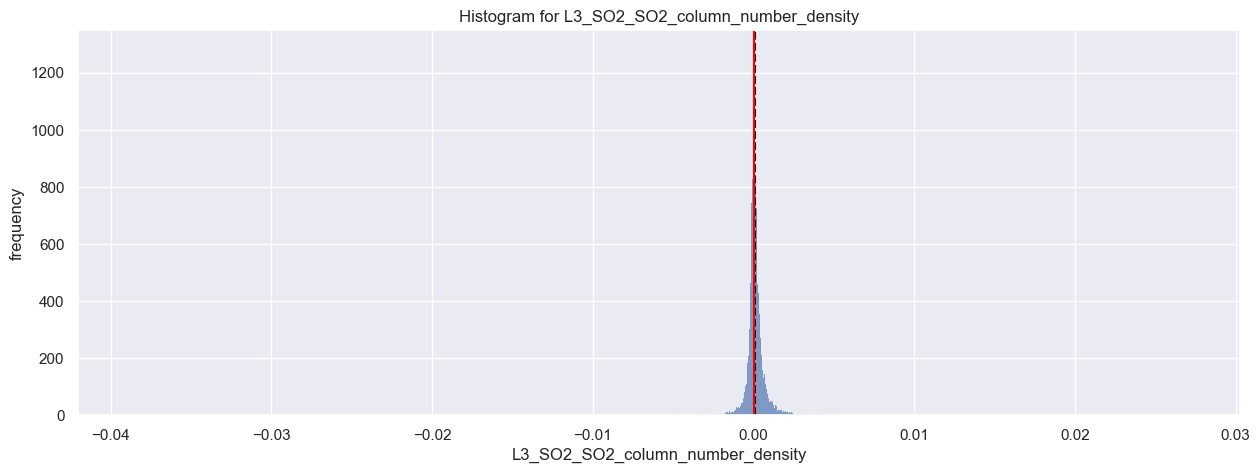

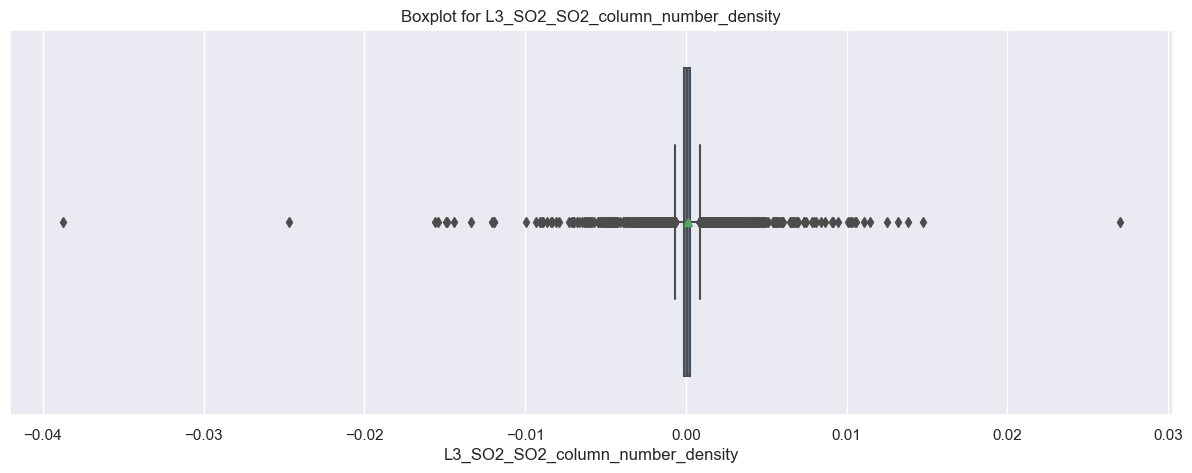

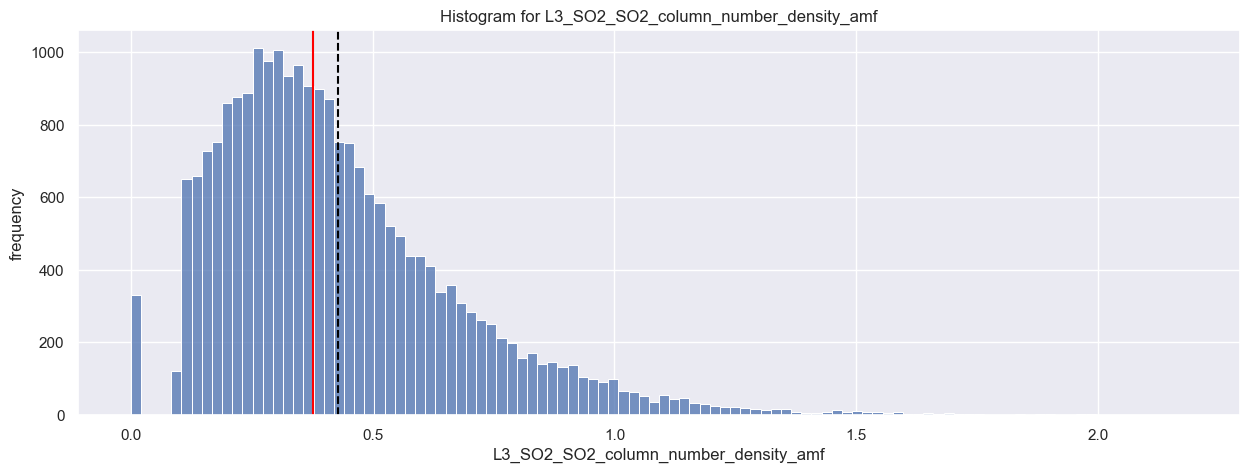

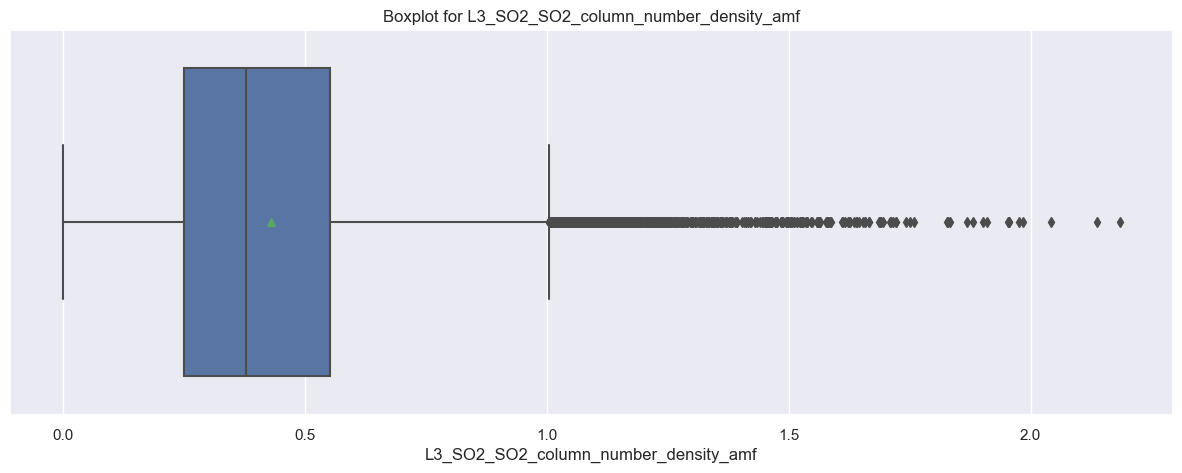

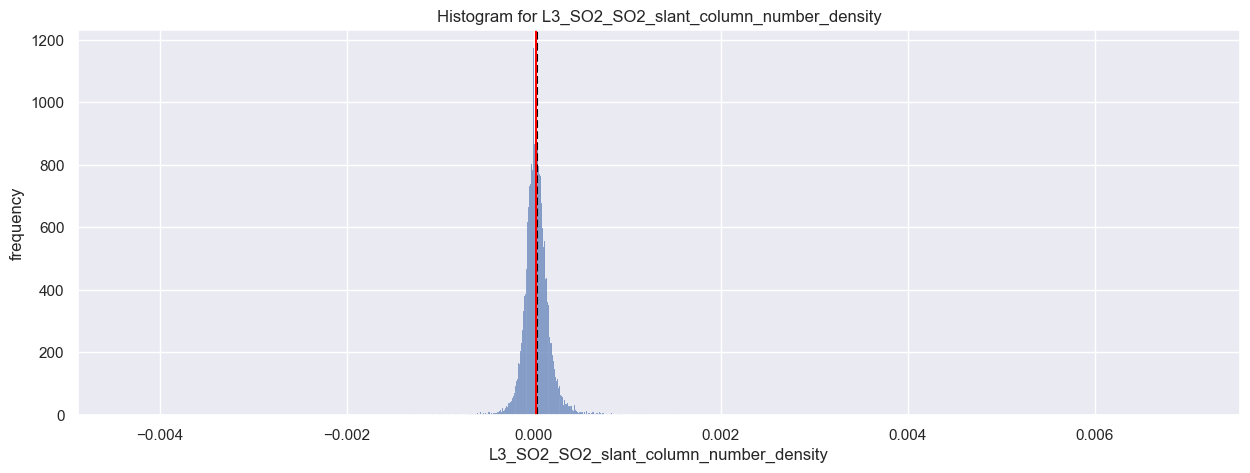

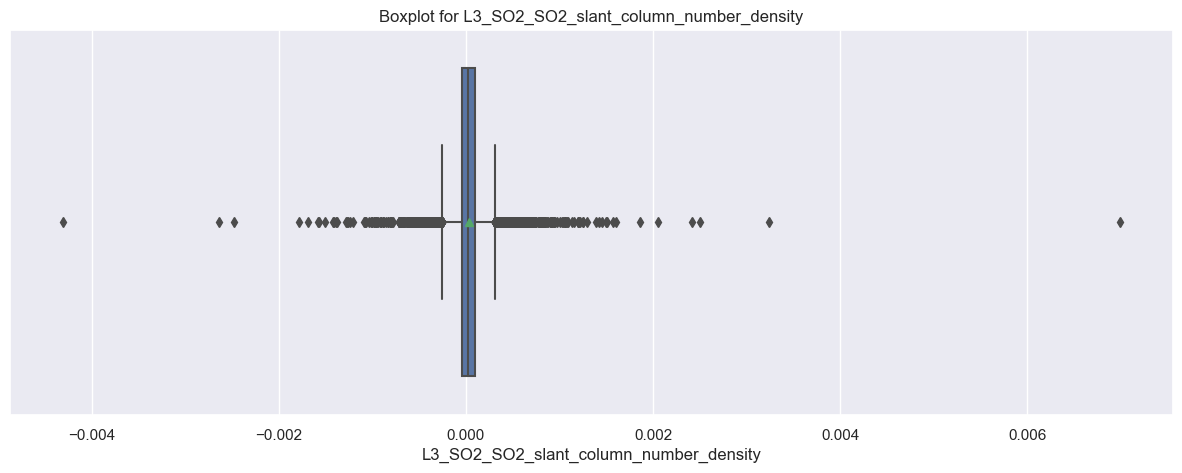

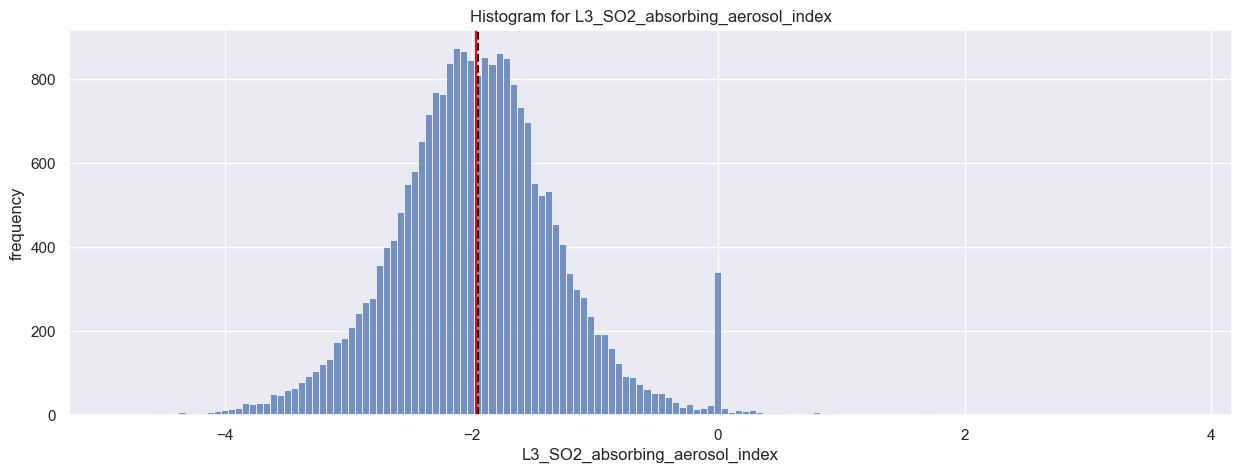

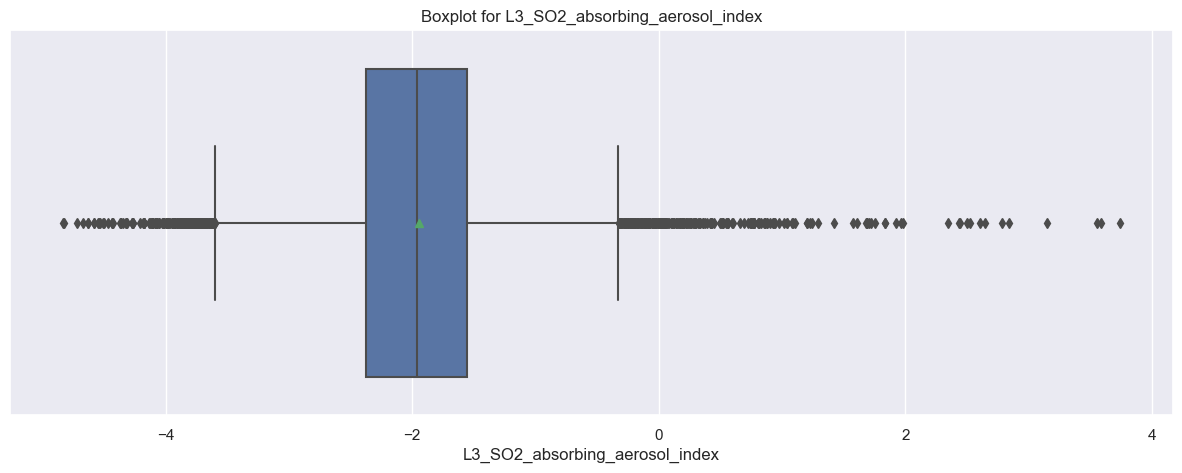

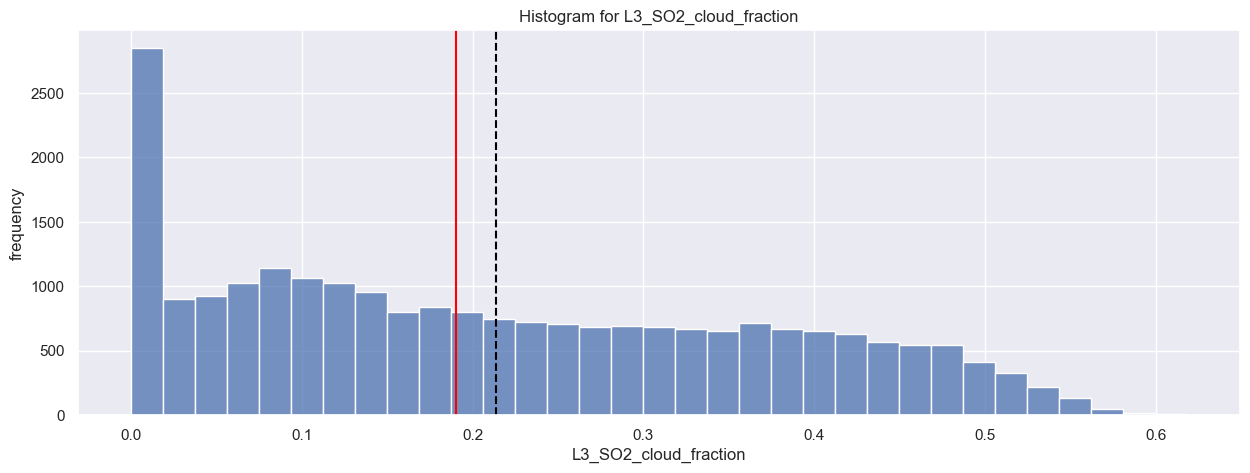

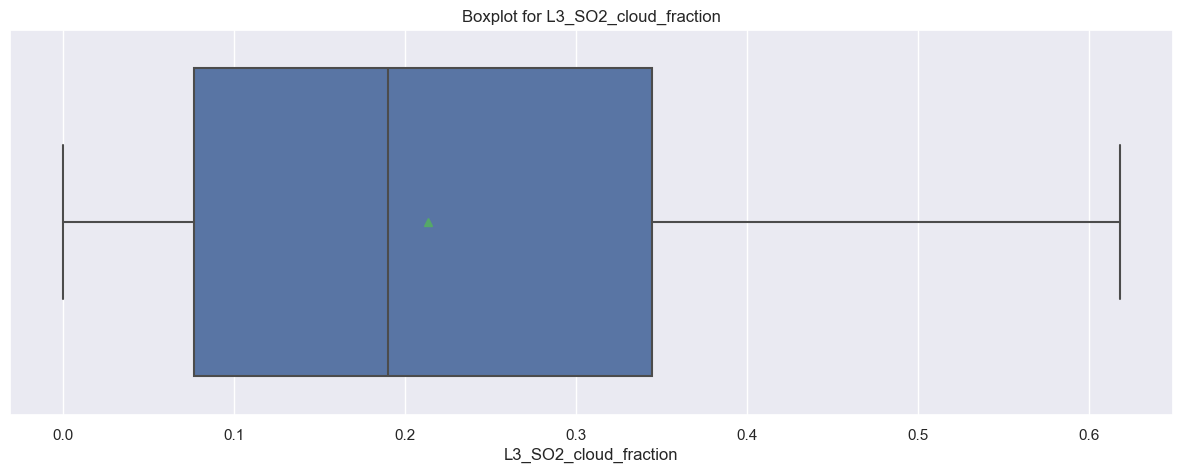

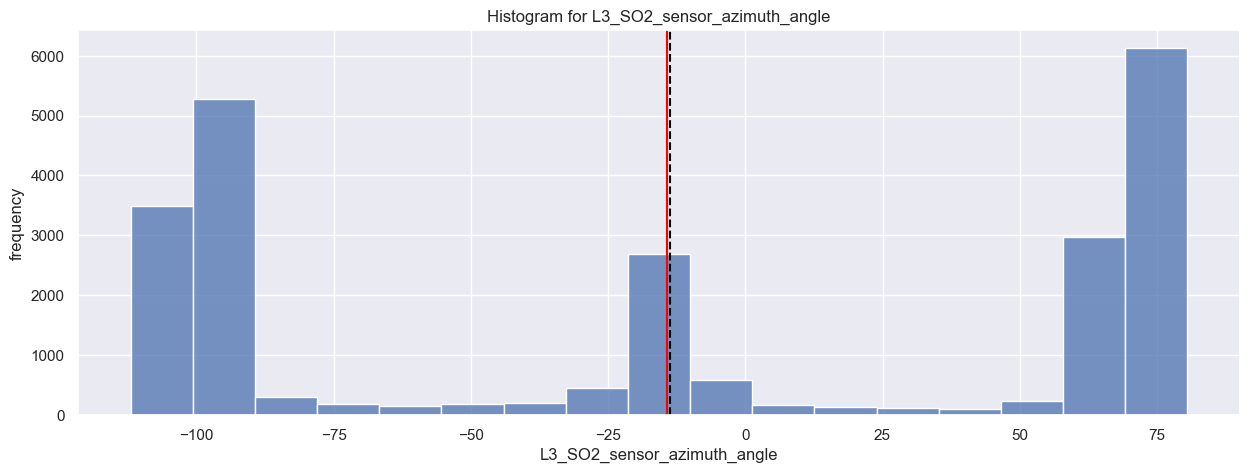

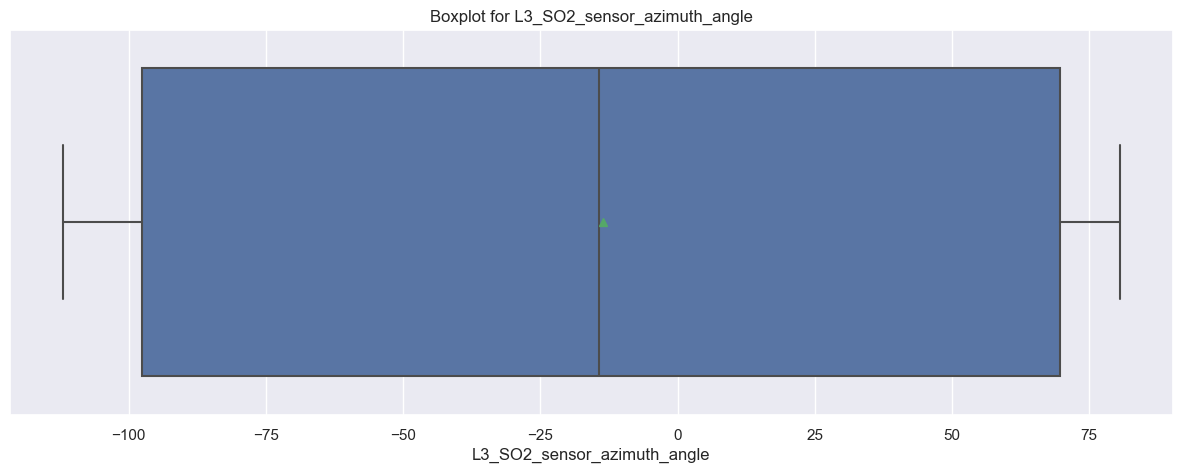

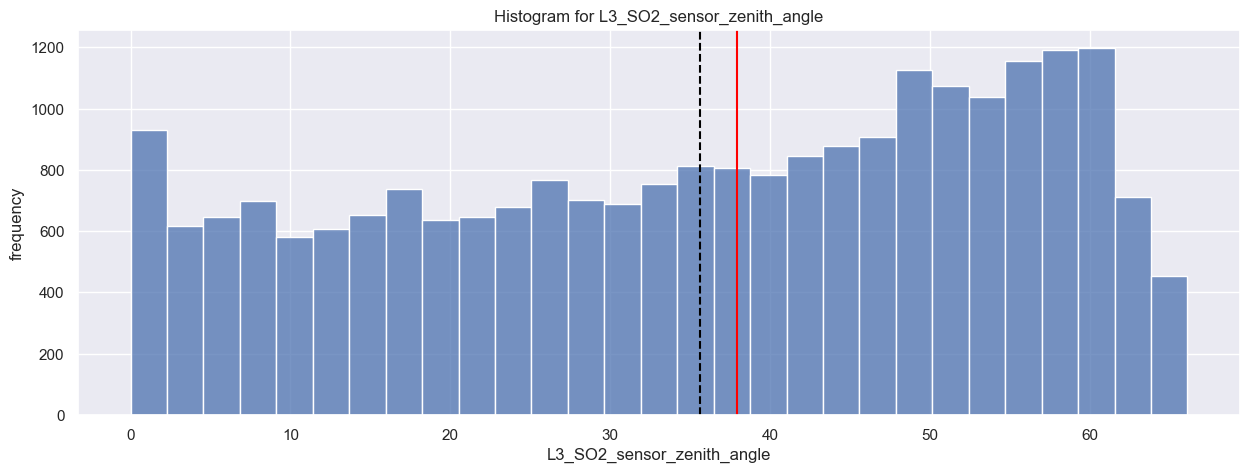

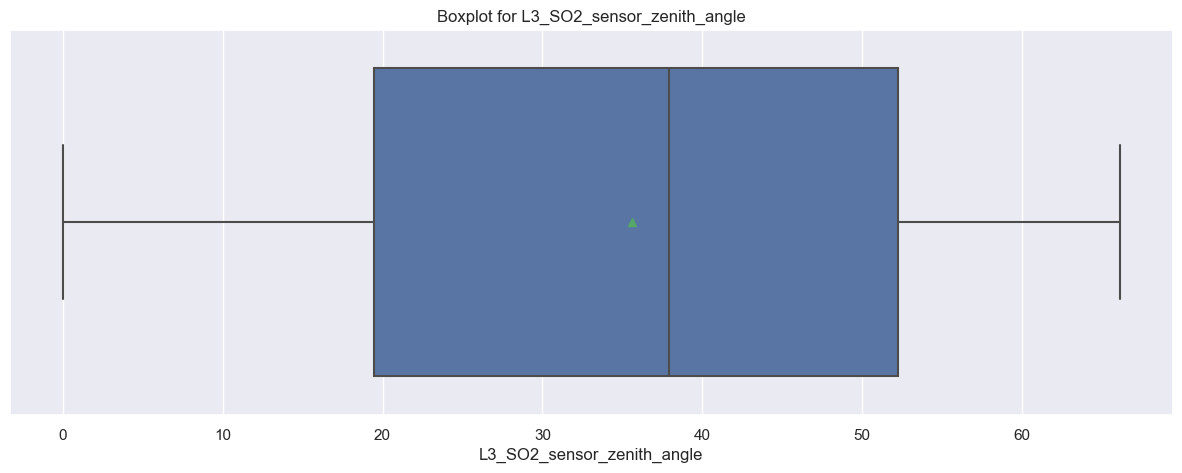

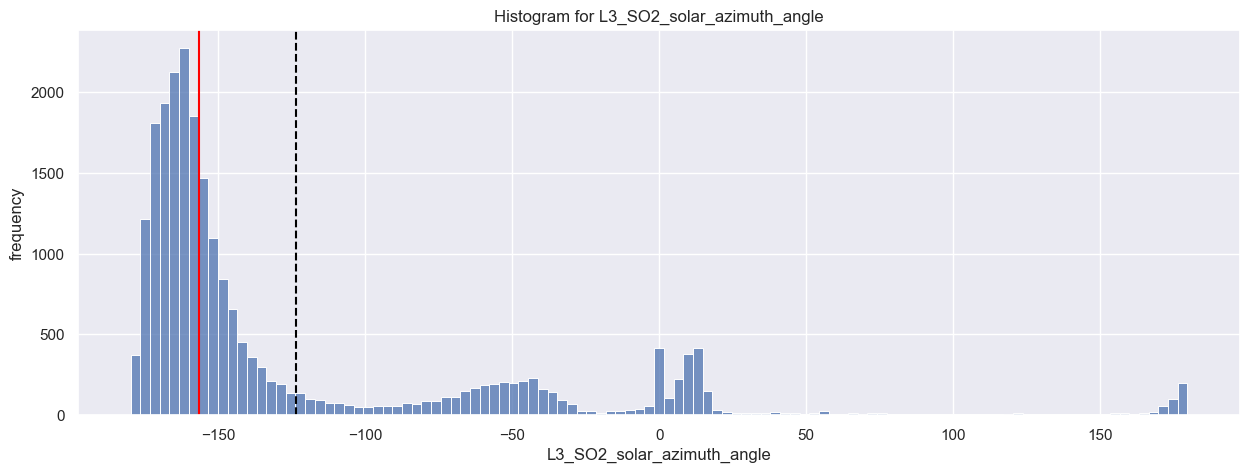

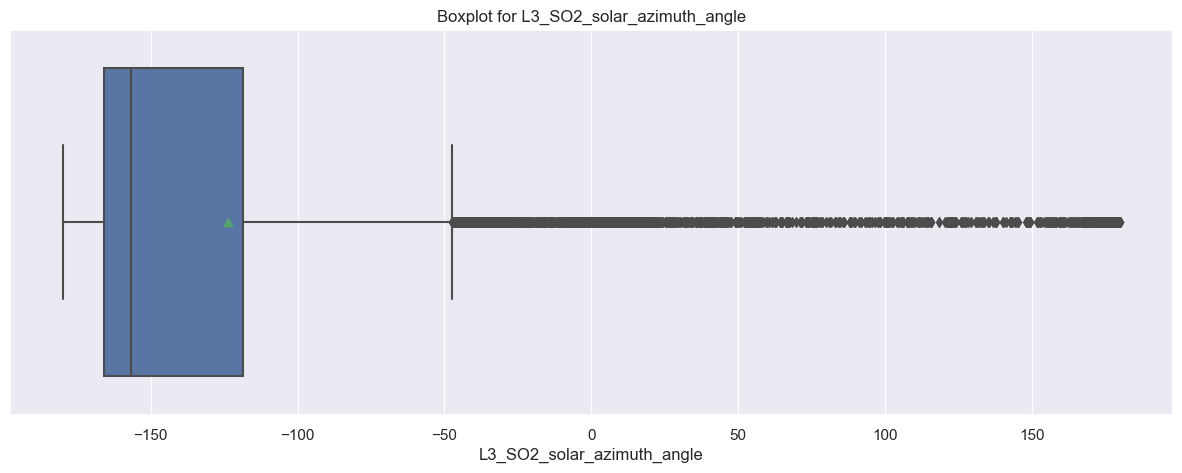

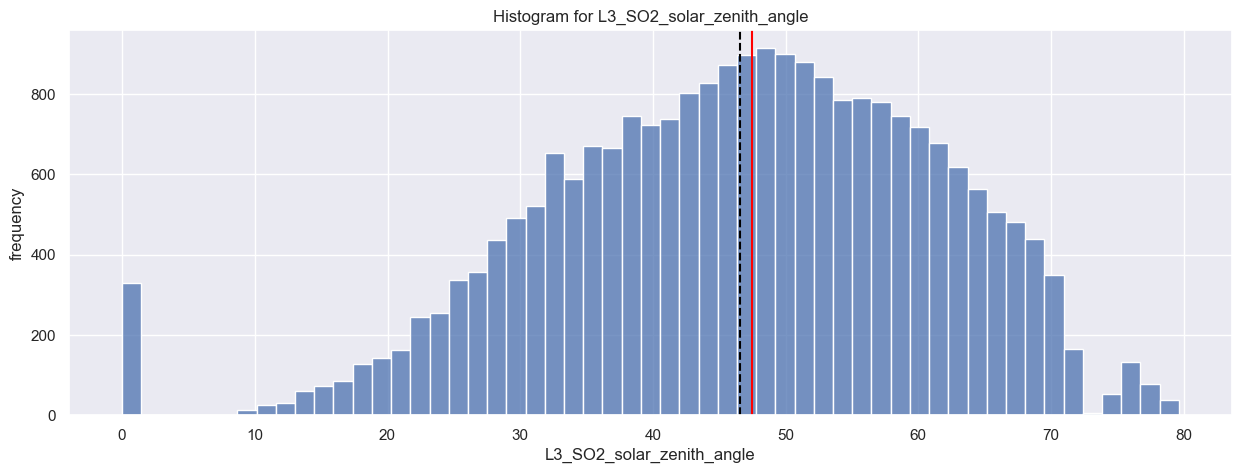

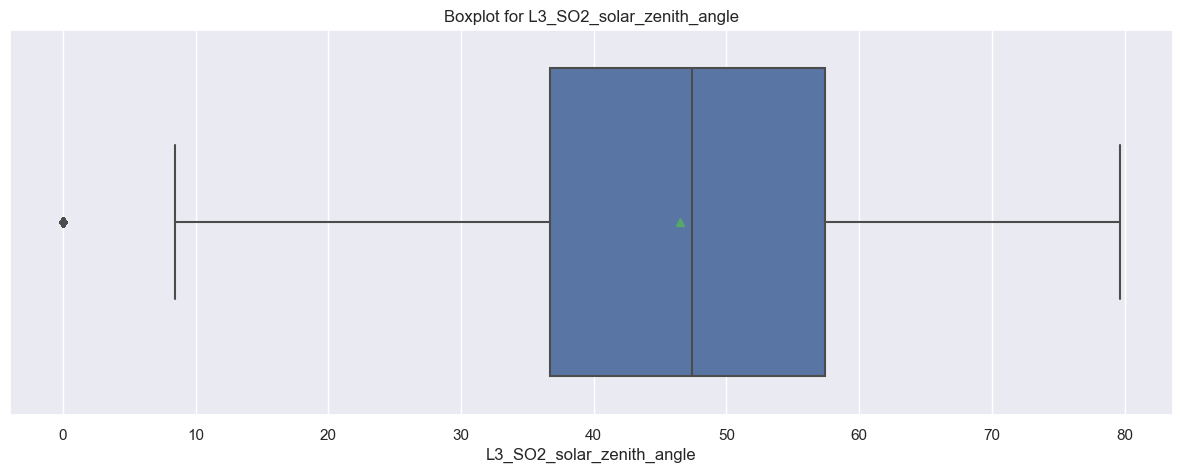

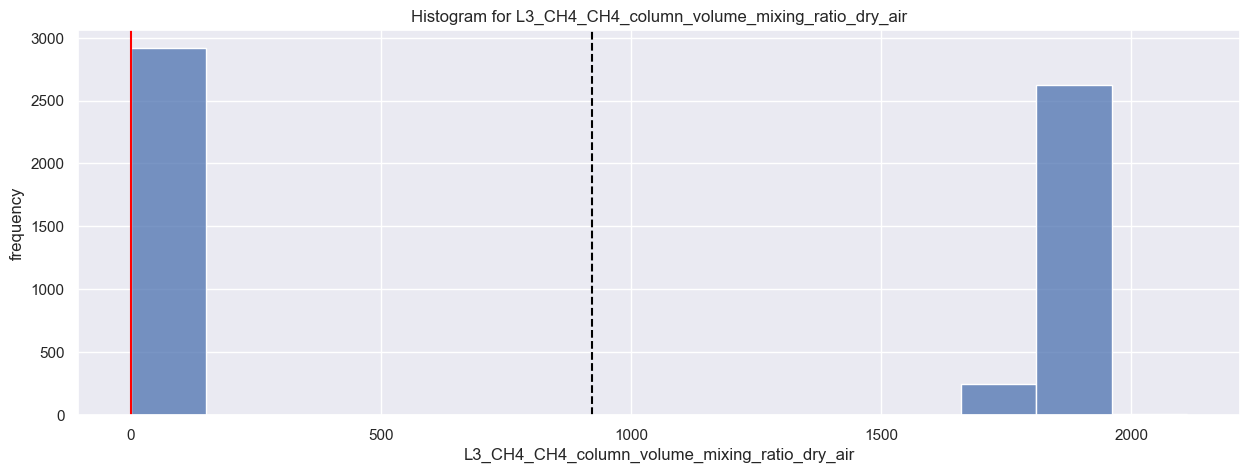

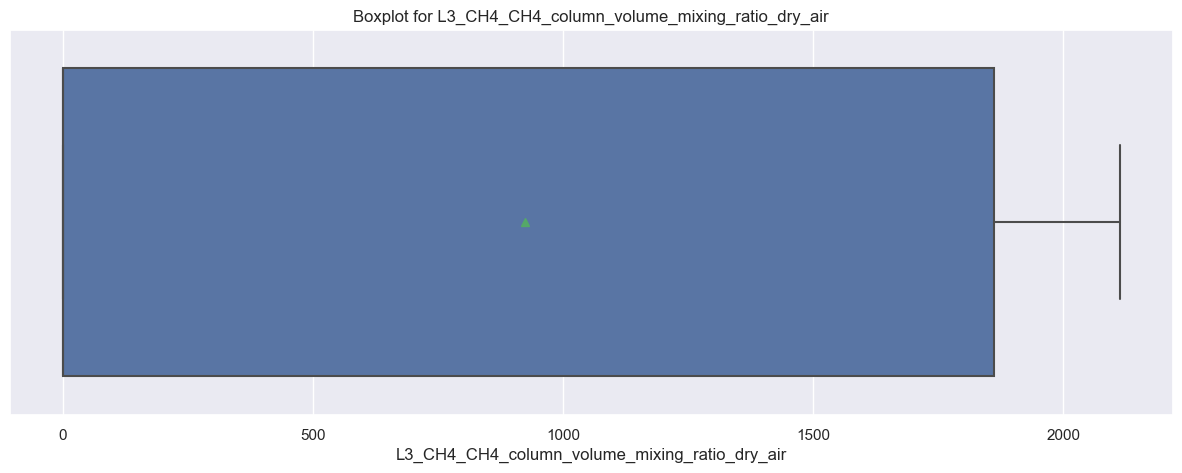

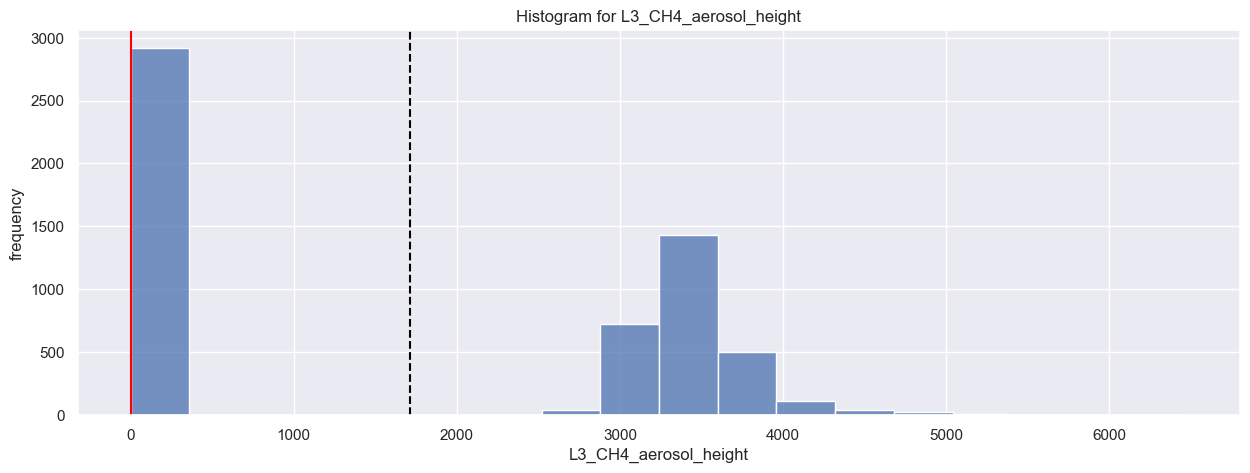

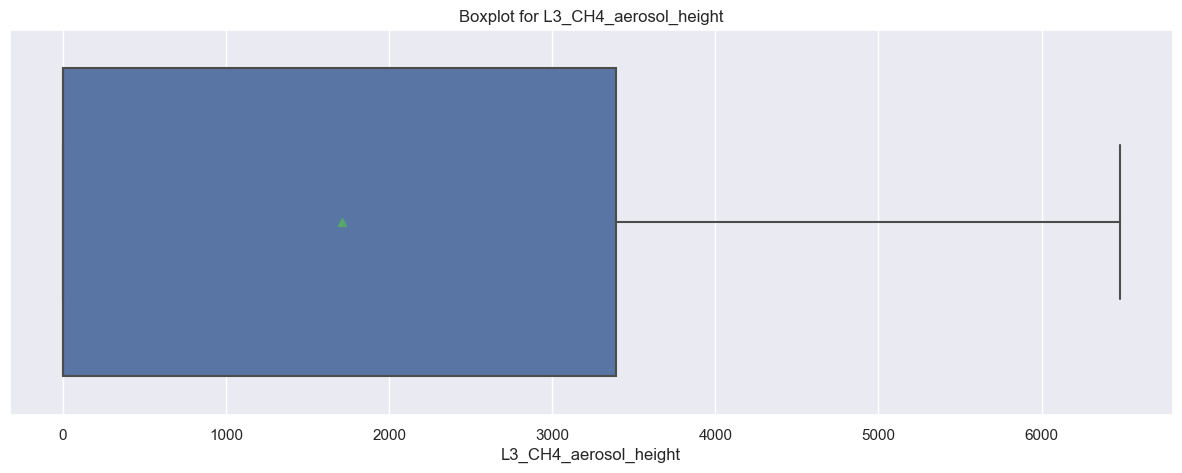

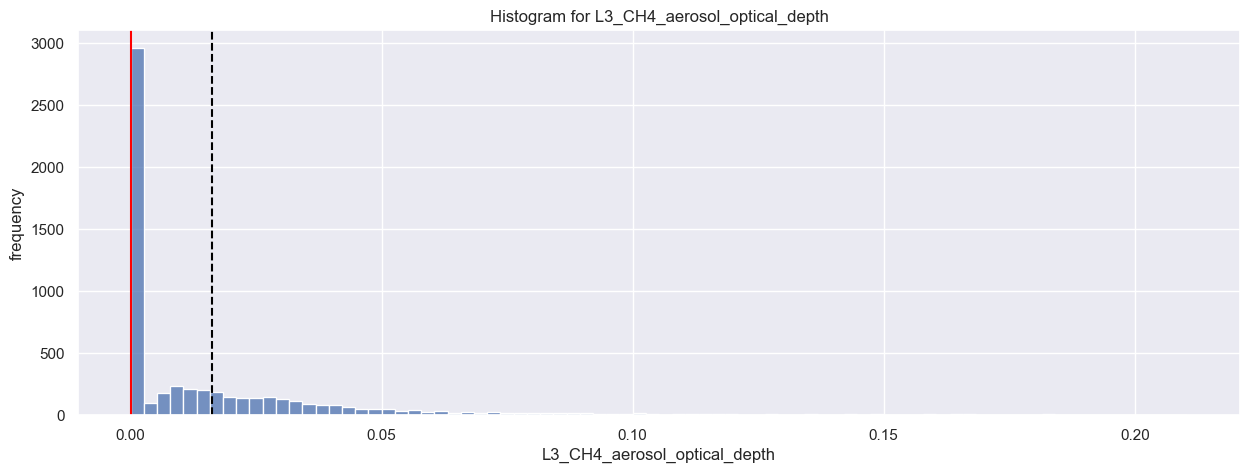

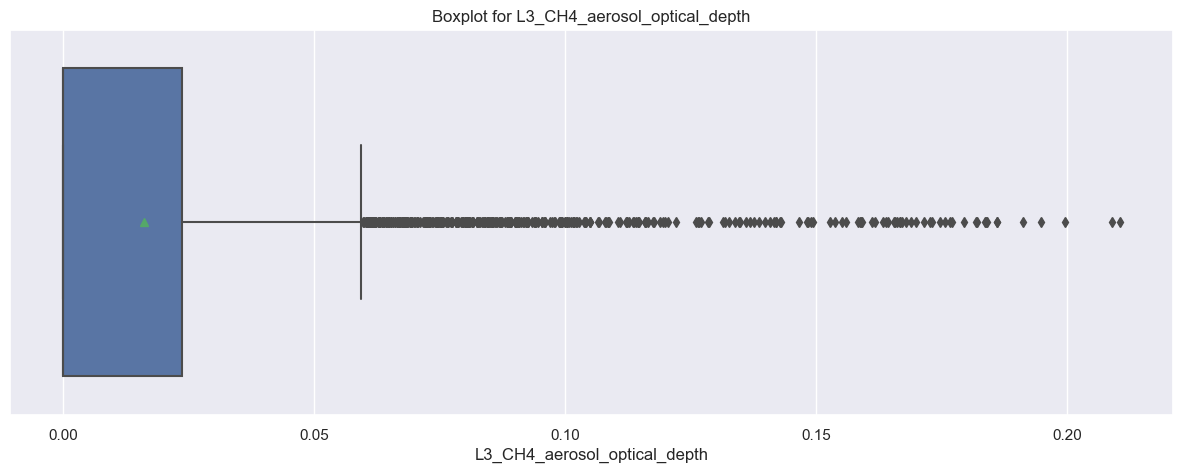

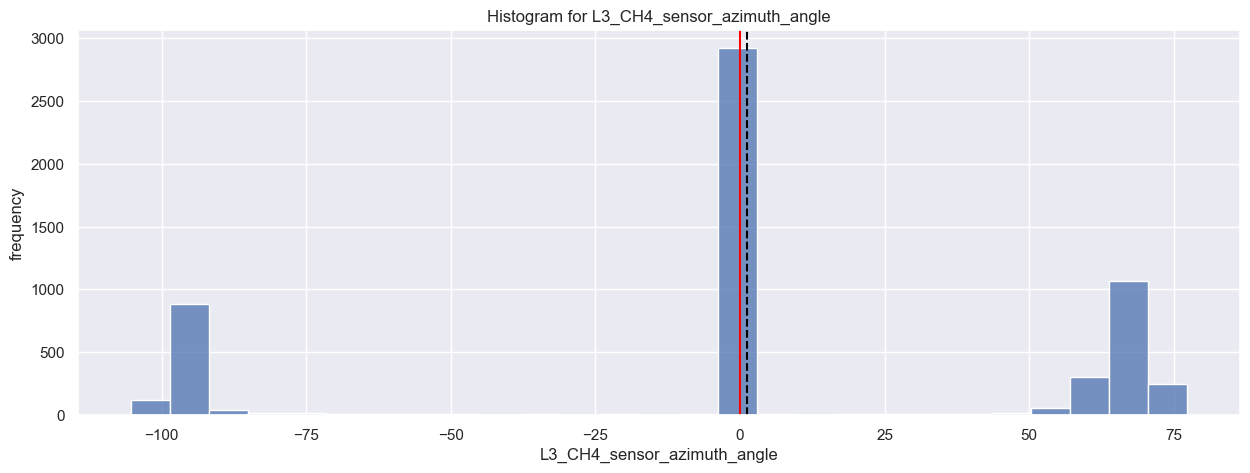

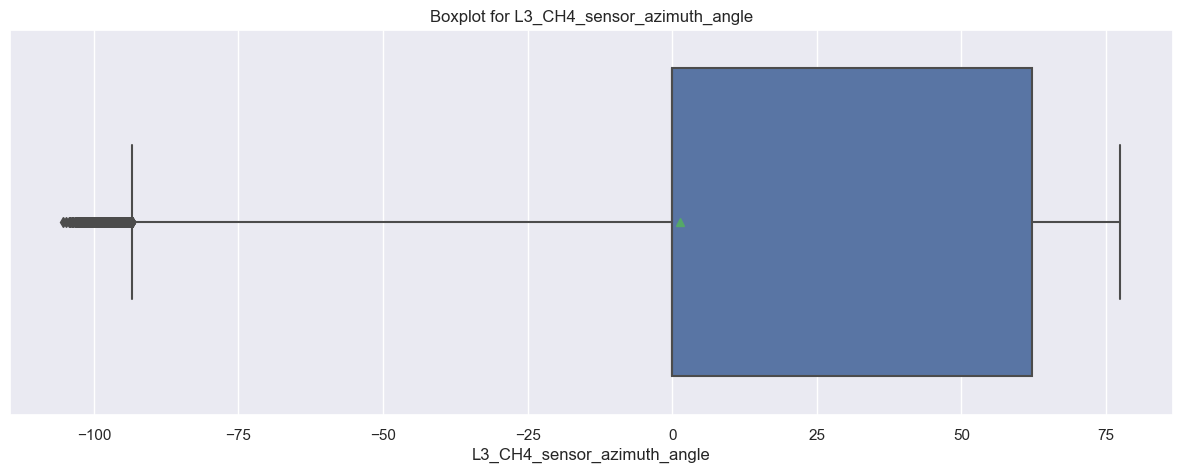

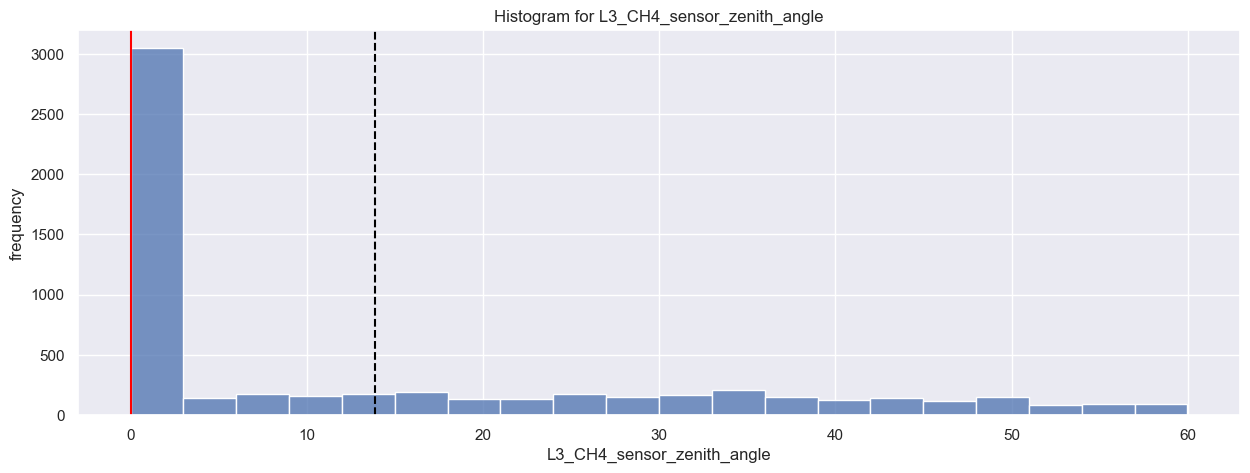

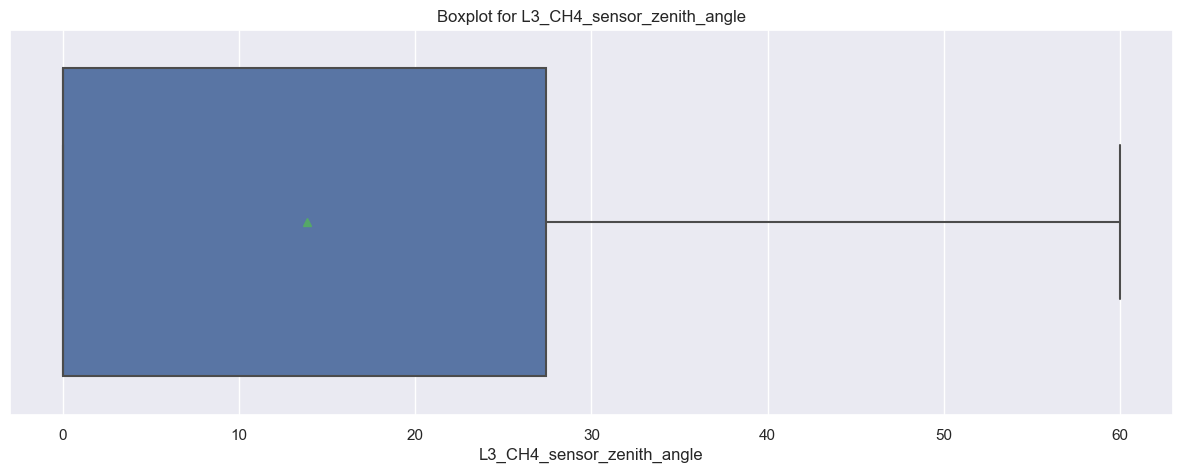

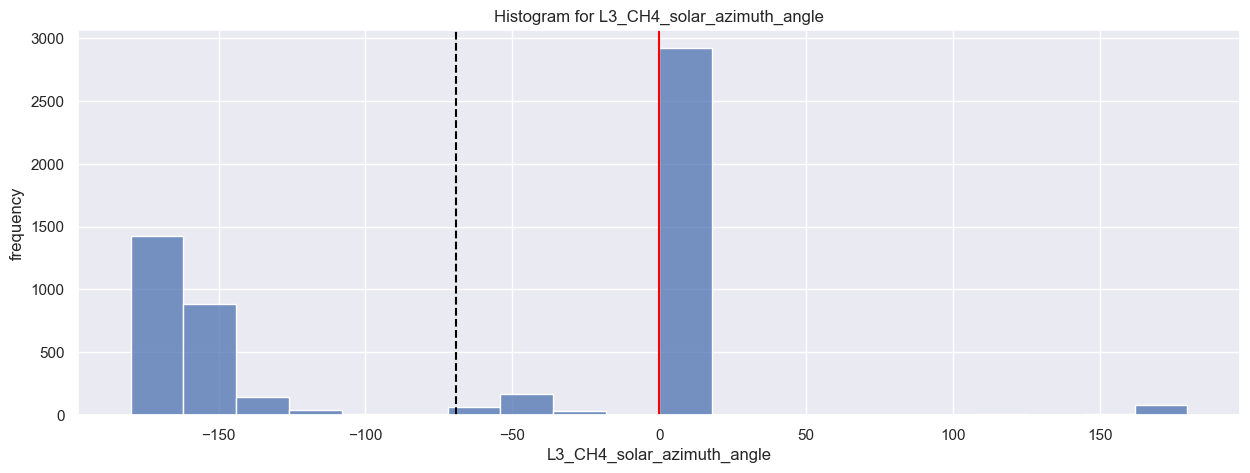

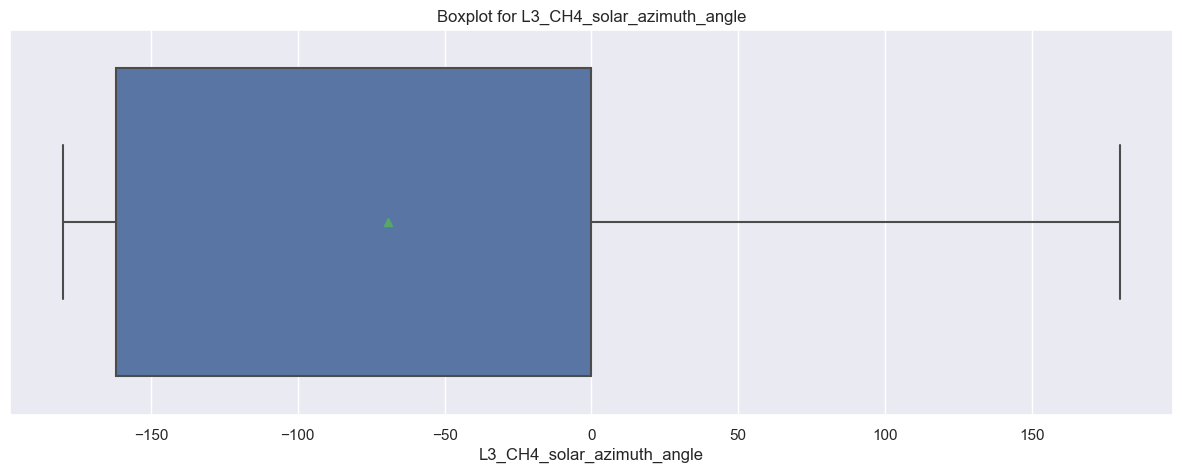

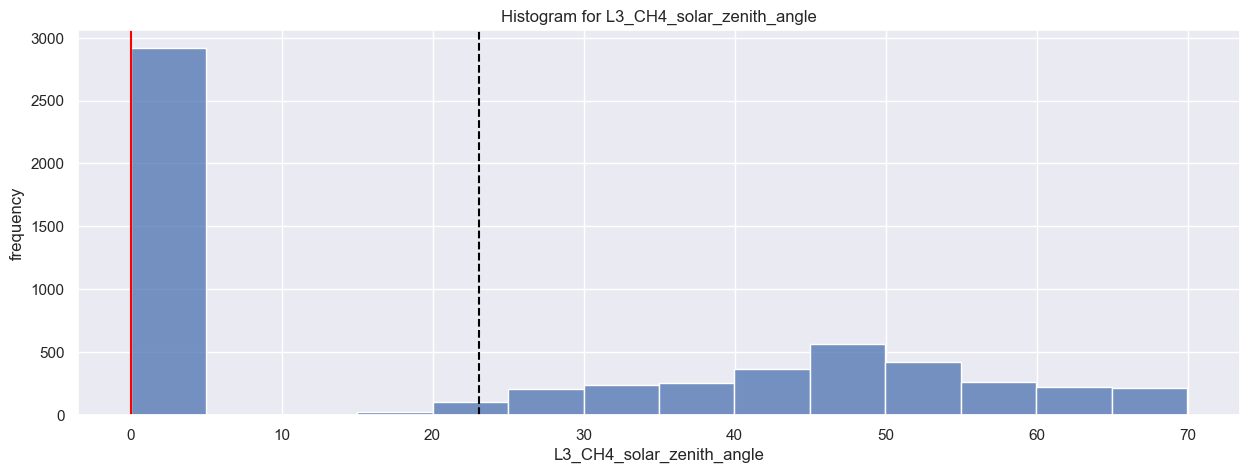

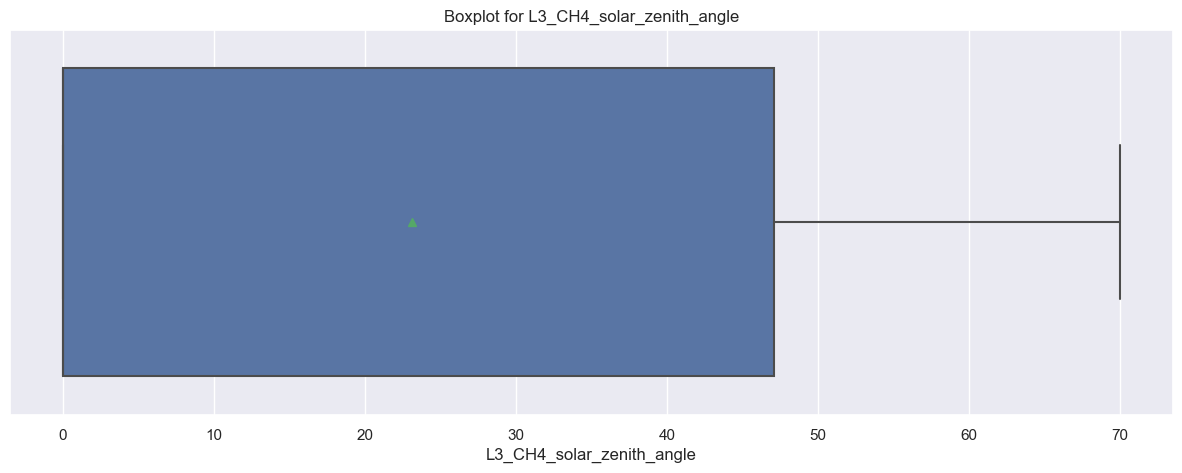

In [34]:
# Code to call the function to display the histogram and boxplots for numerical columns
for item in data[numerical_columns]:
    box_histplot(data,item)

## Bivariate data analysis:

In [ ]:
numeric_col =['target_min', 'target_max', 'target_variance', 'target_count',
       'precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_density',
       'L3_CO_H2O_column_number_density', 'L3_CO_cloud_height',
       'L3_CO_sensor_altitude', 'L3_CO_sensor_azimuth_angle',
       'L3_CO_sensor_zenith_angle', 'L3_CO_solar_azimuth_angle',
       'L3_CO_solar_zenith_angle', 'L3_HCHO_HCHO_slant_column_number_density',
       'L3_HCHO_cloud_fraction', 'L3_HCHO_sensor_azimuth_angle',
       'L3_HCHO_sensor_zenith_angle', 'L3_HCHO_solar_azimuth_angle',
       'L3_HCHO_solar_zenith_angle',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_CLOUD_cloud_base_height', 'L3_CLOUD_cloud_base_pressure',
       'L3_CLOUD_cloud_fraction', 'L3_CLOUD_cloud_optical_depth',
       'L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure',
       'L3_CLOUD_sensor_azimuth_angle', 'L3_CLOUD_sensor_zenith_angle',
       'L3_CLOUD_solar_azimuth_angle', 'L3_CLOUD_solar_zenith_angle',
       'L3_CLOUD_surface_albedo', 'L3_AER_AI_absorbing_aerosol_index',
       'L3_AER_AI_sensor_altitude', 'L3_AER_AI_sensor_azimuth_angle',
       'L3_AER_AI_sensor_zenith_angle', 'L3_AER_AI_solar_azimuth_angle',
       'L3_AER_AI_solar_zenith_angle', 'L3_SO2_SO2_column_number_density',
       'L3_SO2_SO2_column_number_density_amf',
       'L3_SO2_SO2_slant_column_number_density',
       'L3_SO2_absorbing_aerosol_index', 'L3_SO2_cloud_fraction',
       'L3_SO2_sensor_azimuth_angle', 'L3_SO2_sensor_zenith_angle',
       'L3_SO2_solar_azimuth_angle', 'L3_SO2_solar_zenith_angle',
       'L3_CH4_CH4_column_volume_mixing_ratio_dry_air',
       'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth',
       'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle',
       'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle']

In [33]:
numerical_columns= data.select_dtypes("number").columns

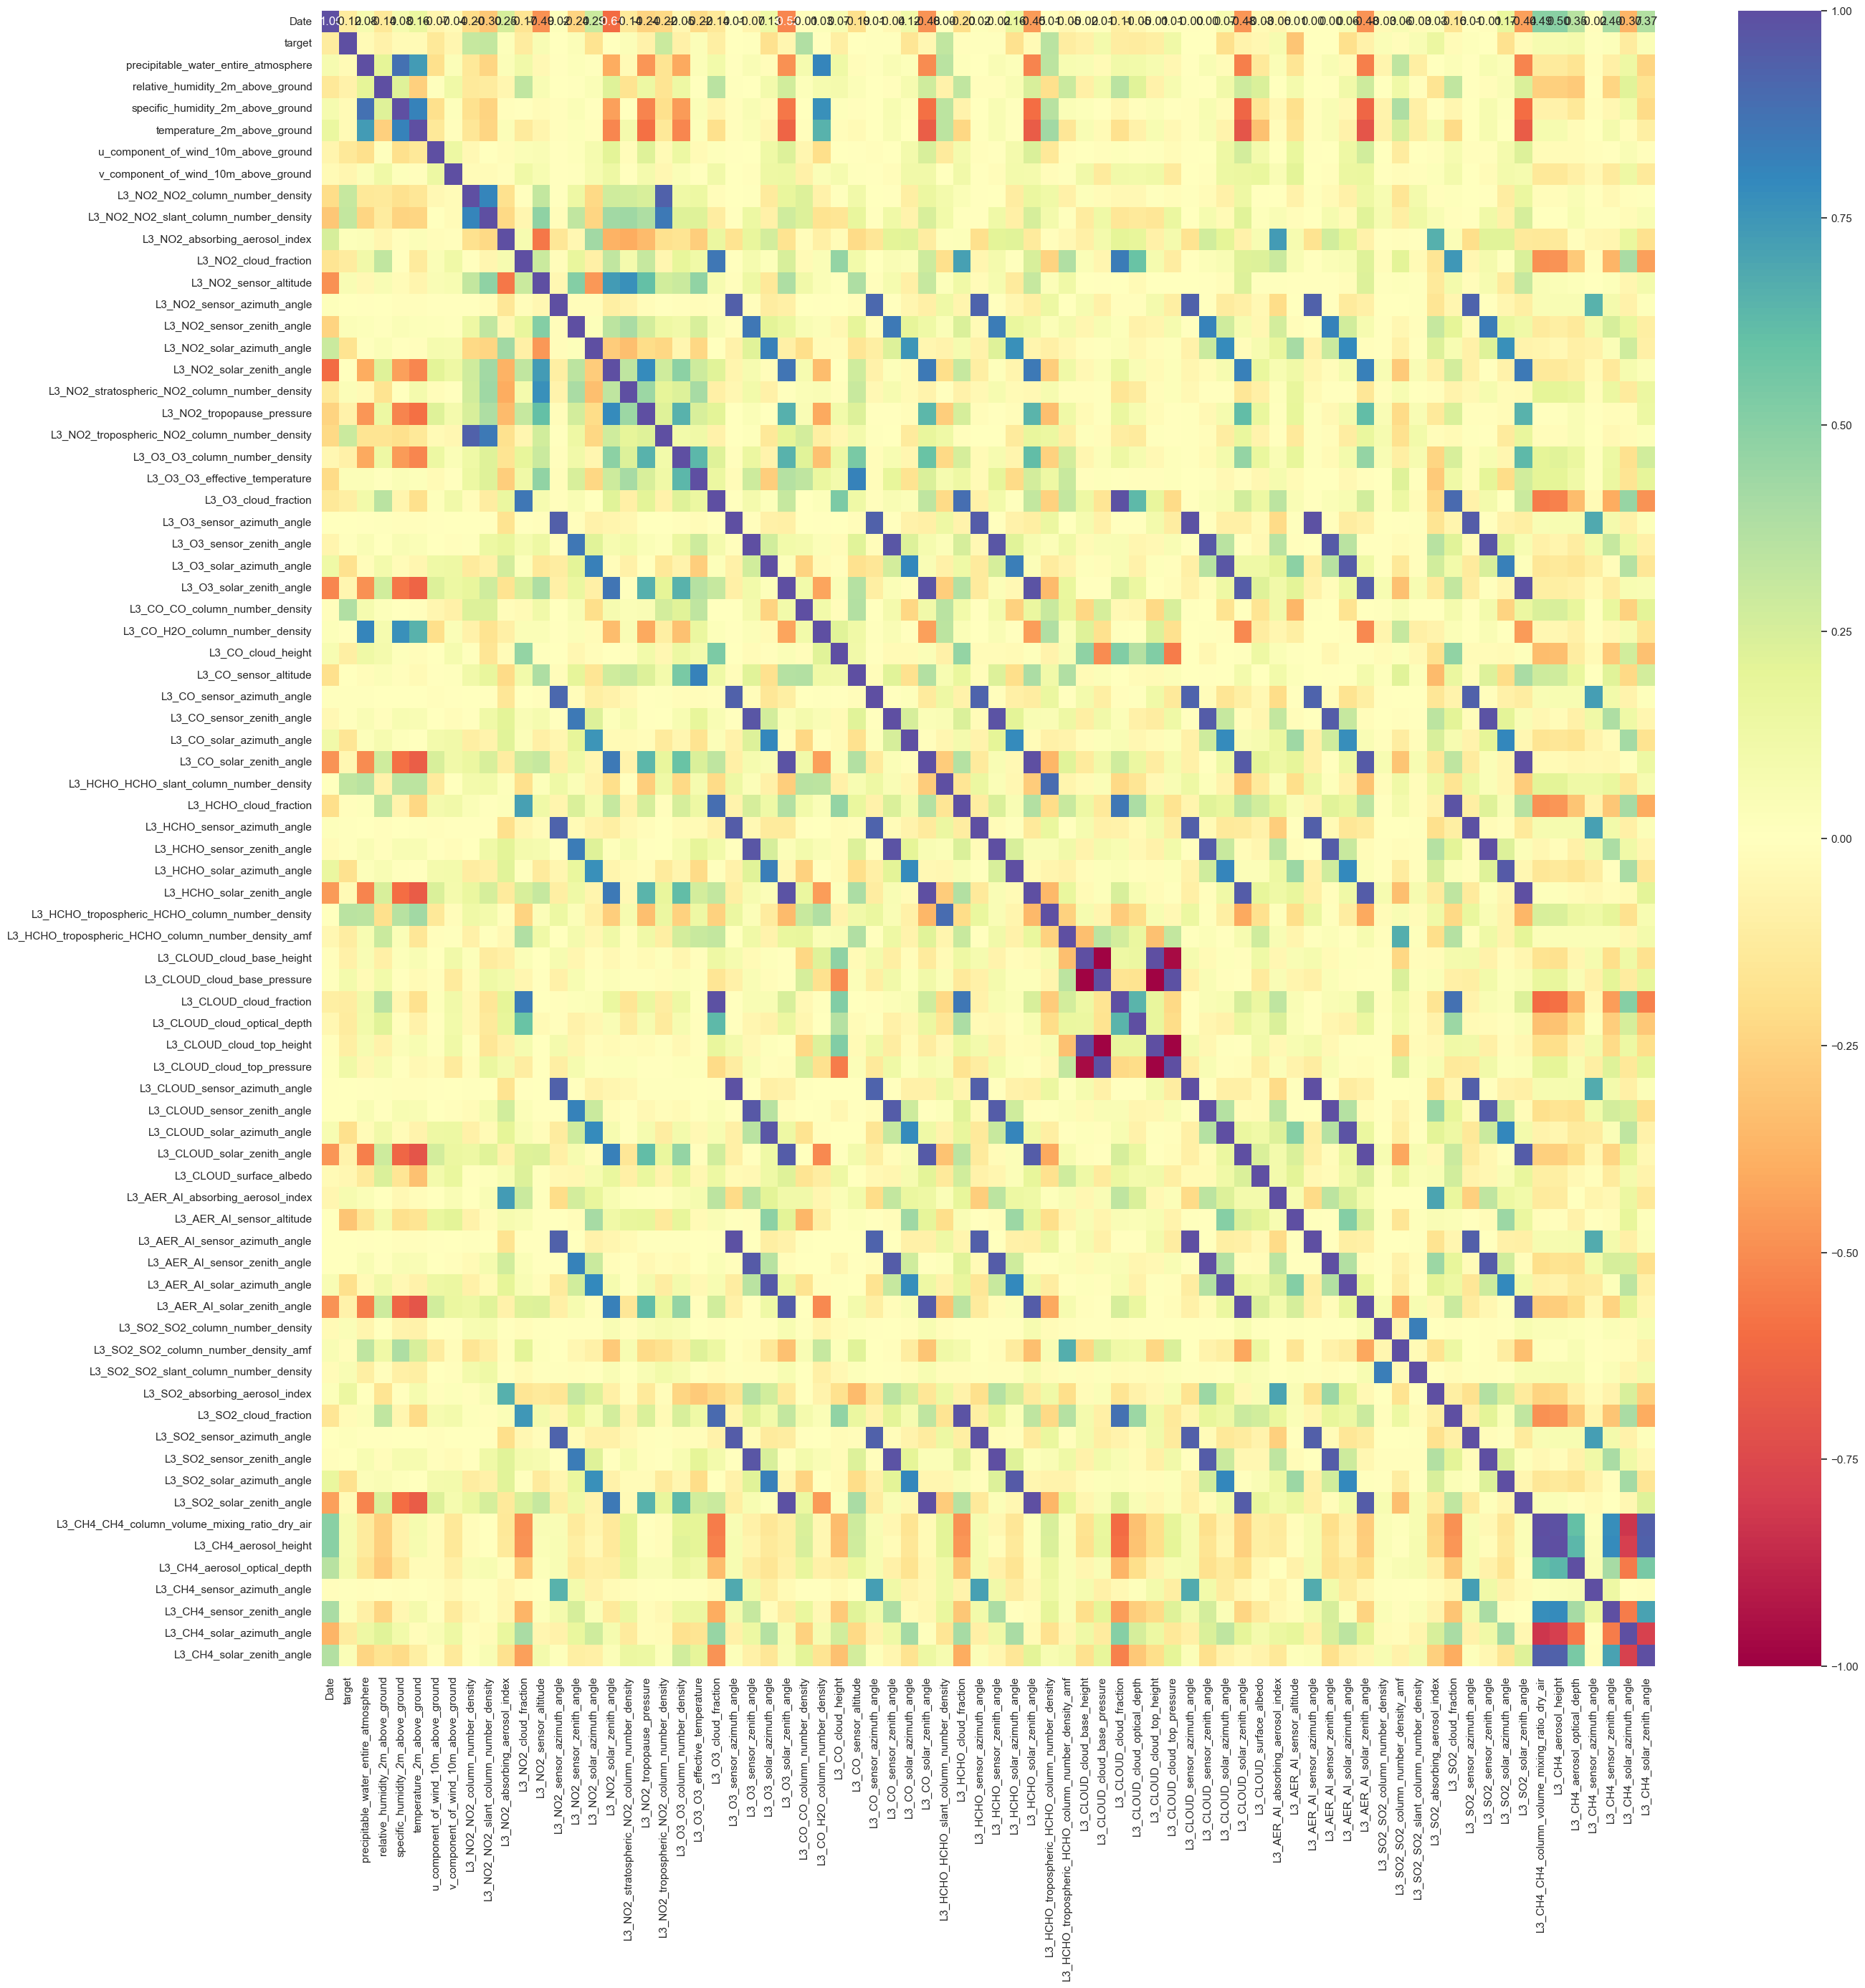

In [36]:
## Construct a correlation matrix
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [34]:
### Select columns that are highly correlated
def correlation(data,cut_off):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> cut_off:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
### Now lets display the highly correlated columns
feature = correlation(data[numerical_columns],0.7)
print(feature)

{'L3_O3_solar_zenith_angle', 'L3_CO_sensor_altitude', 'L3_HCHO_sensor_azimuth_angle', 'L3_NO2_stratospheric_NO2_column_number_density', 'L3_CH4_sensor_azimuth_angle', 'L3_CLOUD_cloud_fraction', 'L3_CO_solar_zenith_angle', 'L3_NO2_solar_zenith_angle', 'L3_NO2_tropopause_pressure', 'L3_CH4_solar_zenith_angle', 'L3_CLOUD_solar_zenith_angle', 'L3_SO2_SO2_slant_column_number_density', 'L3_CH4_solar_azimuth_angle', 'L3_SO2_absorbing_aerosol_index', 'L3_CLOUD_cloud_top_height', 'L3_CH4_sensor_zenith_angle', 'L3_O3_cloud_fraction', 'L3_O3_sensor_zenith_angle', 'L3_HCHO_sensor_zenith_angle', 'L3_CLOUD_sensor_azimuth_angle', 'L3_AER_AI_solar_zenith_angle', 'L3_SO2_solar_azimuth_angle', 'L3_O3_sensor_azimuth_angle', 'L3_CH4_aerosol_height', 'L3_CO_sensor_zenith_angle', 'L3_SO2_sensor_zenith_angle', 'L3_HCHO_solar_zenith_angle', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_AER_AI_sensor_zenith_angle', 'L3_HCHO_cloud_fraction', 'L3_CLOUD_solar_azimuth_angle', 'L3_CO_H2O_column_number_dens

## Data preprocessing

### Feature engineering

#### OUTLIER DETECTION AND TREATMENT

In [ ]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns):
    plt.subplot(50,2,i+ 1)
    plt.boxplot(data[variable], whis=1.5)
   # plt.tight_layout()
    plt.title(variable)
plt.show()

### Treatment of Outliers in the training dataset
* The size and age dataset are skewed to the right with outliers on the upper whisker.
* We must trim the dataset to remove the outliers from the box and whisker diagram.

In [ ]:
## Select the numerical dataset 
numerical_column = data.select_dtypes("number").columns 

In [ ]:
### Create a function to identify outliers
def outliers(df,item):
    Q1 = df[item].quantile(0.25)
    Q3 = df[item].quantile(0.75)
    IQR = Q3-Q1
    Lower_fence = Q1-1.5*IQR
    Upper_fence = Q3+1.5*IQR
    outlier_list = df.index[(df[item]<Lower_fence)|(df[item]>Upper_fence)]
    return outlier_list

In [ ]:
### Now create an list to store the outliers
index_list = [] 
for feature in numerical_column:
    ls=outliers(data,feature)
    index_list.extend(ls)

In [ ]:
### Now define a function to remove the outliers
def remove(df,outlier_list):
    outlier_list = sorted(set(outlier_list))
    df = df.drop(outlier_list)
    return df

In [ ]:
## Code to produce the clean data in the training set
data_clean = remove(data,index_list)

In [ ]:
data_clean.head()

In [ ]:
test_data.head()

In [ ]:
box_histplot(data_clean,"target") 

### Data Preparation:

In [36]:
### Make a copy of the cleaned training dataset
data_train = data.copy()
data_train.head()

Date  target  precipitable_water_entire_atmosphere  \
0 2020-01-02  38.000                                11.000   
1 2020-01-03  39.000                                14.600   
2 2020-01-04  24.000                                16.400   
3 2020-01-05  49.000                                 6.912   
4 2020-01-06  21.000                                13.900   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                             60.200                              0.008   
1                             48.800                              0.008   
2                             33.400                              0.007   
3                             21.300                              0.004   
4                             44.700                              0.005   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                       18.517                                 1.996   
1                       22.547                                 3.330   
2                       27.031                                 5.066   
3                       23.972                                 3.004   
4                       16.816                                 2.622   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                -1.227                             0.000   
1                                -1.188                             0.000   
2                                 3.501                             0.000   
3                                 1.099                             0.000   
4                                 2.671                             0.000   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
0                                   0.000                          -1.231   
1                                   0.000                          -1.083   
2                                   0.000                          -1.001   
3                                   0.000                          -0.777   
4                                   0.000                           0.366   

   L3_NO2_cloud_fraction  L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0                  0.007              840209.875                       76.538   
1                  0.018              840772.942                      -14.708   
2                  0.016              841410.713                     -105.201   
3                  0.056              841103.242                     -104.334   
4                  0.029              840763.055                       58.850   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                      38.634                     -61.737   
1                      59.625                     -67.694   
2                      49.840                     -78.343   
3                      29.181                     -73.897   
4                       0.797                     -68.612   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.358                                           0.000   
1                     28.615                                           0.000   
2                     34.297                                           0.000   
3                     30.545                                           0.000   
4                     26.900                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    6156.074                                          0.000   
2                    7311.869                                          0.000   
3                   11205.388                                          0.000   
4                   11205.373                                          0.000   

   L3_O3_

### Split the data into train and test sets

In [37]:
# First drop the date column in the training dataset
data_train = data_train.drop(["Date"], axis=1)

In [38]:
data_train.head()

target  precipitable_water_entire_atmosphere  \
0  38.000                                11.000   
1  39.000                                14.600   
2  24.000                                16.400   
3  49.000                                 6.912   
4  21.000                                13.900   

   relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
0                             60.200                              0.008   
1                             48.800                              0.008   
2                             33.400                              0.007   
3                             21.300                              0.004   
4                             44.700                              0.005   

   temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
0                       18.517                                 1.996   
1                       22.547                                 3.330   
2                       27.031                                 5.066   
3                       23.972                                 3.004   
4                       16.816                                 2.622   

   v_component_of_wind_10m_above_ground  L3_NO2_NO2_column_number_density  \
0                                -1.227                             0.000   
1                                -1.188                             0.000   
2                                 3.501                             0.000   
3                                 1.099                             0.000   
4                                 2.671                             0.000   

   L3_NO2_NO2_slant_column_number_density  L3_NO2_absorbing_aerosol_index  \
0                                   0.000                          -1.231   
1                                   0.000                          -1.083   
2                                   0.000                          -1.001   
3                                   0.000                          -0.777   
4                                   0.000                           0.366   

   L3_NO2_cloud_fraction  L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0                  0.007              840209.875                       76.538   
1                  0.018              840772.942                      -14.708   
2                  0.016              841410.713                     -105.201   
3                  0.056              841103.242                     -104.334   
4                  0.029              840763.055                       58.850   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                      38.634                     -61.737   
1                      59.625                     -67.694   
2                      49.840                     -78.343   
3                      29.181                     -73.897   
4                       0.797                     -68.612   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.358                                           0.000   
1                     28.615                                           0.000   
2                     34.297                                           0.000   
3                     30.545                                           0.000   
4                     26.900                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    6156.074                                          0.000   
2                    7311.869                                          0.000   
3                   11205.388                                          0.000   
4                   11205.373                                          0.000   

   L3_O3_O3_column_number_density  L3_O3_O3_effective_temperature  \
0

In [39]:
# Dividing train data into X and y 
X = data_train.drop(["target"], axis=1)
y = data_train["target"]

In [40]:
X.head()

precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                11.000                             60.200   
1                                14.600                             48.800   
2                                16.400                             33.400   
3                                 6.912                             21.300   
4                                13.900                             44.700   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.008                       18.517   
1                              0.008                       22.547   
2                              0.007                       27.031   
3                              0.004                       23.972   
4                              0.005                       16.816   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 1.996                                -1.227   
1                                 3.330                                -1.188   
2                                 5.066                                 3.501   
3                                 3.004                                 1.099   
4                                 2.622                                 2.671   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                             0.000                                   0.000   
1                             0.000                                   0.000   
2                             0.000                                   0.000   
3                             0.000                                   0.000   
4                             0.000                                   0.000   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                          -1.231                  0.007   
1                          -1.083                  0.018   
2                          -1.001                  0.016   
3                          -0.777                  0.056   
4                           0.366                  0.029   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0              840209.875                       76.538   
1              840772.942                      -14.708   
2              841410.713                     -105.201   
3              841103.242                     -104.334   
4              840763.055                       58.850   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                      38.634                     -61.737   
1                      59.625                     -67.694   
2                      49.840                     -78.343   
3                      29.181                     -73.897   
4                       0.797                     -68.612   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.358                                           0.000   
1                     28.615                                           0.000   
2                     34.297                                           0.000   
3                     30.545                                           0.000   
4                     26.900                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    6156.074                                          0.000   
2                    7311.869                                          0.000   
3                   11205.388                                          0.000   
4                   11205.373                                          0.000   

   L3_O3_O3_column_number_density  L3_O3_O3_effective_temperature  \
0                           0.119                

In [41]:
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [42]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 21389 rows and 74 columns


In [43]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 9168 rows and 74 columns


### Missing values imputation in the training dataset

In [44]:
X_train.isnull().sum()/X_train.shape[0] *100

precipitable_water_entire_atmosphere                   0.000
relative_humidity_2m_above_ground                      0.000
specific_humidity_2m_above_ground                      0.000
temperature_2m_above_ground                            0.000
u_component_of_wind_10m_above_ground                   0.000
v_component_of_wind_10m_above_ground                   0.000
L3_NO2_NO2_column_number_density                       7.069
L3_NO2_NO2_slant_column_number_density                 7.069
L3_NO2_absorbing_aerosol_index                         7.069
L3_NO2_cloud_fraction                                  7.069
L3_NO2_sensor_altitude                                 7.069
L3_NO2_sensor_azimuth_angle                            7.069
L3_NO2_sensor_zenith_angle                             7.069
L3_NO2_solar_azimuth_angle                             7.069
L3_NO2_solar_zenith_angle                              7.069
L3_NO2_stratospheric_NO2_column_number_density         7.069
L3_NO2_tropopause_pressu

In [45]:
X_val.isnull().sum()/X_val.shape[0] *100

precipitable_water_entire_atmosphere                   0.000
relative_humidity_2m_above_ground                      0.000
specific_humidity_2m_above_ground                      0.000
temperature_2m_above_ground                            0.000
u_component_of_wind_10m_above_ground                   0.000
v_component_of_wind_10m_above_ground                   0.000
L3_NO2_NO2_column_number_density                       7.384
L3_NO2_NO2_slant_column_number_density                 7.384
L3_NO2_absorbing_aerosol_index                         7.384
L3_NO2_cloud_fraction                                  7.384
L3_NO2_sensor_altitude                                 7.384
L3_NO2_sensor_azimuth_angle                            7.395
L3_NO2_sensor_zenith_angle                             7.395
L3_NO2_solar_azimuth_angle                             7.395
L3_NO2_solar_zenith_angle                              7.395
L3_NO2_stratospheric_NO2_column_number_density         7.395
L3_NO2_tropopause_pressu

In [46]:
## Code to print the columns with missing values greater than 50%
col_feature=[] # create an empty list
for item in data_train.columns:
    if ((data_train[item].isnull().sum()/data_train.shape[0])>0.50):
        col_feature.append(item)  # append the columns with missing values greater than 50% in the list
print(col_feature) 

['L3_CH4_CH4_column_volume_mixing_ratio_dry_air', 'L3_CH4_aerosol_height', 'L3_CH4_aerosol_optical_depth', 'L3_CH4_sensor_azimuth_angle', 'L3_CH4_sensor_zenith_angle', 'L3_CH4_solar_azimuth_angle', 'L3_CH4_solar_zenith_angle']


In [47]:
## Now lets drop those columns with missing values above 50% in training dataset
X_train = X_train.drop(columns=col_feature,axis=1)

In [48]:
## Now lets drop those columns with missing values above 50% in training dataset
X_val = X_val.drop(columns=col_feature,axis=1)

In [49]:
## Now drop the columns in the testing dataset
test_data = test_data.drop(columns=col_feature,axis=1)

In [50]:
train_cols = X_train.select_dtypes("number").columns

In [51]:
train_cols

Index(['precipitable_water_entire_atmosphere',
       'relative_humidity_2m_above_ground',
       'specific_humidity_2m_above_ground', 'temperature_2m_above_ground',
       'u_component_of_wind_10m_above_ground',
       'v_component_of_wind_10m_above_ground',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_NO2_slant_column_number_density',
       'L3_NO2_absorbing_aerosol_index', 'L3_NO2_cloud_fraction',
       'L3_NO2_sensor_altitude', 'L3_NO2_sensor_azimuth_angle',
       'L3_NO2_sensor_zenith_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_NO2_solar_zenith_angle',
       'L3_NO2_stratospheric_NO2_column_number_density',
       'L3_NO2_tropopause_pressure',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_O3_O3_column_number_density', 'L3_O3_O3_effective_temperature',
       'L3_O3_cloud_fraction', 'L3_O3_sensor_azimuth_angle',
       'L3_O3_sensor_zenith_angle', 'L3_O3_solar_azimuth_angle',
       'L3_O3_solar_zenith_angle', 'L3_CO_CO_column_number_densi

In [52]:
# To impute missing values
from sklearn.impute import SimpleImputer

In [53]:
### Missing values imputation
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns data 
import time
startScript = time.time()
X_train[train_cols] = median_imputer.fit_transform(X_train[train_cols])
endScript = time.time()
display = endScript-startScript 
print(f"The running time:{display}")

The running time:0.5896739959716797


In [54]:
X_train.isnull().sum().sum()

0

### Missing values imputation in the validation dataset

In [55]:
### Missing values imputation
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns data 
import time
startScript = time.time()
X_val[train_cols] = median_imputer.fit_transform(X_val[train_cols])
endScript = time.time()
display = endScript-startScript 
print(f"The running time:{display}")

The running time:0.20159077644348145


In [56]:
X_val.isnull().sum().sum()

0

### Cleaning the testing dataset

In [57]:
## First lets check the first five rows of the testing dataset
test_data.head()

Place_ID X Date       Date Place_ID  \
0  0OS9LVX X 2020-01-02 2020-01-02  0OS9LVX   
1  0OS9LVX X 2020-01-03 2020-01-03  0OS9LVX   
2  0OS9LVX X 2020-01-04 2020-01-04  0OS9LVX   
3  0OS9LVX X 2020-01-05 2020-01-05  0OS9LVX   
4  0OS9LVX X 2020-01-06 2020-01-06  0OS9LVX   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                11.600                             30.200   
1                                18.300                             42.900   
2                                17.600                             41.300   
3                                15.012                             53.100   
4                                 9.700                             71.600   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.004                       14.657   
1                              0.006                       15.027   
2                              0.006                       15.511   
3                              0.007                       14.442   
4                              0.008                       11.896   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 3.956                                 0.713   
1                                 4.230                                 0.662   
2                                 5.246                                 1.641   
3                                 5.454                                -0.191   
4                                 3.512                                -0.279   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                             0.000                                   0.000   
1                             0.000                                   0.000   
2                             0.000                                   0.000   
3                             0.000                                   0.000   
4                             0.000                                   0.000   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                           0.466                  0.011   
1                          -0.214                  0.028   
2                          -0.254                  0.010   
3                          -0.268                  0.089   
4                           0.461                  0.041   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0              835670.493                       68.099   
1              835281.883                       75.937   
2              834839.051                       75.552   
3              836269.834                     -102.285   
4              836043.111                     -102.134   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                       1.446                     -95.985   
1                      34.639                     -95.018   
2                      55.872                     -94.015   
3                      59.175                     -97.248   
4                      40.926                     -96.057   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.942                                           0.000   
1                     18.540                                           0.000   
2                     14.141                                           0.000   
3                     32.731                                           0.000   
4                     28.321                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    7311.869                                          0.000   
2                    6156.074                                          0.000   
3

In [58]:
# Create a copy of the original dataset
data_test = test_data.copy()
# Drop the Date,Place ID and Place X Date columns
data_test = data_test.drop(columns=["Date","Place_ID X Date","Place_ID"],axis=1) 

In [59]:
data_test.isnull().sum().sum()

123990

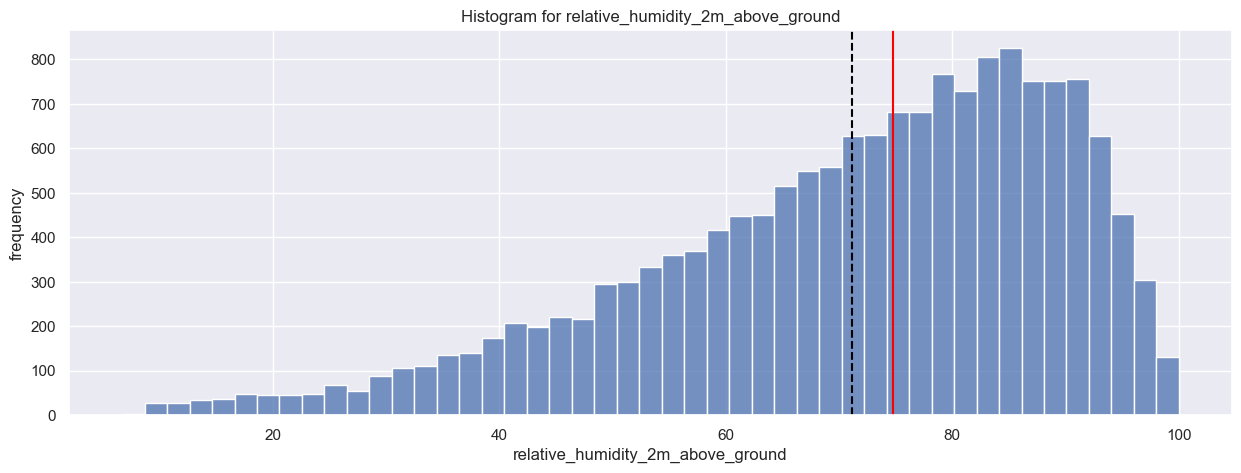

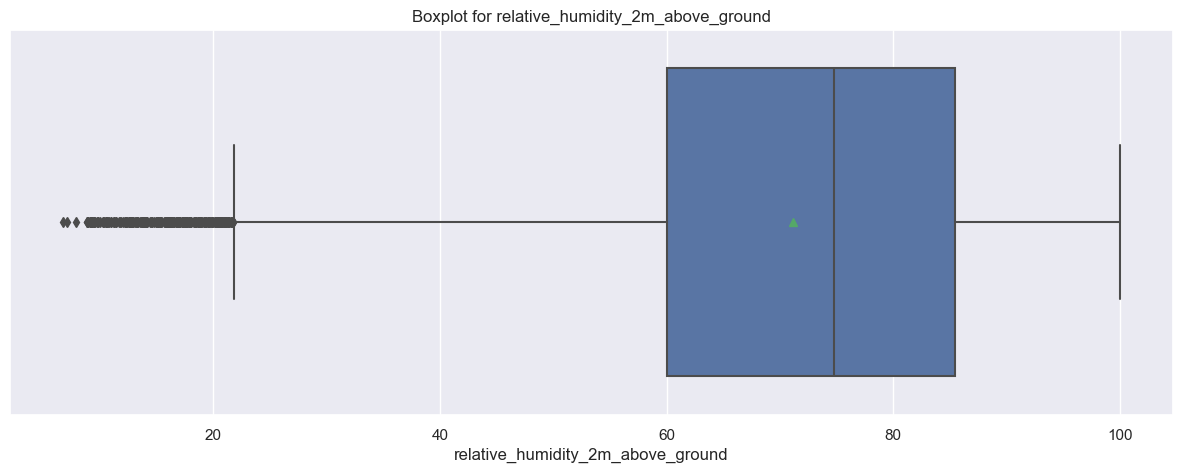

In [63]:
# Code to display the histogram and boxplot for relative humidity in the testing dataset to identify outliers
box_histplot(data_test,"relative_humidity_2m_above_ground") 

In [62]:
## Create a list of the numerical columns in the testing dataset
test_cols= data_test.select_dtypes("number").columns

### Outlier treatment in the testing dataset

In [ ]:
### Create a function to identify outliers in the testing dataset
def outliers1(df,item):
    Q1 = df[item].quantile(0.25)
    Q3 = df[item].quantile(0.75)
    IQR = Q3-Q1
    Lower_fence = Q1-1.5*IQR
    Upper_fence = Q3+1.5*IQR
    outlier_list = df.index[(df[item]<Lower_fence)|(df[item]>Upper_fence)]
    return outlier_list

In [ ]:
### Now create an list to store the outliers
index_list1 = [] 
for feature in test_cols:
    ls=outliers1(data_test,feature)
    index_list1.extend(ls)

In [ ]:
### Now define a function to remove the outliers
def remove1(df,outlier_list):
    outlier_list = sorted(set(outlier_list))
    df = df.drop(outlier_list)
    return df

In [ ]:
test_clean = remove1(data_test,index_list1)

In [ ]:
data_test.shape

In [ ]:
### sort the index of the cleaned dataset
test_clean1 = test_clean.sort_index()

In [ ]:
test_clean1.head()

In [ ]:
test_clean1.shape

In [60]:
data_test.shape

(16136, 67)

### Missing values imputation for test data

In [63]:
#  import the libraty to impute missing values
from sklearn.impute import SimpleImputer
## Instantiate the simple imputer using the median strategy 
median_imputer1 = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns data 
import time
startScript = time.time()
data_test[test_cols] = median_imputer1.fit_transform(data_test[test_cols])
endScript = time.time()
display = endScript-startScript 
print(f"The running time:{display}")

The running time:0.3603248596191406


In [64]:
data_test.isnull().sum().sum()

0

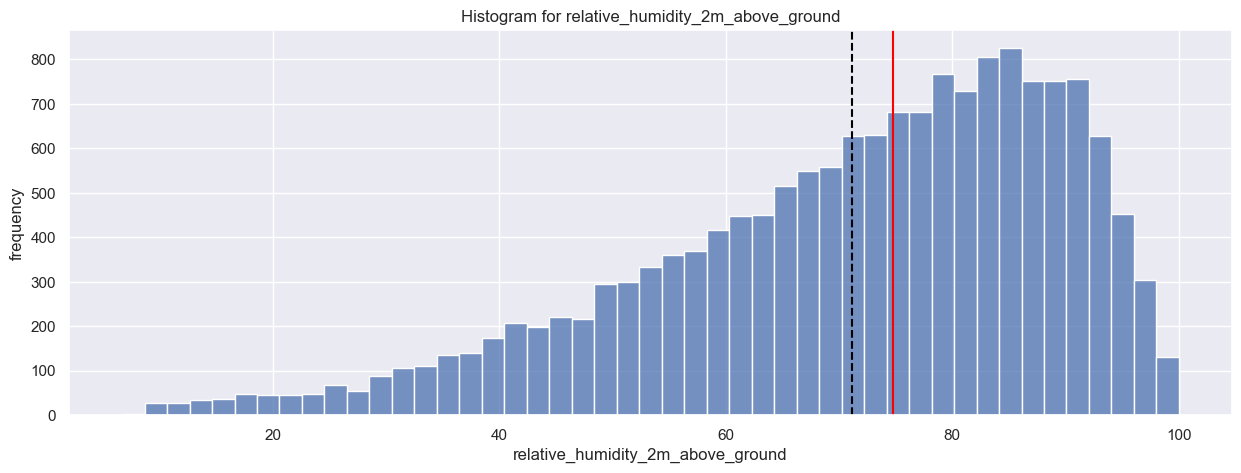

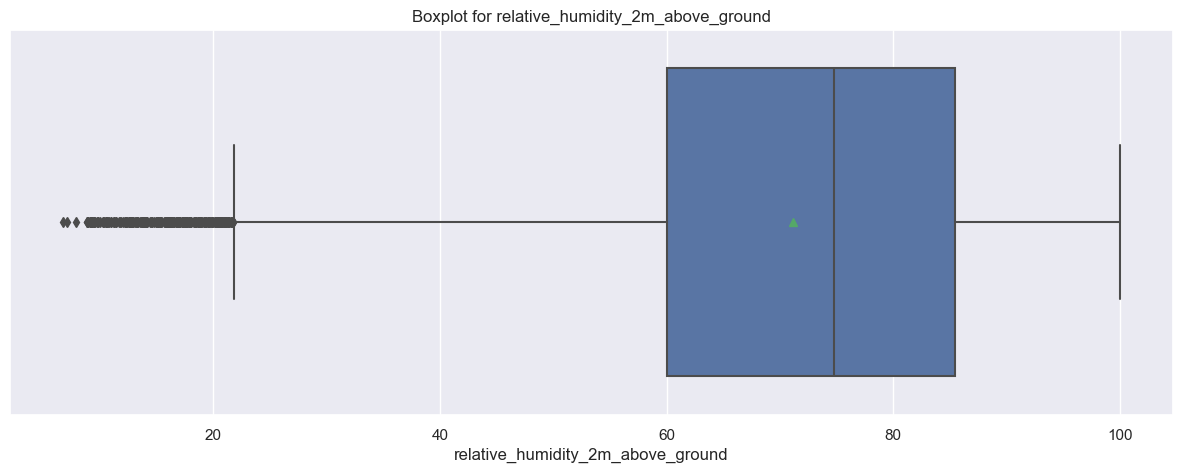

In [69]:
# Code to display the histogram and boxplot for relative humidity in the testing dataset to identify outliers
box_histplot(data_test,"relative_humidity_2m_above_ground") 

In [65]:
X_test = data_test.copy()

In [66]:
X_test.shape

(16136, 67)

In [67]:
X_train.shape

(21389, 67)

### Normalize/standardize the data

In [68]:
# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [69]:
## Now normalize the testing dataset
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

In [70]:
X_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

In [71]:
X_scaled.head()

precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                 0.110                             -0.370   
1                                -1.132                             -0.686   
2                                 0.556                              1.298   
3                                -0.795                             -0.740   
4                                 0.257                              1.208   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.150                        0.553   
1                             -1.106                       -1.312   
2                              0.951                        0.497   
3                             -0.875                       -0.705   
4                              0.368                        0.100   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 0.607                                -0.005   
1                                -1.007                                -1.153   
2                                -0.002                                -0.024   
3                                 1.598                                -0.114   
4                                 0.287                                 0.990   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                            -0.303                                  -0.263   
1                            -0.513                                   0.222   
2                            -0.155                                   0.137   
3                            -0.429                                  -0.090   
4                            -0.153                                  -0.212   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                          -1.101                 -0.677   
1                          -0.096                  0.679   
2                           0.315                 -0.828   
3                          -1.334                  0.129   
4                          -0.711                  0.461   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0                   0.347                        1.288   
1                   0.328                        0.080   
2                   0.295                       -1.226   
3                   0.304                        1.143   
4                   0.312                       -0.049   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                      -1.001                       1.019   
1                       0.670                       2.122   
2                       1.032                      -0.506   
3                       0.781                      -0.797   
4                       1.061                       1.742   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     -0.154                                           1.757   
1                      1.378                                           0.244   
2                      0.504                                           0.260   
3                     -0.241                                           1.818   
4                      0.417                                           0.258   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                      -0.049                                         -0.590   
1                       1.282                                         -0.580   
2                      -0.322                                         -0.105   
3                       1.576                                         -0.614   
4                       0.485                                         -0.416   

   L3_O3_O3_column_number_density  L3_O3_O3_effective_temperature  \
0                          -0.678                

## Dealing with multicollinearity issues before modelling

In [72]:
##  Define a function to check VIF.
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [174]:
# Code to check VIF on train data and arrange the feature and ViF in ascending order
vif1=checking_vif(X_train).sort_values(by="VIF",ascending=False)  

In [175]:
vif1

feature       VIF
42                       L3_CLOUD_cloud_base_pressure 55332.220
46                        L3_CLOUD_cloud_top_pressure 49024.443
45                          L3_CLOUD_cloud_top_height 17021.596
41                         L3_CLOUD_cloud_base_height 12682.559
53                          L3_AER_AI_sensor_altitude  3064.956
50                        L3_CLOUD_solar_zenith_angle  2452.877
19                     L3_O3_O3_effective_temperature  1427.955
57                       L3_AER_AI_solar_zenith_angle  1388.329
48                       L3_CLOUD_sensor_zenith_angle  1269.381
24                           L3_O3_solar_zenith_angle  1081.962
55                      L3_AER_AI_sensor_zenith_angle  1051.426
28                              L3_CO_sensor_altitude   653.809
49                       L3_CLOUD_solar_azimuth_angle   549.585
56                      L3_AER_AI_solar_azimuth_angle   367.339
10                             L3_NO2_sensor_altitude   366.910
66                          L3_SO2_solar_zenith_angle   362.264
38                         L3_HCHO_solar_zenith_angle   355.615
47                      L3_CLOUD_sensor_azimuth_angle   315.069
22                          L3_O3_sensor_zenith_angle   313.821
54                     L3_AER_AI_sensor_azimuth_angle   264.900
14                          L3_NO2_solar_zenith_angle   221.318
23                          L3_O3_solar_azimuth_angle   219.932
64                         L3_SO2_sensor_zenith_angle   174.905
43                            L3_CLOUD_cloud_fraction   161.361
20                               L3_O3_cloud_fraction   160.948
36                        L3_HCHO_sensor_zenith_angle   152.366
32                           L3_CO_solar_zenith_angle   144.394
18                     L3_O3_O3_column_number_density   139.472
21                         L3_O3_sensor_azimuth_angle    64.809
1                   relative_humidity_2m_above_ground    61.113
2                   specific_humidity_2m_above_ground    57.010
15     L3_NO2_stratospheric_NO2_column_number_density    53.889
65                         L3_SO2_solar_azimuth_angle    52.547
37                        L3_HCHO_solar_azimuth_angle    52.102
12                         L3_NO2_sensor_zenith_angle    51.524
61                     L3_SO2_absorbing_aerosol_index    46.971
30                          L3_CO_sensor_zenith_angle    45.645
40  L3_HCHO_tropospheric_HCHO_column_number_densit...    44.748
8                      L3_NO2_absorbing_aerosol_index    39.988
52                  L3_AER_AI_absorbing_aerosol_index    39.814
34                             L3_HCHO_cloud_fraction    31.531
16                         L3_NO2_tropopause_pressure    30.926
7              L3_NO2_NO2_slant_column_number_density    29.783
62                              L3_SO2_cloud_fraction    29.425
25                     L3_CO_CO_column_number_density    26.149
63                        L3_SO2_sensor_azimuth_angle    24.650
13                         L3_NO2_solar_azimuth_angle    23.641
35                       L3_HCHO_sensor_azimuth_angle    23.331
3                         temperature_2m_above_ground    20.520
0                precipitable_water_entire_atmosphere    19.401
39    L3_HCHO_tropospheric_HCHO_column_number_density    18.490
31                          L3_CO_solar_azimuth_angle    17.125
59               L3_SO2_SO2_column_number_density_amf    16.009
33           L3_HCHO_HCHO_slant_column_number_density    10.406
51                            L3_CLOUD_surface_albedo     9.866
11                        L3_NO2_sensor_azimuth_angle     8.817
6                    L3_NO2_NO2_column_number_density     7.511
9                               L3_NO2_cloud_fraction     7.358
17      L3_NO2_tropospheric_NO2_column_number_density     7.016
26                    L3_CO_H2O_column_number_density     6.631
29                         L3_CO_sensor_azimuth_angle     6.429
27                                 L3_CO_cloud_height     3.788
60            

In [176]:
### Display the features with VIF greater than 11
vif4 = vif1[vif1['VIF']>10]

In [177]:
highest_vif_feature= list(vif4.feature)

In [178]:
len(highest_vif_feature)

54

In [164]:
X_scaled_val = pd.DataFrame(X_val_scaled,columns=X_val.columns)

In [165]:
# Code to check VIF on train data and arrange the feature and ViF in ascending order
vif2=checking_vif(X_scaled_val).sort_values(by="VIF",ascending=False)  

In [166]:
vif2

feature      VIF
45                          L3_CLOUD_cloud_top_height 5754.090
41                         L3_CLOUD_cloud_base_height 5471.766
46                        L3_CLOUD_cloud_top_pressure 2942.818
42                       L3_CLOUD_cloud_base_pressure 2729.336
47                      L3_CLOUD_sensor_azimuth_angle  272.630
54                     L3_AER_AI_sensor_azimuth_angle  230.075
48                       L3_CLOUD_sensor_zenith_angle  206.400
50                        L3_CLOUD_solar_zenith_angle  168.080
55                      L3_AER_AI_sensor_zenith_angle  160.148
49                       L3_CLOUD_solar_azimuth_angle  116.857
57                       L3_AER_AI_solar_zenith_angle  101.279
24                           L3_O3_solar_zenith_angle   98.877
56                      L3_AER_AI_solar_azimuth_angle   75.191
22                          L3_O3_sensor_zenith_angle   71.522
20                               L3_O3_cloud_fraction   62.846
43                            L3_CLOUD_cloud_fraction   60.799
21                         L3_O3_sensor_azimuth_angle   60.594
23                          L3_O3_solar_azimuth_angle   56.527
14                          L3_NO2_solar_zenith_angle   33.879
10                             L3_NO2_sensor_altitude   33.480
64                         L3_SO2_sensor_zenith_angle   31.634
19                     L3_O3_O3_effective_temperature   30.009
36                        L3_HCHO_sensor_zenith_angle   27.980
66                          L3_SO2_solar_zenith_angle   24.749
38                         L3_HCHO_solar_zenith_angle   24.690
63                        L3_SO2_sensor_azimuth_angle   21.775
35                       L3_HCHO_sensor_azimuth_angle   20.575
2                   specific_humidity_2m_above_ground   16.088
12                         L3_NO2_sensor_zenith_angle   13.998
32                           L3_CO_solar_zenith_angle   10.699
3                         temperature_2m_above_ground   10.434
37                        L3_HCHO_solar_azimuth_angle    9.513
65                         L3_SO2_solar_azimuth_angle    9.362
15     L3_NO2_stratospheric_NO2_column_number_density    9.278
8                      L3_NO2_absorbing_aerosol_index    8.979
62                              L3_SO2_cloud_fraction    8.710
34                             L3_HCHO_cloud_fraction    8.698
39    L3_HCHO_tropospheric_HCHO_column_number_density    8.681
7              L3_NO2_NO2_slant_column_number_density    8.573
11                        L3_NO2_sensor_azimuth_angle    8.533
30                          L3_CO_sensor_zenith_angle    8.453
13                         L3_NO2_solar_azimuth_angle    7.341
33           L3_HCHO_HCHO_slant_column_number_density    7.315
28                              L3_CO_sensor_altitude    7.282
52                  L3_AER_AI_absorbing_aerosol_index    6.860
0                precipitable_water_entire_atmosphere    6.468
16                         L3_NO2_tropopause_pressure    6.339
18                     L3_O3_O3_column_number_density    6.242
29                         L3_CO_sensor_azimuth_angle    6.131
17      L3_NO2_tropospheric_NO2_column_number_density    4.815
6                    L3_NO2_NO2_column_number_density    4.325
61                     L3_SO2_absorbing_aerosol_index    4.255
9                               L3_NO2_cloud_fraction    3.996
1                   relative_humidity_2m_above_ground    3.992
40  L3_HCHO_tropospheric_HCHO_column_number_densit...    3.646
60             L3_SO2_SO2_slant_column_number_density    3.631
31                          L3_CO_solar_azimuth_angle    3.592
58                   L3_SO2_SO2_column_number_density    3.558
59               L3_SO2_SO2_column_number_density_amf    3.524
26                    L3_CO_H2O_column_number_density    3.043
53                          L3_AER_AI_sensor_altitude    2.691
44                       L3_CLOUD_cloud_optical_depth    2.163
25                     L3_CO_CO_column_number_density    2.081
27            

In [167]:
### Display the features with VIF greater than 11
vif3 = vif2[vif2['VIF']>10]

In [168]:
highest_vif_feature1= list(vif3.feature)

In [170]:
len(highest_vif_feature1)

31

In [163]:
# Code to check VIF on train data and arrange the feature and ViF in ascending order
vif3=checking_vif(X_val_scaled).sort_values(by="VIF",ascending=False)  

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [78]:
### now drop all the columns with high VIF greater than 11
X_scaled = X_scaled.drop(columns=highest_vif_feature,axis=1)

In [79]:
X_scaled.head()

precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                 0.110                             -0.370   
1                                -1.132                             -0.686   
2                                 0.556                              1.298   
3                                -0.795                             -0.740   
4                                 0.257                              1.208   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 0.607                                -0.005   
1                                -1.007                                -1.153   
2                                -0.002                                -0.024   
3                                 1.598                                -0.114   
4                                 0.287                                 0.990   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                            -0.303                                  -0.263   
1                            -0.513                                   0.222   
2                            -0.155                                   0.137   
3                            -0.429                                  -0.090   
4                            -0.153                                  -0.212   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                          -1.101                 -0.677   
1                          -0.096                  0.679   
2                           0.315                 -0.828   
3                          -1.334                  0.129   
4                          -0.711                  0.461   

   L3_NO2_sensor_azimuth_angle  L3_NO2_solar_azimuth_angle  \
0                        1.288                       1.019   
1                        0.080                       2.122   
2                       -1.226                      -0.506   
3                        1.143                      -0.797   
4                       -0.049                       1.742   

   L3_NO2_stratospheric_NO2_column_number_density  L3_NO2_tropopause_pressure  \
0                                           1.757                      -0.049   
1                                           0.244                       1.282   
2                                           0.260                      -0.322   
3                                           1.818                       1.576   
4                                           0.258                       0.485   

   L3_NO2_tropospheric_NO2_column_number_density  \
0                                         -0.590   
1                                         -0.580   
2                                         -0.105   
3                                         -0.614   
4                                         -0.416   

   L3_O3_O3_column_number_density  L3_CO_CO_column_number_density  \
0                          -0.678                          -1.977   
1                           1.618                           0.146   
2                          -0.128                          -0.434   
3                           1.620                           0.421   
4                           0.194                          -0.135   

   L3_CO_H2O_column_number_density  L3_CO_cloud_height  L3_CO_sensor_altitude  \
0                            2.558               0.806                  0.214   
1                           -0.871              -0.866                  0.159   
2                           -0.256              -0.961                  0.075   
3                           -0.651               0.387                  0.099   
4                           -0.299               1.079                  0.116   

   L3_CO_sensor_azimuth_angle  L3_CO_sensor_zenith_angle  \
0                       1.282                     -1.313   
1               

In [80]:
X_scaled.shape

(21389, 34)

In [81]:
X_val_scaled1 = pd.DataFrame(X_val_scaled,columns=X_val.columns)
X_test_scaled1 = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [82]:
X_val_scaled1 = X_val_scaled1.drop(columns=highest_vif_feature ,axis=1)

In [83]:
X_test_scaled1 = X_test_scaled1.drop(columns=highest_vif_feature , axis=1)

In [84]:
X_test_scaled1.shape

(16136, 34)

In [85]:
y_train.shape

(21389,)

## Feature Selection and Extration

In [1]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components=24, whiten= True)

In [134]:
data_pca1 =pca.fit_transform(X_scaled)
data_pca2 =pca.fit_transform(X_val_scaled1)

In [135]:
X_scaled.shape

(21389, 34)

In [136]:
data_pca1.shape

(21389, 24)

In [137]:
X_train_data_pca =pd.DataFrame(data_pca1)  # set the pca-data as dataframe
X_val_data_pca =pd.DataFrame(data_pca2)  # set the pca-data as dataframe

In [139]:
X_val_data_pca.shape

(9168, 24)

## Performance measures description:

In [90]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_regression_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        rmse= mean_squared_error(target,pred,squared=False)  # to compute the room mean square error using the target and predicted values
        mse= mean_squared_error(target,pred,squared=True)   # compute the mean squared error  
        mae = mean_absolute_error(target, pred)  # to compute mean absolute error using target and predicted values
        r2 =r2_score(target,pred)
        
        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Root Mean Squared error":rmse,"Mean Squared error":mse,
                                 "Mean Absolute error": mae,"R2 Score":r2},index=[0],)

        return df_perf

In [91]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

### Model Building on original data

In [92]:
from sklearn.model_selection import  cross_val_score

In [93]:
models = {
    "Linear Regression": LinearRegression(),
     "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada boost": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost":  XGBRegressor(),
}

for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X_train_data_pca,y=y_train,scoring=scorer,cv=3)
    print(f"{name} R2-Score: {round(np.mean(scores),4)}")

Linear Regression R2-Score: 0.3231
K-Nearest Neighbors R2-Score: 0.4136
Random Forest R2-Score: 0.4247
Bagging R2-Score: 0.3638
Gradient Boosting R2-Score: 0.385
Ada boost R2-Score: -0.2128
Support Vector Machine R2-Score: 0.323
XGBoost R2-Score: 0.4117


In [94]:
## Check the performamce for each model in the training data
linear_train_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)
kneighbor_train_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)
randomf_train_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)
bagging_train_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)
gradient_train_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)
adaboost_train_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)
svm_train_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)
xgb_train_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_train_data_pca,
                        y_train),X_train_data_pca,y_train)

In [95]:
### Display the peformance measures for each model
models_train_comp_df = pd.concat([ linear_train_perf.T, kneighbor_train_perf.T,randomf_train_perf.T, 
        bagging_train_perf.T, gradient_train_perf.T, adaboost_train_perf.T, svm_train_perf.T,xgb_train_perf.T],axis=1,)
models_train_comp_df.columns = ["Linear ","KNeighbor","Random forest","Bagging",
                                "Gradient boost","Adaboost","SVM","XGBoost"]

In [96]:
print("Training performance measures comparison")
models_train_comp_df

Training performance measures comparison


Linear   KNeighbor  Random forest  Bagging  \
Root Mean Squared error   38.612     28.604         13.258   16.129   
Mean Squared error      1490.865    818.207        175.769  260.130   
Mean Absolute error       27.973     19.330          9.248   10.607   
R2 Score                   0.326      0.630          0.921    0.882   

                         Gradient boost  Adaboost      SVM  XGBoost  
Root Mean Squared error          34.990    64.657   37.651   22.431  
Mean Squared error             1224.329  4180.534 1417.587  503.162  
Mean Absolute error              25.344    56.255   24.687   16.298  
R2 Score                          0.446    -0.890    0.359    0.772

In [97]:
## Check the performamce for each model in the validation data
linear_val_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)
kneighbor_val_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)

randomf_val_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)
bagging_val_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)
gradient_val_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)
adaboost_val_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)
svm_val_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)
xgb_val_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_val_data_pca,
                        y_val),X_val_data_pca,y_val)

In [98]:
### Display the peformance measures for each model
models_validation_comp_df = pd.concat([linear_val_perf.T, kneighbor_val_perf.T,
randomf_val_perf.T, bagging_val_perf.T, gradient_val_perf.T, adaboost_val_perf.T, svm_val_perf.T,xgb_val_perf.T],axis=1,)
models_validation_comp_df.columns = [
    "Linear ","KNeighbor","Random forest","Bagging","Gradient boost","Adaboost","SVM","XGBoost"]


In [99]:
### Display the peformance measures for each model
models_validation_comp_df = pd.concat([linear_val_perf.T, kneighbor_val_perf.T,
randomf_val_perf.T, bagging_val_perf.T, gradient_val_perf.T, adaboost_val_perf.T, svm_val_perf.T,xgb_val_perf.T],axis=1,)
models_validation_comp_df.columns = [
    "Linear ","KNeighbor","Random forest","Bagging","Gradient boost","Adaboost","SVM","XGBoost"]

Validation performance measures comparison


Linear   KNeighbor  Random forest  Bagging  \
Root Mean Squared error   38.369     29.415         13.465   15.935   
Mean Squared error      1472.164    865.241        181.305  253.918   
Mean Absolute error       27.931     20.603          9.566   10.832   
R2 Score                   0.318      0.599          0.916    0.882   

                         Gradient boost  Adaboost      SVM  XGBoost  
Root Mean Squared error          33.382    45.239   39.209   15.641  
Mean Squared error             1114.381  2046.558 1537.368  244.639  
Mean Absolute error              24.455    38.697   25.753   11.319  
R2 Score                          0.484     0.052    0.288    0.887

## Bagging Hyperparametric Tuning using randomisedsearchCV

In [182]:
%%time 
# defining model
bagging_tuned = BaggingRegressor(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70]} 
    
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=bagging_tuned, param_distributions=param_grid, n_iter=5, n_jobs = -1, scoring=scorer, cv=3, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train_data_pca,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
bagging_tuned=randomized_cv.best_estimator_
bagging_tuned.fit(X_train_data_pca,y_train)

CPU times: total: 5min 19s
Wall time: 21min 38s


BaggingRegressor(max_features=0.9, max_samples=0.9, n_estimators=70,
                 random_state=1)

In [206]:
randomized_cv.get_params()

{'cv': 3,
 'error_score': nan,
 'estimator__base_estimator': 'deprecated',
 'estimator__bootstrap': True,
 'estimator__bootstrap_features': False,
 'estimator__estimator': None,
 'estimator__max_features': 1.0,
 'estimator__max_samples': 1.0,
 'estimator__n_estimators': 10,
 'estimator__n_jobs': None,
 'estimator__oob_score': False,
 'estimator__random_state': 1,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': BaggingRegressor(random_state=1),
 'n_iter': 5,
 'n_jobs': -1,
 'param_distributions': {'max_samples': [0.8, 0.9, 1],
  'max_features': [0.7, 0.8, 0.9],
  'n_estimators': [30, 50, 70]},
 'pre_dispatch': '2*n_jobs',
 'random_state': 1,
 'refit': True,
 'return_train_score': False,
 'scoring': make_scorer(r2_score),
 'verbose': 0}

In [212]:
model =BaggingRegressor(max_features=0.8, max_samples=0.9, n_estimators=150,
                 random_state=1)
bagging_model = model.fit(X_train_data_pca,y_train)

In [213]:
# Code to check the performance on the oversampled training set
bg_train_perf_tuned =model_performance_regression_sklearn(bagging_model,X_train_data_pca,y_train) 

In [214]:
## Code to check the performance on validation
bg_val_perf_tuned = model_performance_regression_sklearn(bagging_model,X_val_data_pca,y_val) 

In [215]:
bg_perf_tuned = pd.concat([bg_train_perf_tuned.T,bg_val_perf_tuned.T],axis=1)
bg_perf_tuned.columns =["Training","Validation"]

In [216]:
print("Performance measures on tuned xgboost model")
bg_perf_tuned

Performance measures on tuned xgboost model


Training  Validation
Root Mean Squared error    14.518      41.386
Mean Squared error        210.782    1712.838
Mean Absolute error        10.197      31.521
R2 Score                    0.905       0.207

## XGboost Hyperparametric Tuning using randomisedsearchCV

In [100]:
from sklearn.model_selection import RandomizedSearchCV

In [179]:
### defining model
xg_boost_tuned = XGBRegressor(eval_metric='rmse',random_state=123)

#Parameter grid to pass in RandomSearchCV
param_grid = {
    'max_depth':list((range(3,12))),
    'learning_rate':np.linspace(0.05,0.5,10),
    'n_estimators':list((range(100,205,5))),
    'colsample_bytree':[0.3,0.4,0.5,0.7,1], 
    'gamma':[0.1,0.2,0.3,0.4,0.5],
    'reg_alpha':[0,0.001,0.01,0.1,0.2],
    'subsample':[0.25,0.5,0.75,1], 
                     }
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=xg_boost_tuned, param_distributions=param_grid,n_iter=3,
                                   cv=5,verbose=2,random_state=123)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_train_data_pca,y_train)
### Print the best parameters and highest accuracy
print("Best parameters found",randomized_cv.best_params_)
print("Best accuracy found",randomized_cv.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time= 1.6min
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time= 1.4min
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time=  58.6s
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time= 1.2min
[CV] END colsample_bytree=1, gamma=0.1, learning_rate=0.25, max_depth=8, n_estimators=200, reg_alpha=0.01, subsample=0.75; total time= 1.2min
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=160, reg_alpha=0.01, subsample=0.5; total time=  22.8s
[CV] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=7, n_estimators=1

In [ ]:
0.5770515736537487

In [180]:
randomized_cv.best_params_

{'subsample': 0.75,
 'reg_alpha': 0.01,
 'n_estimators': 200,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.1,
 'colsample_bytree': 1}

In [103]:
# Set the clf to the best combination of parameters and fit the tuned model
xg_boost_tuned=randomized_cv.best_estimator_
xg_boost_tuned.fit(X_train_data_pca,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.4,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=155, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=123,
             reg_alpha=0.2, reg_lambda=1, ...)

In [140]:
## Code to check the performance on the oversampled training set
xg_train_perf_tuned =model_performance_regression_sklearn(xg_boost_tuned,X_train_data_pca,y_train) 

In [141]:
xg_train_perf_tuned

Root Mean Squared error  Mean Squared error  Mean Absolute error  R2 Score
0                   26.548             704.777               19.438     0.681

In [142]:
X_val_data_pca.shape

(9168, 24)

In [143]:
y_val.shape

(9168,)

In [144]:
X_val_data_pca.head()

0      1      2      3      4      5      6     7      8      9      10  \
0 -0.780 -0.112 -3.314 -0.124  1.217  0.280 -1.678 0.666  1.175  0.912 -0.448   
1 -0.713  0.057  0.013  1.199 -0.775 -0.122  0.708 0.402  0.078  0.815 -0.688   
2 -0.484 -0.317  1.136  0.268  2.132 -1.322 -0.976 0.248  0.158  0.645  0.055   
3 -0.170  1.954  1.030 -0.040  0.384  0.427  1.353 0.400 -0.830 -0.492  0.195   
4 -4.585 -0.814  3.463 -1.668 -0.535  3.146 -1.324 3.878  1.303 -1.566 -0.799   

      11     12     13     14     15     16     17     18    19     20     21  \
0 -0.592 -1.469 -0.002 -0.608  2.216 -0.913 -0.434  1.023 0.554 -1.202 -1.211   
1 -1.072 -1.817  0.062 -0.776  0.974 -0.580  0.232  0.139 0.293  0.490  0.806   
2  1.346 -1.478 -0.059 -0.509 -1.322  0.838 -1.985 -0.161 1.615 -0.153  2.713   
3 -0.023  1.912  0.564  0.643 -0.478  0.810  0.358 -0.345 0.135 -1.388 -0.890   
4 -2.179 -0.463 -2.395  0.623 -1.174  1.732 -2.278  1.259 0.784 -0.924 -2.322   

      22     23  
0  0.275  0.389  
1  0.683  0.721  
2 -2.426  1.326  
3 -2.069 -0.693  
4  0.954 -0.590

In [145]:
## Code to check the performance on validation
xg_val_perf_tuned = model_performance_regression_sklearn(xg_boost_tuned,X_val_data_pca,y_val) 

In [146]:
xg_perf_over_tuned = pd.concat([xg_train_perf_tuned.T,xg_val_perf_tuned.T],axis=1)
xg_perf_over_tuned.columns =["Training","Validation"]

In [147]:
print("Performance measures on tuned xgboost model")
xg_perf_over_tuned

Performance measures on tuned xgboost model


Training  Validation
Root Mean Squared error    26.548      41.437
Mean Squared error        704.777    1717.061
Mean Absolute error        19.438      30.920
R2 Score                    0.681       0.205

In [ ]:
Root Mean Squared error	 9.487	29.904

In [158]:
model = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.12, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=123, reg_alpha=0.1, reg_lambda=1,subsample=0.7)
xgboost_model = model.fit(X_train_data_pca,y_train)

In [159]:
# Check the performamce for each model in the training data using oversampled dat
xgboost_train_perf_over = model_performance_regression_sklearn(xgboost_model,X_train_data_pca,y_train)

In [160]:
## Check the performamce for each model in the validation data using oversampled data
xgboost_val_perf_over = model_performance_regression_sklearn(xgboost_model,X_val_data_pca,y_val)

In [161]:
xgboost_perf = pd.concat([xgboost_train_perf_over.T,xgboost_val_perf_over.T],axis=1)
xgboost_perf.columns =["Training","Validation"]

In [162]:
print("Pefromance measures on over-Sampling data")
xgboost_perf

Pefromance measures on over-Sampling data


Training  Validation
Root Mean Squared error    34.241      40.938
Mean Squared error       1172.413    1675.956
Mean Absolute error        24.640      30.354
R2 Score                    0.470       0.224

### Hyperparametric tuning for randomforest regressor

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [205]:
# defining model
rf_tuned = RandomForestRegressor(random_state=123)

#Parameter grid to pass in RandomSearchCV
param_grid= {  
    "n_estimators": [95,100,105],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],"max_samples": np.arange(0.4, 0.7, 0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=rf_tuned, param_distributions=param_grid, scoring=scorer, n_iter=5, cv=3, random_state=123)

#Fitting parameters in RandomizedSearchCV
randomized_cv=randomized_cv.fit(X_scaled,y_train)
# Set the clf to the best combination of parameters and fit the tuned model
rf_tuned=randomized_cv.best_estimator_
rf_tuned.fit(X_scaled,y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.5, min_samples_leaf=2,
                      n_estimators=95, random_state=123)

In [206]:
## Code to check the performance on the oversampled training set
rf_train_perf_tuned =model_performance_regression_sklearn(rf_tuned, X_scaled, y_train) 

In [207]:
## Code to check the performance on validation
rf_val_perf_tuned = model_performance_regression_sklearn(rf_tuned, X_val_scaled1, y_val) 

In [208]:
rf_perf_tuned = pd.concat([rf_train_perf_tuned.T,rf_val_perf_tuned.T],axis=1)
rf_perf_tuned.columns =["Training","Validation"]

In [209]:
print("Performance measures on tuned gradient boost model")
rf_perf_tuned

Performance measures on tuned gradient boost model


Training  Validation
Root Mean Squared error    22.331      32.128
Mean Squared error        498.687    1032.203
Mean Absolute error        14.889      22.580
R2 Score                    0.774       0.522

In [ ]:
randomized_cv.get_params()

In [129]:
### Select the best model
model = RandomForestRegressor(random_state=123)

In [130]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [139]:
## set the max_depth to 4:
model.set_params(max_depth=80)
model.set_params(max_features='sqrt')
model.set_params(min_weight_fraction_leaf=0.01)
model.set_params(min_samples_leaf=4)
model.set_params(max_samples=0.5)
model.set_params(min_samples_split=100)
model.set_params(n_estimators=400)

RandomForestRegressor(max_depth=80, max_features='sqrt', max_samples=0.5,
                      min_samples_leaf=4, min_samples_split=100,
                      min_weight_fraction_leaf=0.01, n_estimators=400,
                      random_state=123)

In [140]:
final_model = model.fit(X_scaled,y_train)

In [141]:
## Check the performamce for each model in the training data of the imbalanced data 
rf_train_perf1 = model_performance_regression_sklearn(final_model,X_scaled,y_train)

In [142]:
## Check the performamce for each model in the imbalanced validation data
rf_val_perf1 = model_performance_regression_sklearn(final_model,X_val_scaled1,y_val)

In [143]:
gb_perf = pd.concat([rf_train_perf1.T,rf_val_perf1.T],axis=1)
gb_perf.columns =["Training","Validation"]

In [144]:
print("Performance measures on the original dataset")
gb_perf 

Performance measures on the original dataset


Training  Validation
Root Mean Squared error    35.988      36.300
Mean Squared error       1295.132    1317.656
Mean Absolute error        25.593      26.068
R2 Score                    0.414       0.390

In [137]:
final_model1 = models["Random Forest"].fit(X_scaled,y_train)

In [138]:
model_performance_regression_sklearn(final_model1,X_val_scaled1,y_val)

Root Mean Squared error  Mean Squared error  Mean Absolute error  R2 Score
0                   30.819             949.810               21.224     0.560

### Feature importances

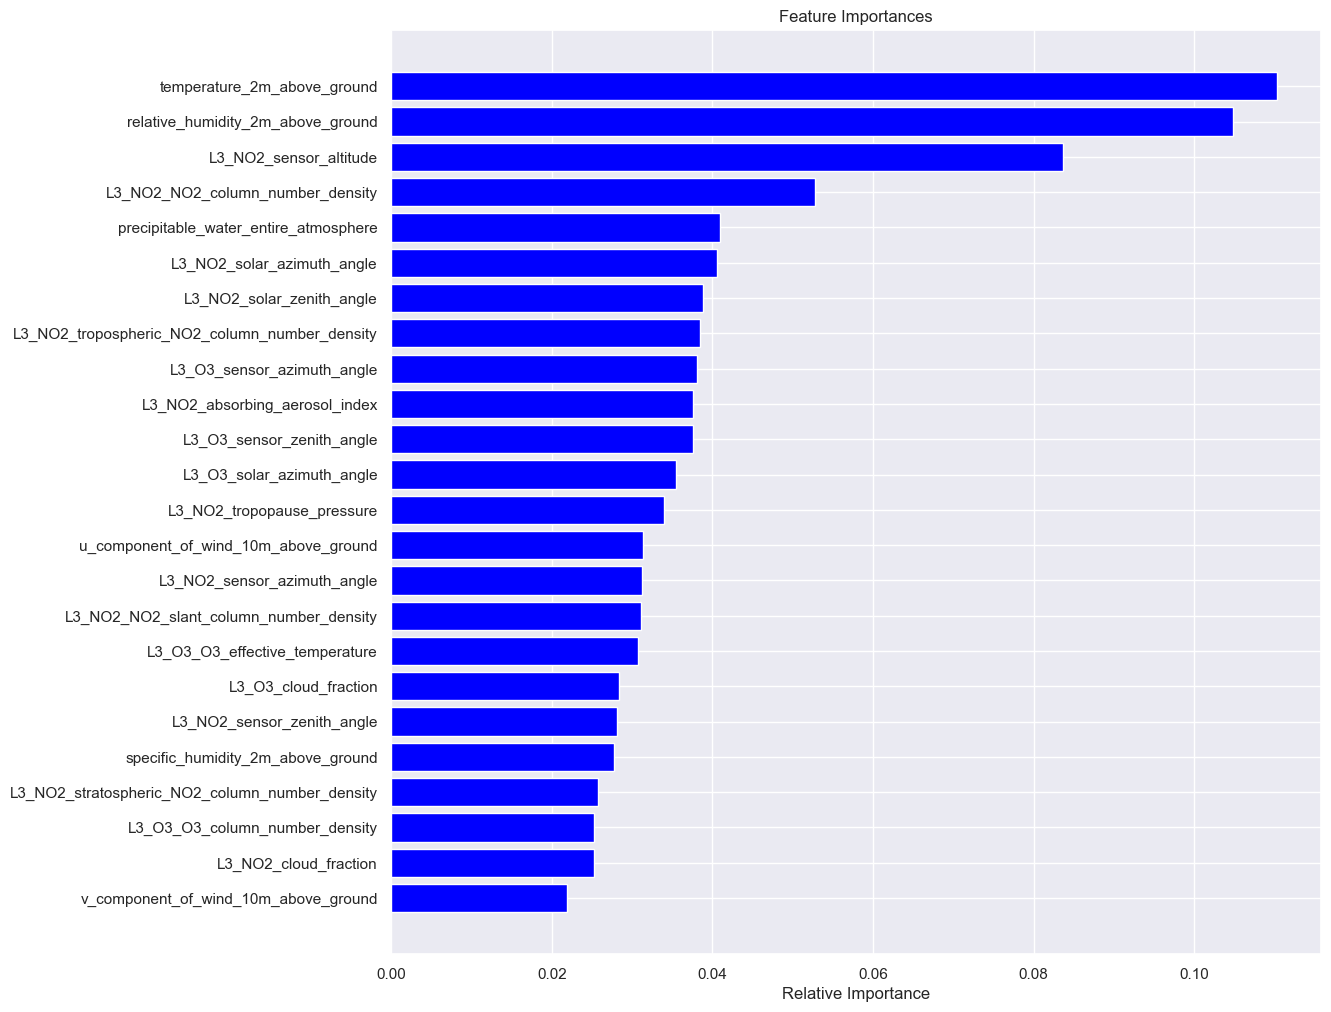

In [148]:
## Code to check the feature importance on the best model
feature_names = X_train.columns
importances = xg_boost_tuned.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [149]:
test_data.head()

Place_ID X Date       Date Place_ID  \
0  0OS9LVX X 2020-01-02 2020-01-02  0OS9LVX   
1  0OS9LVX X 2020-01-03 2020-01-03  0OS9LVX   
2  0OS9LVX X 2020-01-04 2020-01-04  0OS9LVX   
3  0OS9LVX X 2020-01-05 2020-01-05  0OS9LVX   
4  0OS9LVX X 2020-01-06 2020-01-06  0OS9LVX   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                11.600                             30.200   
1                                18.300                             42.900   
2                                17.600                             41.300   
3                                15.012                             53.100   
4                                 9.700                             71.600   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.004                       14.657   
1                              0.006                       15.027   
2                              0.006                       15.511   
3                              0.007                       14.442   
4                              0.008                       11.896   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 3.956                                 0.713   
1                                 4.230                                 0.662   
2                                 5.246                                 1.641   
3                                 5.454                                -0.191   
4                                 3.512                                -0.279   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                             0.000                                   0.000   
1                             0.000                                   0.000   
2                             0.000                                   0.000   
3                             0.000                                   0.000   
4                             0.000                                   0.000   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                           0.466                  0.011   
1                          -0.214                  0.028   
2                          -0.254                  0.010   
3                          -0.268                  0.089   
4                           0.461                  0.041   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0              835670.493                       68.099   
1              835281.883                       75.937   
2              834839.051                       75.552   
3              836269.834                     -102.285   
4              836043.111                     -102.134   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                       1.446                     -95.985   
1                      34.639                     -95.018   
2                      55.872                     -94.015   
3                      59.175                     -97.248   
4                      40.926                     -96.057   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.942                                           0.000   
1                     18.540                                           0.000   
2                     14.141                                           0.000   
3                     32.731                                           0.000   
4                     28.321                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    7311.869                                          0.000   
2                    6156.074                                          0.000   
3

In [150]:
data_pca3 =pca.fit_transform(X_test_scaled1)

In [151]:
X_test_data_pca =pd.DataFrame(data_pca3)  # set the pca-data as dataframe

In [152]:
X_test_data_pca.shape

(16136, 24)

In [153]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data["target"] = xg_boost_tuned.predict(X_test_data_pca)

In [194]:
test_data.head()

Place_ID X Date       Date Place_ID  \
0  0OS9LVX X 2020-01-02 2020-01-02  0OS9LVX   
1  0OS9LVX X 2020-01-03 2020-01-03  0OS9LVX   
2  0OS9LVX X 2020-01-04 2020-01-04  0OS9LVX   
3  0OS9LVX X 2020-01-05 2020-01-05  0OS9LVX   
4  0OS9LVX X 2020-01-06 2020-01-06  0OS9LVX   

   precipitable_water_entire_atmosphere  relative_humidity_2m_above_ground  \
0                                11.600                             30.200   
1                                18.300                             42.900   
2                                17.600                             41.300   
3                                15.012                             53.100   
4                                 9.700                             71.600   

   specific_humidity_2m_above_ground  temperature_2m_above_ground  \
0                              0.004                       14.657   
1                              0.006                       15.027   
2                              0.006                       15.511   
3                              0.007                       14.442   
4                              0.008                       11.896   

   u_component_of_wind_10m_above_ground  v_component_of_wind_10m_above_ground  \
0                                 3.956                                 0.713   
1                                 4.230                                 0.662   
2                                 5.246                                 1.641   
3                                 5.454                                -0.191   
4                                 3.512                                -0.279   

   L3_NO2_NO2_column_number_density  L3_NO2_NO2_slant_column_number_density  \
0                             0.000                                   0.000   
1                             0.000                                   0.000   
2                             0.000                                   0.000   
3                             0.000                                   0.000   
4                             0.000                                   0.000   

   L3_NO2_absorbing_aerosol_index  L3_NO2_cloud_fraction  \
0                           0.466                  0.011   
1                          -0.214                  0.028   
2                          -0.254                  0.010   
3                          -0.268                  0.089   
4                           0.461                  0.041   

   L3_NO2_sensor_altitude  L3_NO2_sensor_azimuth_angle  \
0              835670.493                       68.099   
1              835281.883                       75.937   
2              834839.051                       75.552   
3              836269.834                     -102.285   
4              836043.111                     -102.134   

   L3_NO2_sensor_zenith_angle  L3_NO2_solar_azimuth_angle  \
0                       1.446                     -95.985   
1                      34.639                     -95.018   
2                      55.872                     -94.015   
3                      59.175                     -97.248   
4                      40.926                     -96.057   

   L3_NO2_solar_zenith_angle  L3_NO2_stratospheric_NO2_column_number_density  \
0                     22.942                                           0.000   
1                     18.540                                           0.000   
2                     14.141                                           0.000   
3                     32.731                                           0.000   
4                     28.321                                           0.000   

   L3_NO2_tropopause_pressure  L3_NO2_tropospheric_NO2_column_number_density  \
0                    6156.074                                          0.000   
1                    7311.869                                          0.000   
2                    6156.074                                          0.000   
3

In [154]:
data_df =pd.DataFrame({"Place_ID X Date":test_data['Place_ID X Date'],"target":test_data["target"]})

In [155]:
data_df.head()

Place_ID X Date  target
0  0OS9LVX X 2020-01-02  54.342
1  0OS9LVX X 2020-01-03  54.755
2  0OS9LVX X 2020-01-04  63.651
3  0OS9LVX X 2020-01-05  67.852
4  0OS9LVX X 2020-01-06  83.247

In [156]:
# code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(air9).csv",index=False)